In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm
import matplotlib as  mpl

mpl.rcParams[u'font.sans-serif'] = ['simhei']
mpl.rcParams['axes.unicode_minus'] = False

def binning(df,col,method,bins):
    uniqs=df[col].nunique()
    if uniqs<=bins:
        raise KeyError('nunique is smaller than bins: '+col)
#       print('nunique is smaller than bins: '+col)
        return 

    def ff(x,fre_list):
        if x<=fre_list[0]:
            return 0
        elif x>fre_list[-1]:
            return len(fre_list)-1
        else :
            for i in range(len(fre_list)-1):
                if x>fre_list[i] and x<=fre_list[i+1]:
                    return i

    if method=='distance':
        umax=np.percentile(df[col],99.99)
        umin=np.percentile(df[col],0.01)
        step=(umax-umin)/bins
        fre_list=[umin+i*step for i in range(bins+1)]
        return df[col].map(lambda x:ff(x,fre_list))
      
    elif method=='frequency' :
        fre_list=[np.percentile(df[col],100/bins*i) for i in range(bins+1)]
        fre_list=sorted(list(set(fre_list)))
        return df[col].map(lambda x:ff(x,fre_list))

In [6]:
# ============= parameters =============
max_round = 10000 
max_bin = 1     

In [7]:
# ============= input data =============
df = pd.read_excel('../data/CO2_content.xlsx')

ys_type = 'alkaline'
df_slc = df[df['Rock Type']==ys_type]
df_slc['Num_bins'] = binning(df = df_slc,col = 'Content',method='frequency',bins=max_bin)+1

ys_type = 'nonalkaline'
df_slcnon = df[df['Rock Type']==ys_type]
df_slcnon['Num_bins'] = binning(df = df_slcnon,col = 'Content',method='frequency',bins=max_bin)+1

C:\Users\86152\AppData\Local\Temp/ipykernel_49836/3872829157.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slc['Num_bins'] = binning(df = df_slc,col = 'Content',method='frequency',bins=max_bin)+1
C:\Users\86152\AppData\Local\Temp/ipykernel_49836/3872829157.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slcnon['Num_bins'] = binning(df = df_slcnon,col = 'Content',method='frequency',bins=max_bin)+1


In [8]:
# ============= Monte-Carlo analysis =============
cnt = 0
df_out = pd.DataFrame()
for sd in tqdm(range(500000)):
    df_sub = df_slc.sample(frac=1, random_state=sd).groupby(['Num_bins']).head(1).sort_values(by='Num_bins'
                                                                                                , ascending=True).rename(columns={'NO.':'NO.alkaline',
                                                                                                                                 'Content':'Content_alkaline'})
    df_sub['sd']=sd
    df_sub=df_sub[['Num_bins', 'sd','NO.alkaline', 'Content_alkaline']]

    df_subnon = df_slcnon.sample(frac=1, random_state=sd).groupby(['Num_bins']).head(1).sort_values(by='Num_bins'
                                                                                                , ascending=True).rename(columns={'NO.':'NO.nonalkaline',
                                                                                                                                 'Content':'Content_nonalkaline'})
    df_subnon['sd']=sd
    df_subnon=df_subnon[['Num_bins', 'sd','NO.nonalkaline', 'Content_nonalkaline']]

    df_mge = df_sub.merge(df_subnon, on=['Num_bins', 'sd'], how='left')
    df_mge['k'] = df_mge['Content_alkaline']/df_mge['Content_nonalkaline']
    df_out = pd.concat([df_out,df_mge], axis=0)
    cnt+=1
    print('Seed{}/{}:'.format(cnt,max_round))
    if cnt==max_round:
        break

  0%|          | 10/500000 [00:00<1:24:55, 98.11it/s]

Seed1/10000:
Seed2/10000:
Seed3/10000:
Seed4/10000:
Seed5/10000:
Seed6/10000:
Seed7/10000:
Seed8/10000:
Seed9/10000:
Seed10/10000:
Seed11/10000:
Seed12/10000:
Seed13/10000:
Seed14/10000:
Seed15/10000:
Seed16/10000:
Seed17/10000:
Seed18/10000:
Seed19/10000:


  0%|          | 33/500000 [00:00<1:18:34, 106.04it/s]

Seed20/10000:
Seed21/10000:
Seed22/10000:
Seed23/10000:
Seed24/10000:
Seed25/10000:
Seed26/10000:
Seed27/10000:
Seed28/10000:
Seed29/10000:
Seed30/10000:
Seed31/10000:
Seed32/10000:
Seed33/10000:
Seed34/10000:
Seed35/10000:
Seed36/10000:
Seed37/10000:
Seed38/10000:
Seed39/10000:
Seed40/10000:


  0%|          | 56/500000 [00:00<1:17:21, 107.71it/s]

Seed41/10000:
Seed42/10000:
Seed43/10000:
Seed44/10000:
Seed45/10000:
Seed46/10000:
Seed47/10000:
Seed48/10000:
Seed49/10000:
Seed50/10000:
Seed51/10000:
Seed52/10000:
Seed53/10000:
Seed54/10000:
Seed55/10000:
Seed56/10000:
Seed57/10000:
Seed58/10000:
Seed59/10000:
Seed60/10000:
Seed61/10000:


  0%|          | 67/500000 [00:00<1:22:52, 100.53it/s]

Seed62/10000:
Seed63/10000:
Seed64/10000:
Seed65/10000:
Seed66/10000:
Seed67/10000:
Seed68/10000:
Seed69/10000:
Seed70/10000:
Seed71/10000:
Seed72/10000:
Seed73/10000:
Seed74/10000:
Seed75/10000:
Seed76/10000:


  0%|          | 88/500000 [00:00<1:43:38, 80.39it/s] 

Seed77/10000:
Seed78/10000:
Seed79/10000:
Seed80/10000:
Seed81/10000:
Seed82/10000:
Seed83/10000:
Seed84/10000:
Seed85/10000:
Seed86/10000:
Seed87/10000:
Seed88/10000:
Seed89/10000:


  0%|          | 109/500000 [00:01<1:32:00, 90.55it/s]

Seed90/10000:
Seed91/10000:
Seed92/10000:
Seed93/10000:
Seed94/10000:
Seed95/10000:
Seed96/10000:
Seed97/10000:
Seed98/10000:
Seed99/10000:
Seed100/10000:
Seed101/10000:
Seed102/10000:
Seed103/10000:
Seed104/10000:
Seed105/10000:
Seed106/10000:
Seed107/10000:
Seed108/10000:
Seed109/10000:
Seed110/10000:


  0%|          | 119/500000 [00:01<1:29:47, 92.79it/s]

Seed111/10000:
Seed112/10000:
Seed113/10000:
Seed114/10000:
Seed115/10000:
Seed116/10000:
Seed117/10000:
Seed118/10000:
Seed119/10000:
Seed120/10000:
Seed121/10000:
Seed122/10000:
Seed123/10000:
Seed124/10000:
Seed125/10000:
Seed126/10000:
Seed127/10000:


  0%|          | 141/500000 [00:01<1:25:34, 97.36it/s]

Seed128/10000:
Seed129/10000:
Seed130/10000:
Seed131/10000:
Seed132/10000:
Seed133/10000:
Seed134/10000:
Seed135/10000:
Seed136/10000:
Seed137/10000:
Seed138/10000:
Seed139/10000:
Seed140/10000:
Seed141/10000:
Seed142/10000:
Seed143/10000:
Seed144/10000:
Seed145/10000:
Seed146/10000:
Seed147/10000:
Seed148/10000:
Seed149/10000:
Seed150/10000:


  0%|          | 164/500000 [00:01<1:20:46, 103.14it/s]

Seed151/10000:
Seed152/10000:
Seed153/10000:
Seed154/10000:
Seed155/10000:
Seed156/10000:
Seed157/10000:
Seed158/10000:
Seed159/10000:
Seed160/10000:
Seed161/10000:
Seed162/10000:
Seed163/10000:
Seed164/10000:
Seed165/10000:
Seed166/10000:
Seed167/10000:
Seed168/10000:
Seed169/10000:
Seed170/10000:


  0%|          | 186/500000 [00:01<1:28:25, 94.20it/s] 

Seed171/10000:
Seed172/10000:
Seed173/10000:
Seed174/10000:
Seed175/10000:
Seed176/10000:
Seed177/10000:
Seed178/10000:
Seed179/10000:
Seed180/10000:
Seed181/10000:
Seed182/10000:
Seed183/10000:
Seed184/10000:
Seed185/10000:
Seed186/10000:


  0%|          | 196/500000 [00:02<1:31:01, 91.51it/s]

Seed187/10000:
Seed188/10000:
Seed189/10000:
Seed190/10000:
Seed191/10000:
Seed192/10000:
Seed193/10000:
Seed194/10000:
Seed195/10000:
Seed196/10000:
Seed197/10000:
Seed198/10000:
Seed199/10000:
Seed200/10000:
Seed201/10000:
Seed202/10000:
Seed203/10000:
Seed204/10000:
Seed205/10000:


  0%|          | 218/500000 [00:02<1:26:24, 96.40it/s]

Seed206/10000:
Seed207/10000:
Seed208/10000:
Seed209/10000:
Seed210/10000:
Seed211/10000:
Seed212/10000:
Seed213/10000:
Seed214/10000:
Seed215/10000:
Seed216/10000:
Seed217/10000:
Seed218/10000:
Seed219/10000:
Seed220/10000:
Seed221/10000:
Seed222/10000:
Seed223/10000:
Seed224/10000:
Seed225/10000:
Seed226/10000:


  0%|          | 242/500000 [00:02<1:18:11, 106.53it/s]

Seed227/10000:
Seed228/10000:
Seed229/10000:
Seed230/10000:
Seed231/10000:
Seed232/10000:
Seed233/10000:
Seed234/10000:
Seed235/10000:
Seed236/10000:
Seed237/10000:
Seed238/10000:
Seed239/10000:
Seed240/10000:
Seed241/10000:
Seed242/10000:
Seed243/10000:
Seed244/10000:
Seed245/10000:
Seed246/10000:
Seed247/10000:
Seed248/10000:
Seed249/10000:


  0%|          | 266/500000 [00:02<1:14:37, 111.61it/s]

Seed250/10000:
Seed251/10000:
Seed252/10000:
Seed253/10000:
Seed254/10000:
Seed255/10000:
Seed256/10000:
Seed257/10000:
Seed258/10000:
Seed259/10000:
Seed260/10000:
Seed261/10000:
Seed262/10000:
Seed263/10000:
Seed264/10000:
Seed265/10000:
Seed266/10000:
Seed267/10000:
Seed268/10000:
Seed269/10000:
Seed270/10000:
Seed271/10000:


  0%|          | 291/500000 [00:02<1:15:04, 110.94it/s]

Seed272/10000:
Seed273/10000:
Seed274/10000:
Seed275/10000:
Seed276/10000:
Seed277/10000:
Seed278/10000:
Seed279/10000:
Seed280/10000:
Seed281/10000:
Seed282/10000:
Seed283/10000:
Seed284/10000:
Seed285/10000:
Seed286/10000:
Seed287/10000:
Seed288/10000:
Seed289/10000:
Seed290/10000:
Seed291/10000:
Seed292/10000:


  0%|          | 303/500000 [00:03<1:34:38, 88.00it/s] 

Seed293/10000:
Seed294/10000:
Seed295/10000:
Seed296/10000:
Seed297/10000:
Seed298/10000:
Seed299/10000:
Seed300/10000:
Seed301/10000:
Seed302/10000:
Seed303/10000:
Seed304/10000:
Seed305/10000:


  0%|          | 313/500000 [00:03<1:40:11, 83.12it/s]

Seed306/10000:
Seed307/10000:
Seed308/10000:
Seed309/10000:
Seed310/10000:
Seed311/10000:
Seed312/10000:
Seed313/10000:
Seed314/10000:
Seed315/10000:
Seed316/10000:
Seed317/10000:
Seed318/10000:


  0%|          | 331/500000 [00:03<1:51:39, 74.58it/s]

Seed319/10000:
Seed320/10000:
Seed321/10000:
Seed322/10000:
Seed323/10000:
Seed324/10000:
Seed325/10000:
Seed326/10000:
Seed327/10000:
Seed328/10000:
Seed329/10000:
Seed330/10000:
Seed331/10000:
Seed332/10000:


  0%|          | 348/500000 [00:03<1:46:27, 78.22it/s]

Seed333/10000:
Seed334/10000:
Seed335/10000:
Seed336/10000:
Seed337/10000:
Seed338/10000:
Seed339/10000:
Seed340/10000:
Seed341/10000:
Seed342/10000:
Seed343/10000:
Seed344/10000:
Seed345/10000:
Seed346/10000:
Seed347/10000:
Seed348/10000:


  0%|          | 357/500000 [00:03<1:42:37, 81.15it/s]

Seed349/10000:
Seed350/10000:
Seed351/10000:
Seed352/10000:
Seed353/10000:
Seed354/10000:
Seed355/10000:
Seed356/10000:
Seed357/10000:
Seed358/10000:
Seed359/10000:
Seed360/10000:
Seed361/10000:
Seed362/10000:
Seed363/10000:
Seed364/10000:
Seed365/10000:
Seed366/10000:
Seed367/10000:
Seed368/10000:


  0%|          | 381/500000 [00:04<1:24:21, 98.71it/s]

Seed369/10000:
Seed370/10000:
Seed371/10000:
Seed372/10000:
Seed373/10000:
Seed374/10000:
Seed375/10000:
Seed376/10000:
Seed377/10000:
Seed378/10000:
Seed379/10000:
Seed380/10000:
Seed381/10000:
Seed382/10000:
Seed383/10000:
Seed384/10000:
Seed385/10000:
Seed386/10000:
Seed387/10000:
Seed388/10000:
Seed389/10000:
Seed390/10000:


  0%|          | 402/500000 [00:04<1:24:29, 98.54it/s]

Seed391/10000:
Seed392/10000:
Seed393/10000:
Seed394/10000:
Seed395/10000:
Seed396/10000:
Seed397/10000:
Seed398/10000:
Seed399/10000:
Seed400/10000:
Seed401/10000:
Seed402/10000:
Seed403/10000:
Seed404/10000:
Seed405/10000:
Seed406/10000:
Seed407/10000:
Seed408/10000:
Seed409/10000:
Seed410/10000:


  0%|          | 427/500000 [00:04<1:16:59, 108.14it/s]

Seed411/10000:
Seed412/10000:
Seed413/10000:
Seed414/10000:
Seed415/10000:
Seed416/10000:
Seed417/10000:
Seed418/10000:
Seed419/10000:
Seed420/10000:
Seed421/10000:
Seed422/10000:
Seed423/10000:
Seed424/10000:
Seed425/10000:
Seed426/10000:
Seed427/10000:
Seed428/10000:
Seed429/10000:
Seed430/10000:
Seed431/10000:
Seed432/10000:


  0%|          | 451/500000 [00:04<1:14:20, 111.99it/s]

Seed433/10000:
Seed434/10000:
Seed435/10000:
Seed436/10000:
Seed437/10000:
Seed438/10000:
Seed439/10000:
Seed440/10000:
Seed441/10000:
Seed442/10000:
Seed443/10000:
Seed444/10000:
Seed445/10000:
Seed446/10000:
Seed447/10000:
Seed448/10000:
Seed449/10000:
Seed450/10000:
Seed451/10000:
Seed452/10000:
Seed453/10000:


  0%|          | 463/500000 [00:04<1:14:38, 111.53it/s]

Seed454/10000:
Seed455/10000:
Seed456/10000:
Seed457/10000:
Seed458/10000:
Seed459/10000:
Seed460/10000:
Seed461/10000:
Seed462/10000:
Seed463/10000:
Seed464/10000:
Seed465/10000:
Seed466/10000:
Seed467/10000:
Seed468/10000:
Seed469/10000:
Seed470/10000:
Seed471/10000:
Seed472/10000:
Seed473/10000:


  0%|          | 486/500000 [00:05<1:27:03, 95.63it/s] 

Seed474/10000:
Seed475/10000:
Seed476/10000:
Seed477/10000:
Seed478/10000:
Seed479/10000:
Seed480/10000:
Seed481/10000:
Seed482/10000:
Seed483/10000:
Seed484/10000:
Seed485/10000:
Seed486/10000:
Seed487/10000:
Seed488/10000:
Seed489/10000:


  0%|          | 496/500000 [00:05<1:36:03, 86.66it/s]

Seed490/10000:
Seed491/10000:
Seed492/10000:
Seed493/10000:
Seed494/10000:
Seed495/10000:
Seed496/10000:
Seed497/10000:
Seed498/10000:
Seed499/10000:
Seed500/10000:
Seed501/10000:
Seed502/10000:
Seed503/10000:


  0%|          | 514/500000 [00:05<1:47:14, 77.63it/s]

Seed504/10000:
Seed505/10000:
Seed506/10000:
Seed507/10000:
Seed508/10000:
Seed509/10000:
Seed510/10000:
Seed511/10000:
Seed512/10000:
Seed513/10000:
Seed514/10000:
Seed515/10000:
Seed516/10000:


  0%|          | 522/500000 [00:05<2:00:42, 68.97it/s]

Seed517/10000:
Seed518/10000:
Seed519/10000:
Seed520/10000:
Seed521/10000:
Seed522/10000:
Seed523/10000:
Seed524/10000:
Seed525/10000:


  0%|          | 539/500000 [00:05<2:00:44, 68.94it/s]

Seed526/10000:
Seed527/10000:
Seed528/10000:
Seed529/10000:
Seed530/10000:
Seed531/10000:
Seed532/10000:
Seed533/10000:
Seed534/10000:
Seed535/10000:
Seed536/10000:
Seed537/10000:
Seed538/10000:
Seed539/10000:
Seed540/10000:


  0%|          | 556/500000 [00:06<1:52:22, 74.08it/s]

Seed541/10000:
Seed542/10000:
Seed543/10000:
Seed544/10000:
Seed545/10000:
Seed546/10000:
Seed547/10000:
Seed548/10000:
Seed549/10000:
Seed550/10000:
Seed551/10000:
Seed552/10000:
Seed553/10000:
Seed554/10000:
Seed555/10000:
Seed556/10000:


  0%|          | 567/500000 [00:06<1:40:42, 82.65it/s]

Seed557/10000:
Seed558/10000:
Seed559/10000:
Seed560/10000:
Seed561/10000:
Seed562/10000:
Seed563/10000:
Seed564/10000:
Seed565/10000:
Seed566/10000:
Seed567/10000:
Seed568/10000:
Seed569/10000:
Seed570/10000:
Seed571/10000:
Seed572/10000:
Seed573/10000:
Seed574/10000:
Seed575/10000:


  0%|          | 586/500000 [00:06<1:44:43, 79.48it/s]

Seed576/10000:
Seed577/10000:
Seed578/10000:
Seed579/10000:
Seed580/10000:
Seed581/10000:
Seed582/10000:
Seed583/10000:
Seed584/10000:
Seed585/10000:
Seed586/10000:
Seed587/10000:
Seed588/10000:


  0%|          | 604/500000 [00:06<1:43:20, 80.54it/s]

Seed589/10000:
Seed590/10000:
Seed591/10000:
Seed592/10000:
Seed593/10000:
Seed594/10000:
Seed595/10000:
Seed596/10000:
Seed597/10000:
Seed598/10000:
Seed599/10000:
Seed600/10000:
Seed601/10000:
Seed602/10000:
Seed603/10000:
Seed604/10000:
Seed605/10000:


  0%|          | 627/500000 [00:06<1:28:00, 94.56it/s]

Seed606/10000:
Seed607/10000:
Seed608/10000:
Seed609/10000:
Seed610/10000:
Seed611/10000:
Seed612/10000:
Seed613/10000:
Seed614/10000:
Seed615/10000:
Seed616/10000:
Seed617/10000:
Seed618/10000:
Seed619/10000:
Seed620/10000:
Seed621/10000:
Seed622/10000:
Seed623/10000:
Seed624/10000:
Seed625/10000:
Seed626/10000:
Seed627/10000:


  0%|          | 639/500000 [00:06<1:22:22, 101.04it/s]

Seed628/10000:
Seed629/10000:
Seed630/10000:
Seed631/10000:
Seed632/10000:
Seed633/10000:
Seed634/10000:
Seed635/10000:
Seed636/10000:
Seed637/10000:
Seed638/10000:
Seed639/10000:
Seed640/10000:
Seed641/10000:
Seed642/10000:
Seed643/10000:
Seed644/10000:
Seed645/10000:
Seed646/10000:
Seed647/10000:
Seed648/10000:
Seed649/10000:


  0%|          | 663/500000 [00:07<1:17:18, 107.66it/s]

Seed650/10000:
Seed651/10000:
Seed652/10000:
Seed653/10000:
Seed654/10000:
Seed655/10000:
Seed656/10000:
Seed657/10000:
Seed658/10000:
Seed659/10000:
Seed660/10000:
Seed661/10000:
Seed662/10000:
Seed663/10000:
Seed664/10000:
Seed665/10000:
Seed666/10000:
Seed667/10000:
Seed668/10000:
Seed669/10000:
Seed670/10000:


  0%|          | 675/500000 [00:07<1:15:59, 109.51it/s]

Seed671/10000:
Seed672/10000:
Seed673/10000:
Seed674/10000:
Seed675/10000:
Seed676/10000:
Seed677/10000:
Seed678/10000:
Seed679/10000:
Seed680/10000:
Seed681/10000:
Seed682/10000:
Seed683/10000:
Seed684/10000:
Seed685/10000:


  0%|          | 696/500000 [00:07<1:31:11, 91.26it/s] 

Seed686/10000:
Seed687/10000:
Seed688/10000:
Seed689/10000:
Seed690/10000:
Seed691/10000:
Seed692/10000:
Seed693/10000:
Seed694/10000:
Seed695/10000:
Seed696/10000:
Seed697/10000:
Seed698/10000:
Seed699/10000:
Seed700/10000:
Seed701/10000:
Seed702/10000:
Seed703/10000:


  0%|          | 718/500000 [00:07<1:25:12, 97.65it/s]

Seed704/10000:
Seed705/10000:
Seed706/10000:
Seed707/10000:
Seed708/10000:
Seed709/10000:
Seed710/10000:
Seed711/10000:
Seed712/10000:
Seed713/10000:
Seed714/10000:
Seed715/10000:
Seed716/10000:
Seed717/10000:
Seed718/10000:
Seed719/10000:
Seed720/10000:
Seed721/10000:
Seed722/10000:
Seed723/10000:
Seed724/10000:


  0%|          | 738/500000 [00:08<1:26:05, 96.65it/s]

Seed725/10000:
Seed726/10000:
Seed727/10000:
Seed728/10000:
Seed729/10000:
Seed730/10000:
Seed731/10000:
Seed732/10000:
Seed733/10000:
Seed734/10000:
Seed735/10000:
Seed736/10000:
Seed737/10000:
Seed738/10000:
Seed739/10000:
Seed740/10000:
Seed741/10000:
Seed742/10000:


  0%|          | 760/500000 [00:08<1:22:08, 101.29it/s]

Seed743/10000:
Seed744/10000:
Seed745/10000:
Seed746/10000:
Seed747/10000:
Seed748/10000:
Seed749/10000:
Seed750/10000:
Seed751/10000:
Seed752/10000:
Seed753/10000:
Seed754/10000:
Seed755/10000:
Seed756/10000:
Seed757/10000:
Seed758/10000:
Seed759/10000:
Seed760/10000:
Seed761/10000:
Seed762/10000:


  0%|          | 772/500000 [00:08<1:18:58, 105.36it/s]

Seed763/10000:
Seed764/10000:
Seed765/10000:
Seed766/10000:
Seed767/10000:
Seed768/10000:
Seed769/10000:
Seed770/10000:
Seed771/10000:
Seed772/10000:
Seed773/10000:
Seed774/10000:
Seed775/10000:
Seed776/10000:
Seed777/10000:
Seed778/10000:
Seed779/10000:
Seed780/10000:
Seed781/10000:
Seed782/10000:
Seed783/10000:


  0%|          | 795/500000 [00:08<1:23:59, 99.07it/s] 

Seed784/10000:
Seed785/10000:
Seed786/10000:
Seed787/10000:
Seed788/10000:
Seed789/10000:
Seed790/10000:
Seed791/10000:
Seed792/10000:
Seed793/10000:
Seed794/10000:
Seed795/10000:
Seed796/10000:
Seed797/10000:
Seed798/10000:


  0%|          | 816/500000 [00:08<1:26:01, 96.72it/s]

Seed799/10000:
Seed800/10000:
Seed801/10000:
Seed802/10000:
Seed803/10000:
Seed804/10000:
Seed805/10000:
Seed806/10000:
Seed807/10000:
Seed808/10000:
Seed809/10000:
Seed810/10000:
Seed811/10000:
Seed812/10000:
Seed813/10000:
Seed814/10000:
Seed815/10000:
Seed816/10000:
Seed817/10000:


  0%|          | 826/500000 [00:08<1:28:13, 94.30it/s]

Seed818/10000:
Seed819/10000:
Seed820/10000:
Seed821/10000:
Seed822/10000:
Seed823/10000:
Seed824/10000:
Seed825/10000:
Seed826/10000:
Seed827/10000:
Seed828/10000:
Seed829/10000:
Seed830/10000:
Seed831/10000:
Seed832/10000:
Seed833/10000:
Seed834/10000:
Seed835/10000:


  0%|          | 846/500000 [00:09<1:28:22, 94.13it/s]

Seed836/10000:
Seed837/10000:
Seed838/10000:
Seed839/10000:
Seed840/10000:
Seed841/10000:
Seed842/10000:
Seed843/10000:
Seed844/10000:
Seed845/10000:
Seed846/10000:
Seed847/10000:
Seed848/10000:
Seed849/10000:
Seed850/10000:
Seed851/10000:
Seed852/10000:
Seed853/10000:
Seed854/10000:
Seed855/10000:


  0%|          | 869/500000 [00:09<1:20:27, 103.38it/s]

Seed856/10000:
Seed857/10000:
Seed858/10000:
Seed859/10000:
Seed860/10000:
Seed861/10000:
Seed862/10000:
Seed863/10000:
Seed864/10000:
Seed865/10000:
Seed866/10000:
Seed867/10000:
Seed868/10000:
Seed869/10000:
Seed870/10000:
Seed871/10000:
Seed872/10000:
Seed873/10000:
Seed874/10000:
Seed875/10000:
Seed876/10000:


  0%|          | 894/500000 [00:09<1:14:01, 112.37it/s]

Seed877/10000:
Seed878/10000:
Seed879/10000:
Seed880/10000:
Seed881/10000:
Seed882/10000:
Seed883/10000:
Seed884/10000:
Seed885/10000:
Seed886/10000:
Seed887/10000:
Seed888/10000:
Seed889/10000:
Seed890/10000:
Seed891/10000:
Seed892/10000:
Seed893/10000:
Seed894/10000:
Seed895/10000:
Seed896/10000:
Seed897/10000:
Seed898/10000:
Seed899/10000:


  0%|          | 917/500000 [00:09<1:18:28, 105.99it/s]

Seed900/10000:
Seed901/10000:
Seed902/10000:
Seed903/10000:
Seed904/10000:
Seed905/10000:
Seed906/10000:
Seed907/10000:
Seed908/10000:
Seed909/10000:
Seed910/10000:
Seed911/10000:
Seed912/10000:
Seed913/10000:
Seed914/10000:
Seed915/10000:
Seed916/10000:
Seed917/10000:


  0%|          | 930/500000 [00:09<1:15:22, 110.36it/s]

Seed918/10000:
Seed919/10000:
Seed920/10000:
Seed921/10000:
Seed922/10000:
Seed923/10000:
Seed924/10000:
Seed925/10000:
Seed926/10000:
Seed927/10000:
Seed928/10000:
Seed929/10000:
Seed930/10000:
Seed931/10000:
Seed932/10000:
Seed933/10000:
Seed934/10000:
Seed935/10000:
Seed936/10000:
Seed937/10000:
Seed938/10000:


  0%|          | 953/500000 [00:10<1:27:53, 94.63it/s] 

Seed939/10000:
Seed940/10000:
Seed941/10000:
Seed942/10000:
Seed943/10000:
Seed944/10000:
Seed945/10000:
Seed946/10000:
Seed947/10000:
Seed948/10000:
Seed949/10000:
Seed950/10000:
Seed951/10000:
Seed952/10000:
Seed953/10000:
Seed954/10000:
Seed955/10000:


  0%|          | 976/500000 [00:10<1:21:32, 101.99it/s]

Seed956/10000:
Seed957/10000:
Seed958/10000:
Seed959/10000:
Seed960/10000:
Seed961/10000:
Seed962/10000:
Seed963/10000:
Seed964/10000:
Seed965/10000:
Seed966/10000:
Seed967/10000:
Seed968/10000:
Seed969/10000:
Seed970/10000:
Seed971/10000:
Seed972/10000:
Seed973/10000:
Seed974/10000:
Seed975/10000:
Seed976/10000:
Seed977/10000:


  0%|          | 988/500000 [00:10<1:19:40, 104.38it/s]

Seed978/10000:
Seed979/10000:
Seed980/10000:
Seed981/10000:
Seed982/10000:
Seed983/10000:
Seed984/10000:
Seed985/10000:
Seed986/10000:
Seed987/10000:
Seed988/10000:
Seed989/10000:
Seed990/10000:
Seed991/10000:
Seed992/10000:
Seed993/10000:
Seed994/10000:
Seed995/10000:
Seed996/10000:
Seed997/10000:


  0%|          | 1011/500000 [00:10<1:19:34, 104.52it/s]

Seed998/10000:
Seed999/10000:
Seed1000/10000:
Seed1001/10000:
Seed1002/10000:
Seed1003/10000:
Seed1004/10000:
Seed1005/10000:
Seed1006/10000:
Seed1007/10000:
Seed1008/10000:
Seed1009/10000:
Seed1010/10000:
Seed1011/10000:
Seed1012/10000:
Seed1013/10000:
Seed1014/10000:
Seed1015/10000:
Seed1016/10000:
Seed1017/10000:


  0%|          | 1034/500000 [00:10<1:19:57, 104.01it/s]

Seed1018/10000:
Seed1019/10000:
Seed1020/10000:
Seed1021/10000:
Seed1022/10000:
Seed1023/10000:
Seed1024/10000:
Seed1025/10000:
Seed1026/10000:
Seed1027/10000:
Seed1028/10000:
Seed1029/10000:
Seed1030/10000:
Seed1031/10000:
Seed1032/10000:
Seed1033/10000:
Seed1034/10000:
Seed1035/10000:
Seed1036/10000:
Seed1037/10000:
Seed1038/10000:
Seed1039/10000:


  0%|          | 1057/500000 [00:11<1:20:37, 103.15it/s]

Seed1040/10000:
Seed1041/10000:
Seed1042/10000:
Seed1043/10000:
Seed1044/10000:
Seed1045/10000:
Seed1046/10000:
Seed1047/10000:
Seed1048/10000:
Seed1049/10000:
Seed1050/10000:
Seed1051/10000:
Seed1052/10000:
Seed1053/10000:
Seed1054/10000:
Seed1055/10000:
Seed1056/10000:
Seed1057/10000:
Seed1058/10000:


  0%|          | 1080/500000 [00:11<1:18:13, 106.29it/s]

Seed1059/10000:
Seed1060/10000:
Seed1061/10000:
Seed1062/10000:
Seed1063/10000:
Seed1064/10000:
Seed1065/10000:
Seed1066/10000:
Seed1067/10000:
Seed1068/10000:
Seed1069/10000:
Seed1070/10000:
Seed1071/10000:
Seed1072/10000:
Seed1073/10000:
Seed1074/10000:
Seed1075/10000:
Seed1076/10000:
Seed1077/10000:
Seed1078/10000:
Seed1079/10000:
Seed1080/10000:


  0%|          | 1092/500000 [00:11<1:16:29, 108.72it/s]

Seed1081/10000:
Seed1082/10000:
Seed1083/10000:
Seed1084/10000:
Seed1085/10000:
Seed1086/10000:
Seed1087/10000:
Seed1088/10000:
Seed1089/10000:
Seed1090/10000:
Seed1091/10000:
Seed1092/10000:
Seed1093/10000:
Seed1094/10000:
Seed1095/10000:
Seed1096/10000:
Seed1097/10000:
Seed1098/10000:
Seed1099/10000:
Seed1100/10000:
Seed1101/10000:
Seed1102/10000:


  0%|          | 1115/500000 [00:11<1:14:38, 111.39it/s]

Seed1103/10000:
Seed1104/10000:
Seed1105/10000:
Seed1106/10000:
Seed1107/10000:
Seed1108/10000:
Seed1109/10000:
Seed1110/10000:
Seed1111/10000:
Seed1112/10000:
Seed1113/10000:
Seed1114/10000:
Seed1115/10000:
Seed1116/10000:
Seed1117/10000:
Seed1118/10000:
Seed1119/10000:
Seed1120/10000:
Seed1121/10000:
Seed1122/10000:
Seed1123/10000:
Seed1124/10000:


  0%|          | 1139/500000 [00:11<1:20:19, 103.50it/s]

Seed1125/10000:
Seed1126/10000:
Seed1127/10000:
Seed1128/10000:
Seed1129/10000:
Seed1130/10000:
Seed1131/10000:
Seed1132/10000:
Seed1133/10000:
Seed1134/10000:
Seed1135/10000:
Seed1136/10000:
Seed1137/10000:
Seed1138/10000:
Seed1139/10000:
Seed1140/10000:
Seed1141/10000:
Seed1142/10000:


  0%|          | 1163/500000 [00:12<1:16:13, 109.08it/s]

Seed1143/10000:
Seed1144/10000:
Seed1145/10000:
Seed1146/10000:
Seed1147/10000:
Seed1148/10000:
Seed1149/10000:
Seed1150/10000:
Seed1151/10000:
Seed1152/10000:
Seed1153/10000:
Seed1154/10000:
Seed1155/10000:
Seed1156/10000:
Seed1157/10000:
Seed1158/10000:
Seed1159/10000:
Seed1160/10000:
Seed1161/10000:
Seed1162/10000:
Seed1163/10000:
Seed1164/10000:
Seed1165/10000:


  0%|          | 1174/500000 [00:12<1:18:31, 105.86it/s]

Seed1166/10000:
Seed1167/10000:
Seed1168/10000:
Seed1169/10000:
Seed1170/10000:
Seed1171/10000:
Seed1172/10000:
Seed1173/10000:
Seed1174/10000:
Seed1175/10000:
Seed1176/10000:
Seed1177/10000:
Seed1178/10000:
Seed1179/10000:
Seed1180/10000:
Seed1181/10000:
Seed1182/10000:


  0%|          | 1197/500000 [00:12<1:20:25, 103.38it/s]

Seed1183/10000:
Seed1184/10000:
Seed1185/10000:
Seed1186/10000:
Seed1187/10000:
Seed1188/10000:
Seed1189/10000:
Seed1190/10000:
Seed1191/10000:
Seed1192/10000:
Seed1193/10000:
Seed1194/10000:
Seed1195/10000:
Seed1196/10000:
Seed1197/10000:
Seed1198/10000:
Seed1199/10000:
Seed1200/10000:
Seed1201/10000:
Seed1202/10000:
Seed1203/10000:
Seed1204/10000:
Seed1205/10000:


  0%|          | 1221/500000 [00:12<1:15:15, 110.45it/s]

Seed1206/10000:
Seed1207/10000:
Seed1208/10000:
Seed1209/10000:
Seed1210/10000:
Seed1211/10000:
Seed1212/10000:
Seed1213/10000:
Seed1214/10000:
Seed1215/10000:
Seed1216/10000:
Seed1217/10000:
Seed1218/10000:
Seed1219/10000:
Seed1220/10000:
Seed1221/10000:
Seed1222/10000:
Seed1223/10000:
Seed1224/10000:
Seed1225/10000:
Seed1226/10000:


  0%|          | 1245/500000 [00:12<1:15:13, 110.51it/s]

Seed1227/10000:
Seed1228/10000:
Seed1229/10000:
Seed1230/10000:
Seed1231/10000:
Seed1232/10000:
Seed1233/10000:
Seed1234/10000:
Seed1235/10000:
Seed1236/10000:
Seed1237/10000:
Seed1238/10000:
Seed1239/10000:
Seed1240/10000:
Seed1241/10000:
Seed1242/10000:
Seed1243/10000:
Seed1244/10000:
Seed1245/10000:
Seed1246/10000:
Seed1247/10000:


  0%|          | 1257/500000 [00:12<1:18:22, 106.06it/s]

Seed1248/10000:
Seed1249/10000:
Seed1250/10000:
Seed1251/10000:
Seed1252/10000:
Seed1253/10000:
Seed1254/10000:
Seed1255/10000:
Seed1256/10000:
Seed1257/10000:
Seed1258/10000:
Seed1259/10000:
Seed1260/10000:
Seed1261/10000:
Seed1262/10000:
Seed1263/10000:
Seed1264/10000:
Seed1265/10000:


  0%|          | 1280/500000 [00:13<1:20:07, 103.74it/s]

Seed1266/10000:
Seed1267/10000:
Seed1268/10000:
Seed1269/10000:
Seed1270/10000:
Seed1271/10000:
Seed1272/10000:
Seed1273/10000:
Seed1274/10000:
Seed1275/10000:
Seed1276/10000:
Seed1277/10000:
Seed1278/10000:
Seed1279/10000:
Seed1280/10000:
Seed1281/10000:
Seed1282/10000:
Seed1283/10000:
Seed1284/10000:
Seed1285/10000:
Seed1286/10000:


  0%|          | 1303/500000 [00:13<1:19:57, 103.94it/s]

Seed1287/10000:
Seed1288/10000:
Seed1289/10000:
Seed1290/10000:
Seed1291/10000:
Seed1292/10000:
Seed1293/10000:
Seed1294/10000:
Seed1295/10000:
Seed1296/10000:
Seed1297/10000:
Seed1298/10000:
Seed1299/10000:
Seed1300/10000:
Seed1301/10000:
Seed1302/10000:
Seed1303/10000:
Seed1304/10000:
Seed1305/10000:


  0%|          | 1327/500000 [00:13<1:16:22, 108.81it/s]

Seed1306/10000:
Seed1307/10000:
Seed1308/10000:
Seed1309/10000:
Seed1310/10000:
Seed1311/10000:
Seed1312/10000:
Seed1313/10000:
Seed1314/10000:
Seed1315/10000:
Seed1316/10000:
Seed1317/10000:
Seed1318/10000:
Seed1319/10000:
Seed1320/10000:
Seed1321/10000:
Seed1322/10000:
Seed1323/10000:
Seed1324/10000:
Seed1325/10000:
Seed1326/10000:
Seed1327/10000:


  0%|          | 1339/500000 [00:13<1:14:55, 110.93it/s]

Seed1328/10000:
Seed1329/10000:
Seed1330/10000:
Seed1331/10000:
Seed1332/10000:
Seed1333/10000:
Seed1334/10000:
Seed1335/10000:
Seed1336/10000:
Seed1337/10000:
Seed1338/10000:
Seed1339/10000:
Seed1340/10000:
Seed1341/10000:
Seed1342/10000:
Seed1343/10000:
Seed1344/10000:
Seed1345/10000:
Seed1346/10000:
Seed1347/10000:
Seed1348/10000:
Seed1349/10000:


  0%|          | 1363/500000 [00:13<1:16:23, 108.79it/s]

Seed1350/10000:
Seed1351/10000:
Seed1352/10000:
Seed1353/10000:
Seed1354/10000:
Seed1355/10000:
Seed1356/10000:
Seed1357/10000:
Seed1358/10000:
Seed1359/10000:
Seed1360/10000:
Seed1361/10000:
Seed1362/10000:
Seed1363/10000:
Seed1364/10000:
Seed1365/10000:
Seed1366/10000:
Seed1367/10000:
Seed1368/10000:


  0%|          | 1387/500000 [00:14<1:13:12, 113.52it/s]

Seed1369/10000:
Seed1370/10000:
Seed1371/10000:
Seed1372/10000:
Seed1373/10000:
Seed1374/10000:
Seed1375/10000:
Seed1376/10000:
Seed1377/10000:
Seed1378/10000:
Seed1379/10000:
Seed1380/10000:
Seed1381/10000:
Seed1382/10000:
Seed1383/10000:
Seed1384/10000:
Seed1385/10000:
Seed1386/10000:
Seed1387/10000:
Seed1388/10000:
Seed1389/10000:
Seed1390/10000:
Seed1391/10000:


  0%|          | 1411/500000 [00:14<1:13:04, 113.73it/s]

Seed1392/10000:
Seed1393/10000:
Seed1394/10000:
Seed1395/10000:
Seed1396/10000:
Seed1397/10000:
Seed1398/10000:
Seed1399/10000:
Seed1400/10000:
Seed1401/10000:
Seed1402/10000:
Seed1403/10000:
Seed1404/10000:
Seed1405/10000:
Seed1406/10000:
Seed1407/10000:
Seed1408/10000:
Seed1409/10000:
Seed1410/10000:
Seed1411/10000:


  0%|          | 1423/500000 [00:14<1:12:49, 114.10it/s]

Seed1412/10000:
Seed1413/10000:
Seed1414/10000:
Seed1415/10000:
Seed1416/10000:
Seed1417/10000:
Seed1418/10000:
Seed1419/10000:
Seed1420/10000:
Seed1421/10000:
Seed1422/10000:
Seed1423/10000:
Seed1424/10000:
Seed1425/10000:
Seed1426/10000:
Seed1427/10000:
Seed1428/10000:
Seed1429/10000:
Seed1430/10000:
Seed1431/10000:
Seed1432/10000:


  0%|          | 1446/500000 [00:14<1:16:15, 108.96it/s]

Seed1433/10000:
Seed1434/10000:
Seed1435/10000:
Seed1436/10000:
Seed1437/10000:
Seed1438/10000:
Seed1439/10000:
Seed1440/10000:
Seed1441/10000:
Seed1442/10000:
Seed1443/10000:
Seed1444/10000:
Seed1445/10000:
Seed1446/10000:
Seed1447/10000:
Seed1448/10000:
Seed1449/10000:
Seed1450/10000:
Seed1451/10000:
Seed1452/10000:


  0%|          | 1469/500000 [00:14<1:15:56, 109.41it/s]

Seed1453/10000:
Seed1454/10000:
Seed1455/10000:
Seed1456/10000:
Seed1457/10000:
Seed1458/10000:
Seed1459/10000:
Seed1460/10000:
Seed1461/10000:
Seed1462/10000:
Seed1463/10000:
Seed1464/10000:
Seed1465/10000:
Seed1466/10000:
Seed1467/10000:
Seed1468/10000:
Seed1469/10000:
Seed1470/10000:
Seed1471/10000:
Seed1472/10000:
Seed1473/10000:
Seed1474/10000:


  0%|          | 1491/500000 [00:15<1:19:07, 105.00it/s]

Seed1475/10000:
Seed1476/10000:
Seed1477/10000:
Seed1478/10000:
Seed1479/10000:
Seed1480/10000:
Seed1481/10000:
Seed1482/10000:
Seed1483/10000:
Seed1484/10000:
Seed1485/10000:
Seed1486/10000:
Seed1487/10000:
Seed1488/10000:
Seed1489/10000:
Seed1490/10000:
Seed1491/10000:
Seed1492/10000:
Seed1493/10000:
Seed1494/10000:
Seed1495/10000:


  0%|          | 1515/500000 [00:15<1:15:08, 110.56it/s]

Seed1496/10000:
Seed1497/10000:
Seed1498/10000:
Seed1499/10000:
Seed1500/10000:
Seed1501/10000:
Seed1502/10000:
Seed1503/10000:
Seed1504/10000:
Seed1505/10000:
Seed1506/10000:
Seed1507/10000:
Seed1508/10000:
Seed1509/10000:
Seed1510/10000:
Seed1511/10000:
Seed1512/10000:
Seed1513/10000:
Seed1514/10000:
Seed1515/10000:
Seed1516/10000:


  0%|          | 1527/500000 [00:15<1:13:44, 112.67it/s]

Seed1517/10000:
Seed1518/10000:
Seed1519/10000:
Seed1520/10000:
Seed1521/10000:
Seed1522/10000:
Seed1523/10000:
Seed1524/10000:
Seed1525/10000:
Seed1526/10000:
Seed1527/10000:
Seed1528/10000:
Seed1529/10000:
Seed1530/10000:
Seed1531/10000:
Seed1532/10000:
Seed1533/10000:
Seed1534/10000:
Seed1535/10000:
Seed1536/10000:
Seed1537/10000:
Seed1538/10000:
Seed1539/10000:


  0%|          | 1552/500000 [00:15<1:11:31, 116.14it/s]

Seed1540/10000:
Seed1541/10000:
Seed1542/10000:
Seed1543/10000:
Seed1544/10000:
Seed1545/10000:
Seed1546/10000:
Seed1547/10000:
Seed1548/10000:
Seed1549/10000:
Seed1550/10000:
Seed1551/10000:
Seed1552/10000:
Seed1553/10000:
Seed1554/10000:
Seed1555/10000:
Seed1556/10000:
Seed1557/10000:
Seed1558/10000:
Seed1559/10000:


  0%|          | 1577/500000 [00:15<1:14:26, 111.60it/s]

Seed1560/10000:
Seed1561/10000:
Seed1562/10000:
Seed1563/10000:
Seed1564/10000:
Seed1565/10000:
Seed1566/10000:
Seed1567/10000:
Seed1568/10000:
Seed1569/10000:
Seed1570/10000:
Seed1571/10000:
Seed1572/10000:
Seed1573/10000:
Seed1574/10000:
Seed1575/10000:
Seed1576/10000:
Seed1577/10000:
Seed1578/10000:
Seed1579/10000:
Seed1580/10000:


  0%|          | 1589/500000 [00:16<1:13:06, 113.63it/s]

Seed1581/10000:
Seed1582/10000:
Seed1583/10000:
Seed1584/10000:
Seed1585/10000:
Seed1586/10000:
Seed1587/10000:
Seed1588/10000:
Seed1589/10000:
Seed1590/10000:
Seed1591/10000:
Seed1592/10000:
Seed1593/10000:
Seed1594/10000:
Seed1595/10000:
Seed1596/10000:
Seed1597/10000:
Seed1598/10000:
Seed1599/10000:
Seed1600/10000:


  0%|          | 1612/500000 [00:16<1:16:57, 107.94it/s]

Seed1601/10000:
Seed1602/10000:
Seed1603/10000:
Seed1604/10000:
Seed1605/10000:
Seed1606/10000:
Seed1607/10000:
Seed1608/10000:
Seed1609/10000:
Seed1610/10000:
Seed1611/10000:
Seed1612/10000:
Seed1613/10000:
Seed1614/10000:
Seed1615/10000:
Seed1616/10000:
Seed1617/10000:
Seed1618/10000:
Seed1619/10000:
Seed1620/10000:


  0%|          | 1635/500000 [00:16<1:16:35, 108.45it/s]

Seed1621/10000:
Seed1622/10000:
Seed1623/10000:
Seed1624/10000:
Seed1625/10000:
Seed1626/10000:
Seed1627/10000:
Seed1628/10000:
Seed1629/10000:
Seed1630/10000:
Seed1631/10000:
Seed1632/10000:
Seed1633/10000:
Seed1634/10000:
Seed1635/10000:
Seed1636/10000:
Seed1637/10000:
Seed1638/10000:
Seed1639/10000:
Seed1640/10000:
Seed1641/10000:
Seed1642/10000:
Seed1643/10000:


  0%|          | 1660/500000 [00:16<1:12:55, 113.89it/s]

Seed1644/10000:
Seed1645/10000:
Seed1646/10000:
Seed1647/10000:
Seed1648/10000:
Seed1649/10000:
Seed1650/10000:
Seed1651/10000:
Seed1652/10000:
Seed1653/10000:
Seed1654/10000:
Seed1655/10000:
Seed1656/10000:
Seed1657/10000:
Seed1658/10000:
Seed1659/10000:
Seed1660/10000:
Seed1661/10000:
Seed1662/10000:
Seed1663/10000:
Seed1664/10000:
Seed1665/10000:
Seed1666/10000:
Seed1667/10000:


  0%|          | 1684/500000 [00:16<1:13:56, 112.32it/s]

Seed1668/10000:
Seed1669/10000:
Seed1670/10000:
Seed1671/10000:
Seed1672/10000:
Seed1673/10000:
Seed1674/10000:
Seed1675/10000:
Seed1676/10000:
Seed1677/10000:
Seed1678/10000:
Seed1679/10000:
Seed1680/10000:
Seed1681/10000:
Seed1682/10000:
Seed1683/10000:
Seed1684/10000:
Seed1685/10000:
Seed1686/10000:
Seed1687/10000:


  0%|          | 1708/500000 [00:17<1:13:20, 113.24it/s]

Seed1688/10000:
Seed1689/10000:
Seed1690/10000:
Seed1691/10000:
Seed1692/10000:
Seed1693/10000:
Seed1694/10000:
Seed1695/10000:
Seed1696/10000:
Seed1697/10000:
Seed1698/10000:
Seed1699/10000:
Seed1700/10000:
Seed1701/10000:
Seed1702/10000:
Seed1703/10000:
Seed1704/10000:
Seed1705/10000:
Seed1706/10000:
Seed1707/10000:
Seed1708/10000:


  0%|          | 1720/500000 [00:17<1:17:58, 106.51it/s]

Seed1709/10000:
Seed1710/10000:
Seed1711/10000:
Seed1712/10000:
Seed1713/10000:
Seed1714/10000:
Seed1715/10000:
Seed1716/10000:
Seed1717/10000:
Seed1718/10000:
Seed1719/10000:
Seed1720/10000:
Seed1721/10000:
Seed1722/10000:
Seed1723/10000:
Seed1724/10000:
Seed1725/10000:
Seed1726/10000:


  0%|          | 1743/500000 [00:17<1:17:15, 107.48it/s]

Seed1727/10000:
Seed1728/10000:
Seed1729/10000:
Seed1730/10000:
Seed1731/10000:
Seed1732/10000:
Seed1733/10000:
Seed1734/10000:
Seed1735/10000:
Seed1736/10000:
Seed1737/10000:
Seed1738/10000:
Seed1739/10000:
Seed1740/10000:
Seed1741/10000:
Seed1742/10000:
Seed1743/10000:
Seed1744/10000:
Seed1745/10000:
Seed1746/10000:
Seed1747/10000:
Seed1748/10000:
Seed1749/10000:


  0%|          | 1768/500000 [00:17<1:13:11, 113.46it/s]

Seed1750/10000:
Seed1751/10000:
Seed1752/10000:
Seed1753/10000:
Seed1754/10000:
Seed1755/10000:
Seed1756/10000:
Seed1757/10000:
Seed1758/10000:
Seed1759/10000:
Seed1760/10000:
Seed1761/10000:
Seed1762/10000:
Seed1763/10000:
Seed1764/10000:
Seed1765/10000:
Seed1766/10000:
Seed1767/10000:
Seed1768/10000:
Seed1769/10000:
Seed1770/10000:
Seed1771/10000:


  0%|          | 1780/500000 [00:17<1:13:28, 113.02it/s]

Seed1772/10000:
Seed1773/10000:
Seed1774/10000:
Seed1775/10000:
Seed1776/10000:
Seed1777/10000:
Seed1778/10000:
Seed1779/10000:
Seed1780/10000:
Seed1781/10000:
Seed1782/10000:
Seed1783/10000:
Seed1784/10000:
Seed1785/10000:
Seed1786/10000:
Seed1787/10000:
Seed1788/10000:
Seed1789/10000:
Seed1790/10000:
Seed1791/10000:


  0%|          | 1803/500000 [00:17<1:18:31, 105.73it/s]

Seed1792/10000:
Seed1793/10000:
Seed1794/10000:
Seed1795/10000:
Seed1796/10000:
Seed1797/10000:
Seed1798/10000:
Seed1799/10000:
Seed1800/10000:
Seed1801/10000:
Seed1802/10000:
Seed1803/10000:
Seed1804/10000:
Seed1805/10000:
Seed1806/10000:
Seed1807/10000:
Seed1808/10000:
Seed1809/10000:
Seed1810/10000:


  0%|          | 1826/500000 [00:18<1:18:39, 105.56it/s]

Seed1811/10000:
Seed1812/10000:
Seed1813/10000:
Seed1814/10000:
Seed1815/10000:
Seed1816/10000:
Seed1817/10000:
Seed1818/10000:
Seed1819/10000:
Seed1820/10000:
Seed1821/10000:
Seed1822/10000:
Seed1823/10000:
Seed1824/10000:
Seed1825/10000:
Seed1826/10000:
Seed1827/10000:
Seed1828/10000:
Seed1829/10000:
Seed1830/10000:
Seed1831/10000:


  0%|          | 1849/500000 [00:18<1:19:52, 103.95it/s]

Seed1832/10000:
Seed1833/10000:
Seed1834/10000:
Seed1835/10000:
Seed1836/10000:
Seed1837/10000:
Seed1838/10000:
Seed1839/10000:
Seed1840/10000:
Seed1841/10000:
Seed1842/10000:
Seed1843/10000:
Seed1844/10000:
Seed1845/10000:
Seed1846/10000:
Seed1847/10000:
Seed1848/10000:
Seed1849/10000:
Seed1850/10000:


  0%|          | 1860/500000 [00:18<1:20:56, 102.58it/s]

Seed1851/10000:
Seed1852/10000:
Seed1853/10000:
Seed1854/10000:
Seed1855/10000:
Seed1856/10000:
Seed1857/10000:
Seed1858/10000:
Seed1859/10000:
Seed1860/10000:
Seed1861/10000:
Seed1862/10000:
Seed1863/10000:
Seed1864/10000:
Seed1865/10000:
Seed1866/10000:
Seed1867/10000:
Seed1868/10000:


  0%|          | 1883/500000 [00:18<1:21:45, 101.53it/s]

Seed1869/10000:
Seed1870/10000:
Seed1871/10000:
Seed1872/10000:
Seed1873/10000:
Seed1874/10000:
Seed1875/10000:
Seed1876/10000:
Seed1877/10000:
Seed1878/10000:
Seed1879/10000:
Seed1880/10000:
Seed1881/10000:
Seed1882/10000:
Seed1883/10000:
Seed1884/10000:
Seed1885/10000:
Seed1886/10000:
Seed1887/10000:
Seed1888/10000:


  0%|          | 1906/500000 [00:19<1:22:01, 101.20it/s]

Seed1889/10000:
Seed1890/10000:
Seed1891/10000:
Seed1892/10000:
Seed1893/10000:
Seed1894/10000:
Seed1895/10000:
Seed1896/10000:
Seed1897/10000:
Seed1898/10000:
Seed1899/10000:
Seed1900/10000:
Seed1901/10000:
Seed1902/10000:
Seed1903/10000:
Seed1904/10000:
Seed1905/10000:
Seed1906/10000:
Seed1907/10000:
Seed1908/10000:
Seed1909/10000:


  0%|          | 1917/500000 [00:19<1:20:17, 103.40it/s]

Seed1910/10000:
Seed1911/10000:
Seed1912/10000:
Seed1913/10000:
Seed1914/10000:
Seed1915/10000:
Seed1916/10000:
Seed1917/10000:
Seed1918/10000:
Seed1919/10000:
Seed1920/10000:
Seed1921/10000:
Seed1922/10000:
Seed1923/10000:
Seed1924/10000:
Seed1925/10000:
Seed1926/10000:
Seed1927/10000:


  0%|          | 1940/500000 [00:19<1:18:49, 105.30it/s]

Seed1928/10000:
Seed1929/10000:
Seed1930/10000:
Seed1931/10000:
Seed1932/10000:
Seed1933/10000:
Seed1934/10000:
Seed1935/10000:
Seed1936/10000:
Seed1937/10000:
Seed1938/10000:
Seed1939/10000:
Seed1940/10000:
Seed1941/10000:
Seed1942/10000:
Seed1943/10000:
Seed1944/10000:
Seed1945/10000:
Seed1946/10000:
Seed1947/10000:
Seed1948/10000:


  0%|          | 1963/500000 [00:19<1:19:46, 104.06it/s]

Seed1949/10000:
Seed1950/10000:
Seed1951/10000:
Seed1952/10000:
Seed1953/10000:
Seed1954/10000:
Seed1955/10000:
Seed1956/10000:
Seed1957/10000:
Seed1958/10000:
Seed1959/10000:
Seed1960/10000:
Seed1961/10000:
Seed1962/10000:
Seed1963/10000:
Seed1964/10000:
Seed1965/10000:
Seed1966/10000:
Seed1967/10000:
Seed1968/10000:


  0%|          | 1985/500000 [00:19<1:23:09, 99.81it/s] 

Seed1969/10000:
Seed1970/10000:
Seed1971/10000:
Seed1972/10000:
Seed1973/10000:
Seed1974/10000:
Seed1975/10000:
Seed1976/10000:
Seed1977/10000:
Seed1978/10000:
Seed1979/10000:
Seed1980/10000:
Seed1981/10000:
Seed1982/10000:
Seed1983/10000:
Seed1984/10000:
Seed1985/10000:


  0%|          | 1997/500000 [00:19<1:19:22, 104.57it/s]

Seed1986/10000:
Seed1987/10000:
Seed1988/10000:
Seed1989/10000:
Seed1990/10000:
Seed1991/10000:
Seed1992/10000:
Seed1993/10000:
Seed1994/10000:
Seed1995/10000:
Seed1996/10000:
Seed1997/10000:
Seed1998/10000:
Seed1999/10000:
Seed2000/10000:
Seed2001/10000:
Seed2002/10000:
Seed2003/10000:
Seed2004/10000:
Seed2005/10000:
Seed2006/10000:
Seed2007/10000:
Seed2008/10000:


  0%|          | 2020/500000 [00:20<1:22:41, 100.37it/s]

Seed2009/10000:
Seed2010/10000:
Seed2011/10000:
Seed2012/10000:
Seed2013/10000:
Seed2014/10000:
Seed2015/10000:
Seed2016/10000:
Seed2017/10000:
Seed2018/10000:
Seed2019/10000:
Seed2020/10000:
Seed2021/10000:
Seed2022/10000:
Seed2023/10000:
Seed2024/10000:
Seed2025/10000:


  0%|          | 2041/500000 [00:20<1:27:52, 94.45it/s] 

Seed2026/10000:
Seed2027/10000:
Seed2028/10000:
Seed2029/10000:
Seed2030/10000:
Seed2031/10000:
Seed2032/10000:
Seed2033/10000:
Seed2034/10000:
Seed2035/10000:
Seed2036/10000:
Seed2037/10000:
Seed2038/10000:
Seed2039/10000:
Seed2040/10000:
Seed2041/10000:
Seed2042/10000:
Seed2043/10000:


  0%|          | 2062/500000 [00:20<1:25:41, 96.84it/s]

Seed2044/10000:
Seed2045/10000:
Seed2046/10000:
Seed2047/10000:
Seed2048/10000:
Seed2049/10000:
Seed2050/10000:
Seed2051/10000:
Seed2052/10000:
Seed2053/10000:
Seed2054/10000:
Seed2055/10000:
Seed2056/10000:
Seed2057/10000:
Seed2058/10000:
Seed2059/10000:
Seed2060/10000:
Seed2061/10000:
Seed2062/10000:
Seed2063/10000:


  0%|          | 2086/500000 [00:20<1:17:11, 107.51it/s]

Seed2064/10000:
Seed2065/10000:
Seed2066/10000:
Seed2067/10000:
Seed2068/10000:
Seed2069/10000:
Seed2070/10000:
Seed2071/10000:
Seed2072/10000:
Seed2073/10000:
Seed2074/10000:
Seed2075/10000:
Seed2076/10000:
Seed2077/10000:
Seed2078/10000:
Seed2079/10000:
Seed2080/10000:
Seed2081/10000:
Seed2082/10000:
Seed2083/10000:
Seed2084/10000:
Seed2085/10000:
Seed2086/10000:


  0%|          | 2098/500000 [00:20<1:16:08, 108.99it/s]

Seed2087/10000:
Seed2088/10000:
Seed2089/10000:
Seed2090/10000:
Seed2091/10000:
Seed2092/10000:
Seed2093/10000:
Seed2094/10000:
Seed2095/10000:
Seed2096/10000:
Seed2097/10000:
Seed2098/10000:
Seed2099/10000:
Seed2100/10000:
Seed2101/10000:
Seed2102/10000:
Seed2103/10000:
Seed2104/10000:
Seed2105/10000:
Seed2106/10000:
Seed2107/10000:


  0%|          | 2120/500000 [00:21<1:17:57, 106.43it/s]

Seed2108/10000:
Seed2109/10000:
Seed2110/10000:
Seed2111/10000:
Seed2112/10000:
Seed2113/10000:
Seed2114/10000:
Seed2115/10000:
Seed2116/10000:
Seed2117/10000:
Seed2118/10000:
Seed2119/10000:
Seed2120/10000:
Seed2121/10000:
Seed2122/10000:
Seed2123/10000:
Seed2124/10000:
Seed2125/10000:
Seed2126/10000:
Seed2127/10000:
Seed2128/10000:


  0%|          | 2145/500000 [00:21<1:13:01, 113.62it/s]

Seed2129/10000:
Seed2130/10000:
Seed2131/10000:
Seed2132/10000:
Seed2133/10000:
Seed2134/10000:
Seed2135/10000:
Seed2136/10000:
Seed2137/10000:
Seed2138/10000:
Seed2139/10000:
Seed2140/10000:
Seed2141/10000:
Seed2142/10000:
Seed2143/10000:
Seed2144/10000:
Seed2145/10000:
Seed2146/10000:
Seed2147/10000:
Seed2148/10000:
Seed2149/10000:
Seed2150/10000:


  0%|          | 2168/500000 [00:21<1:17:59, 106.38it/s]

Seed2151/10000:
Seed2152/10000:
Seed2153/10000:
Seed2154/10000:
Seed2155/10000:
Seed2156/10000:
Seed2157/10000:
Seed2158/10000:
Seed2159/10000:
Seed2160/10000:
Seed2161/10000:
Seed2162/10000:
Seed2163/10000:
Seed2164/10000:
Seed2165/10000:
Seed2166/10000:
Seed2167/10000:
Seed2168/10000:


  0%|          | 2179/500000 [00:21<1:21:57, 101.24it/s]

Seed2169/10000:
Seed2170/10000:
Seed2171/10000:
Seed2172/10000:
Seed2173/10000:
Seed2174/10000:
Seed2175/10000:
Seed2176/10000:
Seed2177/10000:
Seed2178/10000:
Seed2179/10000:
Seed2180/10000:
Seed2181/10000:
Seed2182/10000:
Seed2183/10000:
Seed2184/10000:
Seed2185/10000:
Seed2186/10000:
Seed2187/10000:
Seed2188/10000:
Seed2189/10000:


  0%|          | 2202/500000 [00:21<1:23:15, 99.64it/s] 

Seed2190/10000:
Seed2191/10000:
Seed2192/10000:
Seed2193/10000:
Seed2194/10000:
Seed2195/10000:
Seed2196/10000:
Seed2197/10000:
Seed2198/10000:
Seed2199/10000:
Seed2200/10000:
Seed2201/10000:
Seed2202/10000:
Seed2203/10000:
Seed2204/10000:
Seed2205/10000:
Seed2206/10000:


  0%|          | 2224/500000 [00:22<1:24:03, 98.69it/s]

Seed2207/10000:
Seed2208/10000:
Seed2209/10000:
Seed2210/10000:
Seed2211/10000:
Seed2212/10000:
Seed2213/10000:
Seed2214/10000:
Seed2215/10000:
Seed2216/10000:
Seed2217/10000:
Seed2218/10000:
Seed2219/10000:
Seed2220/10000:
Seed2221/10000:
Seed2222/10000:
Seed2223/10000:
Seed2224/10000:


  0%|          | 2234/500000 [00:22<1:25:57, 96.51it/s]

Seed2225/10000:
Seed2226/10000:
Seed2227/10000:
Seed2228/10000:
Seed2229/10000:
Seed2230/10000:
Seed2231/10000:
Seed2232/10000:
Seed2233/10000:
Seed2234/10000:
Seed2235/10000:
Seed2236/10000:
Seed2237/10000:
Seed2238/10000:
Seed2239/10000:
Seed2240/10000:
Seed2241/10000:
Seed2242/10000:
Seed2243/10000:


  0%|          | 2257/500000 [00:22<1:19:12, 104.72it/s]

Seed2244/10000:
Seed2245/10000:
Seed2246/10000:
Seed2247/10000:
Seed2248/10000:
Seed2249/10000:
Seed2250/10000:
Seed2251/10000:
Seed2252/10000:
Seed2253/10000:
Seed2254/10000:
Seed2255/10000:
Seed2256/10000:
Seed2257/10000:
Seed2258/10000:
Seed2259/10000:
Seed2260/10000:
Seed2261/10000:
Seed2262/10000:
Seed2263/10000:
Seed2264/10000:
Seed2265/10000:


  0%|          | 2280/500000 [00:22<1:20:44, 102.73it/s]

Seed2266/10000:
Seed2267/10000:
Seed2268/10000:
Seed2269/10000:
Seed2270/10000:
Seed2271/10000:
Seed2272/10000:
Seed2273/10000:
Seed2274/10000:
Seed2275/10000:
Seed2276/10000:
Seed2277/10000:
Seed2278/10000:
Seed2279/10000:
Seed2280/10000:
Seed2281/10000:
Seed2282/10000:
Seed2283/10000:
Seed2284/10000:


  0%|          | 2303/500000 [00:22<1:18:40, 105.44it/s]

Seed2285/10000:
Seed2286/10000:
Seed2287/10000:
Seed2288/10000:
Seed2289/10000:
Seed2290/10000:
Seed2291/10000:
Seed2292/10000:
Seed2293/10000:
Seed2294/10000:
Seed2295/10000:
Seed2296/10000:
Seed2297/10000:
Seed2298/10000:
Seed2299/10000:
Seed2300/10000:
Seed2301/10000:
Seed2302/10000:
Seed2303/10000:
Seed2304/10000:
Seed2305/10000:
Seed2306/10000:


  0%|          | 2326/500000 [00:23<1:16:31, 108.38it/s]

Seed2307/10000:
Seed2308/10000:
Seed2309/10000:
Seed2310/10000:
Seed2311/10000:
Seed2312/10000:
Seed2313/10000:
Seed2314/10000:
Seed2315/10000:
Seed2316/10000:
Seed2317/10000:
Seed2318/10000:
Seed2319/10000:
Seed2320/10000:
Seed2321/10000:
Seed2322/10000:
Seed2323/10000:
Seed2324/10000:
Seed2325/10000:
Seed2326/10000:
Seed2327/10000:


  0%|          | 2338/500000 [00:23<1:15:11, 110.30it/s]

Seed2328/10000:
Seed2329/10000:
Seed2330/10000:
Seed2331/10000:
Seed2332/10000:
Seed2333/10000:
Seed2334/10000:
Seed2335/10000:
Seed2336/10000:
Seed2337/10000:
Seed2338/10000:
Seed2339/10000:
Seed2340/10000:
Seed2341/10000:
Seed2342/10000:
Seed2343/10000:
Seed2344/10000:
Seed2345/10000:
Seed2346/10000:
Seed2347/10000:
Seed2348/10000:
Seed2349/10000:


  0%|          | 2362/500000 [00:23<1:14:44, 110.98it/s]

Seed2350/10000:
Seed2351/10000:
Seed2352/10000:
Seed2353/10000:
Seed2354/10000:
Seed2355/10000:
Seed2356/10000:
Seed2357/10000:
Seed2358/10000:
Seed2359/10000:
Seed2360/10000:
Seed2361/10000:
Seed2362/10000:
Seed2363/10000:
Seed2364/10000:
Seed2365/10000:
Seed2366/10000:
Seed2367/10000:
Seed2368/10000:
Seed2369/10000:
Seed2370/10000:
Seed2371/10000:
Seed2372/10000:


  0%|          | 2386/500000 [00:23<1:25:00, 97.56it/s] 

Seed2373/10000:
Seed2374/10000:
Seed2375/10000:
Seed2376/10000:
Seed2377/10000:
Seed2378/10000:
Seed2379/10000:
Seed2380/10000:
Seed2381/10000:
Seed2382/10000:
Seed2383/10000:
Seed2384/10000:
Seed2385/10000:
Seed2386/10000:
Seed2387/10000:
Seed2388/10000:


  0%|          | 2397/500000 [00:23<1:35:53, 86.49it/s]

Seed2389/10000:
Seed2390/10000:
Seed2391/10000:
Seed2392/10000:
Seed2393/10000:
Seed2394/10000:
Seed2395/10000:
Seed2396/10000:
Seed2397/10000:
Seed2398/10000:
Seed2399/10000:
Seed2400/10000:
Seed2401/10000:
Seed2402/10000:
Seed2403/10000:


  0%|          | 2417/500000 [00:24<1:32:23, 89.76it/s]

Seed2404/10000:
Seed2405/10000:
Seed2406/10000:
Seed2407/10000:
Seed2408/10000:
Seed2409/10000:
Seed2410/10000:
Seed2411/10000:
Seed2412/10000:
Seed2413/10000:
Seed2414/10000:
Seed2415/10000:
Seed2416/10000:
Seed2417/10000:
Seed2418/10000:
Seed2419/10000:
Seed2420/10000:


  0%|          | 2438/500000 [00:24<1:28:57, 93.22it/s]

Seed2421/10000:
Seed2422/10000:
Seed2423/10000:
Seed2424/10000:
Seed2425/10000:
Seed2426/10000:
Seed2427/10000:
Seed2428/10000:
Seed2429/10000:
Seed2430/10000:
Seed2431/10000:
Seed2432/10000:
Seed2433/10000:
Seed2434/10000:
Seed2435/10000:
Seed2436/10000:
Seed2437/10000:
Seed2438/10000:


  0%|          | 2448/500000 [00:24<1:28:44, 93.45it/s]

Seed2439/10000:
Seed2440/10000:
Seed2441/10000:
Seed2442/10000:
Seed2443/10000:
Seed2444/10000:
Seed2445/10000:
Seed2446/10000:
Seed2447/10000:
Seed2448/10000:
Seed2449/10000:
Seed2450/10000:
Seed2451/10000:
Seed2452/10000:
Seed2453/10000:
Seed2454/10000:
Seed2455/10000:
Seed2456/10000:
Seed2457/10000:
Seed2458/10000:


  0%|          | 2471/500000 [00:24<1:22:40, 100.31it/s]

Seed2459/10000:
Seed2460/10000:
Seed2461/10000:
Seed2462/10000:
Seed2463/10000:
Seed2464/10000:
Seed2465/10000:
Seed2466/10000:
Seed2467/10000:
Seed2468/10000:
Seed2469/10000:
Seed2470/10000:
Seed2471/10000:
Seed2472/10000:
Seed2473/10000:
Seed2474/10000:
Seed2475/10000:
Seed2476/10000:
Seed2477/10000:
Seed2478/10000:
Seed2479/10000:


  0%|          | 2494/500000 [00:24<1:19:54, 103.77it/s]

Seed2480/10000:
Seed2481/10000:
Seed2482/10000:
Seed2483/10000:
Seed2484/10000:
Seed2485/10000:
Seed2486/10000:
Seed2487/10000:
Seed2488/10000:
Seed2489/10000:
Seed2490/10000:
Seed2491/10000:
Seed2492/10000:
Seed2493/10000:
Seed2494/10000:
Seed2495/10000:
Seed2496/10000:
Seed2497/10000:
Seed2498/10000:
Seed2499/10000:


  1%|          | 2516/500000 [00:25<1:22:09, 100.93it/s]

Seed2500/10000:
Seed2501/10000:
Seed2502/10000:
Seed2503/10000:
Seed2504/10000:
Seed2505/10000:
Seed2506/10000:
Seed2507/10000:
Seed2508/10000:
Seed2509/10000:
Seed2510/10000:
Seed2511/10000:
Seed2512/10000:
Seed2513/10000:
Seed2514/10000:
Seed2515/10000:
Seed2516/10000:
Seed2517/10000:
Seed2518/10000:


  1%|          | 2540/500000 [00:25<1:16:07, 108.92it/s]

Seed2519/10000:
Seed2520/10000:
Seed2521/10000:
Seed2522/10000:
Seed2523/10000:
Seed2524/10000:
Seed2525/10000:
Seed2526/10000:
Seed2527/10000:
Seed2528/10000:
Seed2529/10000:
Seed2530/10000:
Seed2531/10000:
Seed2532/10000:
Seed2533/10000:
Seed2534/10000:
Seed2535/10000:
Seed2536/10000:
Seed2537/10000:
Seed2538/10000:
Seed2539/10000:
Seed2540/10000:


  1%|          | 2553/500000 [00:25<1:13:39, 112.55it/s]

Seed2541/10000:
Seed2542/10000:
Seed2543/10000:
Seed2544/10000:
Seed2545/10000:
Seed2546/10000:
Seed2547/10000:
Seed2548/10000:
Seed2549/10000:
Seed2550/10000:
Seed2551/10000:
Seed2552/10000:
Seed2553/10000:
Seed2554/10000:
Seed2555/10000:
Seed2556/10000:
Seed2557/10000:
Seed2558/10000:
Seed2559/10000:
Seed2560/10000:
Seed2561/10000:
Seed2562/10000:
Seed2563/10000:


  1%|          | 2578/500000 [00:25<1:12:24, 114.50it/s]

Seed2564/10000:
Seed2565/10000:
Seed2566/10000:
Seed2567/10000:
Seed2568/10000:
Seed2569/10000:
Seed2570/10000:
Seed2571/10000:
Seed2572/10000:
Seed2573/10000:
Seed2574/10000:
Seed2575/10000:
Seed2576/10000:
Seed2577/10000:
Seed2578/10000:
Seed2579/10000:
Seed2580/10000:
Seed2581/10000:
Seed2582/10000:


  1%|          | 2602/500000 [00:25<1:19:02, 104.87it/s]

Seed2583/10000:
Seed2584/10000:
Seed2585/10000:
Seed2586/10000:
Seed2587/10000:
Seed2588/10000:
Seed2589/10000:
Seed2590/10000:
Seed2591/10000:
Seed2592/10000:
Seed2593/10000:
Seed2594/10000:
Seed2595/10000:
Seed2596/10000:
Seed2597/10000:
Seed2598/10000:
Seed2599/10000:
Seed2600/10000:
Seed2601/10000:
Seed2602/10000:


  1%|          | 2613/500000 [00:25<1:25:50, 96.57it/s] 

Seed2603/10000:
Seed2604/10000:
Seed2605/10000:
Seed2606/10000:
Seed2607/10000:
Seed2608/10000:
Seed2609/10000:
Seed2610/10000:
Seed2611/10000:
Seed2612/10000:
Seed2613/10000:
Seed2614/10000:
Seed2615/10000:
Seed2616/10000:
Seed2617/10000:
Seed2618/10000:


  1%|          | 2635/500000 [00:26<1:25:07, 97.38it/s]

Seed2619/10000:
Seed2620/10000:
Seed2621/10000:
Seed2622/10000:
Seed2623/10000:
Seed2624/10000:
Seed2625/10000:
Seed2626/10000:
Seed2627/10000:
Seed2628/10000:
Seed2629/10000:
Seed2630/10000:
Seed2631/10000:
Seed2632/10000:
Seed2633/10000:
Seed2634/10000:
Seed2635/10000:
Seed2636/10000:
Seed2637/10000:
Seed2638/10000:


  1%|          | 2659/500000 [00:26<1:17:25, 107.06it/s]

Seed2639/10000:
Seed2640/10000:
Seed2641/10000:
Seed2642/10000:
Seed2643/10000:
Seed2644/10000:
Seed2645/10000:
Seed2646/10000:
Seed2647/10000:
Seed2648/10000:
Seed2649/10000:
Seed2650/10000:
Seed2651/10000:
Seed2652/10000:
Seed2653/10000:
Seed2654/10000:
Seed2655/10000:
Seed2656/10000:
Seed2657/10000:
Seed2658/10000:
Seed2659/10000:
Seed2660/10000:


  1%|          | 2671/500000 [00:26<1:16:32, 108.30it/s]

Seed2661/10000:
Seed2662/10000:
Seed2663/10000:
Seed2664/10000:
Seed2665/10000:
Seed2666/10000:
Seed2667/10000:
Seed2668/10000:
Seed2669/10000:
Seed2670/10000:
Seed2671/10000:
Seed2672/10000:
Seed2673/10000:
Seed2674/10000:
Seed2675/10000:
Seed2676/10000:
Seed2677/10000:
Seed2678/10000:
Seed2679/10000:
Seed2680/10000:
Seed2681/10000:


  1%|          | 2695/500000 [00:26<1:14:07, 111.83it/s]

Seed2682/10000:
Seed2683/10000:
Seed2684/10000:
Seed2685/10000:
Seed2686/10000:
Seed2687/10000:
Seed2688/10000:
Seed2689/10000:
Seed2690/10000:
Seed2691/10000:
Seed2692/10000:
Seed2693/10000:
Seed2694/10000:
Seed2695/10000:
Seed2696/10000:
Seed2697/10000:
Seed2698/10000:
Seed2699/10000:
Seed2700/10000:
Seed2701/10000:
Seed2702/10000:
Seed2703/10000:


  1%|          | 2719/500000 [00:26<1:14:26, 111.33it/s]

Seed2704/10000:
Seed2705/10000:
Seed2706/10000:
Seed2707/10000:
Seed2708/10000:
Seed2709/10000:
Seed2710/10000:
Seed2711/10000:
Seed2712/10000:
Seed2713/10000:
Seed2714/10000:
Seed2715/10000:
Seed2716/10000:
Seed2717/10000:
Seed2718/10000:
Seed2719/10000:
Seed2720/10000:
Seed2721/10000:
Seed2722/10000:
Seed2723/10000:
Seed2724/10000:
Seed2725/10000:


  1%|          | 2731/500000 [00:27<1:18:12, 105.96it/s]

Seed2726/10000:
Seed2727/10000:
Seed2728/10000:
Seed2729/10000:
Seed2730/10000:
Seed2731/10000:
Seed2732/10000:
Seed2733/10000:
Seed2734/10000:
Seed2735/10000:
Seed2736/10000:
Seed2737/10000:
Seed2738/10000:
Seed2739/10000:
Seed2740/10000:
Seed2741/10000:


  1%|          | 2752/500000 [00:27<1:28:28, 93.67it/s] 

Seed2742/10000:
Seed2743/10000:
Seed2744/10000:
Seed2745/10000:
Seed2746/10000:
Seed2747/10000:
Seed2748/10000:
Seed2749/10000:
Seed2750/10000:
Seed2751/10000:
Seed2752/10000:
Seed2753/10000:
Seed2754/10000:
Seed2755/10000:
Seed2756/10000:
Seed2757/10000:
Seed2758/10000:
Seed2759/10000:
Seed2760/10000:
Seed2761/10000:


  1%|          | 2775/500000 [00:27<1:22:55, 99.93it/s] 

Seed2762/10000:
Seed2763/10000:
Seed2764/10000:
Seed2765/10000:
Seed2766/10000:
Seed2767/10000:
Seed2768/10000:
Seed2769/10000:
Seed2770/10000:
Seed2771/10000:
Seed2772/10000:
Seed2773/10000:
Seed2774/10000:
Seed2775/10000:
Seed2776/10000:
Seed2777/10000:
Seed2778/10000:
Seed2779/10000:
Seed2780/10000:


  1%|          | 2798/500000 [00:27<1:20:13, 103.29it/s]

Seed2781/10000:
Seed2782/10000:
Seed2783/10000:
Seed2784/10000:
Seed2785/10000:
Seed2786/10000:
Seed2787/10000:
Seed2788/10000:
Seed2789/10000:
Seed2790/10000:
Seed2791/10000:
Seed2792/10000:
Seed2793/10000:
Seed2794/10000:
Seed2795/10000:
Seed2796/10000:
Seed2797/10000:
Seed2798/10000:
Seed2799/10000:
Seed2800/10000:
Seed2801/10000:
Seed2802/10000:


  1%|          | 2821/500000 [00:27<1:18:11, 105.98it/s]

Seed2803/10000:
Seed2804/10000:
Seed2805/10000:
Seed2806/10000:
Seed2807/10000:
Seed2808/10000:
Seed2809/10000:
Seed2810/10000:
Seed2811/10000:
Seed2812/10000:
Seed2813/10000:
Seed2814/10000:
Seed2815/10000:
Seed2816/10000:
Seed2817/10000:
Seed2818/10000:
Seed2819/10000:
Seed2820/10000:
Seed2821/10000:
Seed2822/10000:
Seed2823/10000:
Seed2824/10000:


  1%|          | 2844/500000 [00:28<1:16:03, 108.93it/s]

Seed2825/10000:
Seed2826/10000:
Seed2827/10000:
Seed2828/10000:
Seed2829/10000:
Seed2830/10000:
Seed2831/10000:
Seed2832/10000:
Seed2833/10000:
Seed2834/10000:
Seed2835/10000:
Seed2836/10000:
Seed2837/10000:
Seed2838/10000:
Seed2839/10000:
Seed2840/10000:
Seed2841/10000:
Seed2842/10000:
Seed2843/10000:
Seed2844/10000:
Seed2845/10000:
Seed2846/10000:


  1%|          | 2855/500000 [00:28<1:21:28, 101.69it/s]

Seed2847/10000:
Seed2848/10000:
Seed2849/10000:
Seed2850/10000:
Seed2851/10000:
Seed2852/10000:
Seed2853/10000:
Seed2854/10000:
Seed2855/10000:
Seed2856/10000:
Seed2857/10000:
Seed2858/10000:
Seed2859/10000:
Seed2860/10000:
Seed2861/10000:
Seed2862/10000:
Seed2863/10000:


  1%|          | 2878/500000 [00:28<1:21:53, 101.17it/s]

Seed2864/10000:
Seed2865/10000:
Seed2866/10000:
Seed2867/10000:
Seed2868/10000:
Seed2869/10000:
Seed2870/10000:
Seed2871/10000:
Seed2872/10000:
Seed2873/10000:
Seed2874/10000:
Seed2875/10000:
Seed2876/10000:
Seed2877/10000:
Seed2878/10000:
Seed2879/10000:
Seed2880/10000:
Seed2881/10000:
Seed2882/10000:
Seed2883/10000:
Seed2884/10000:


  1%|          | 2902/500000 [00:28<1:15:44, 109.38it/s]

Seed2885/10000:
Seed2886/10000:
Seed2887/10000:
Seed2888/10000:
Seed2889/10000:
Seed2890/10000:
Seed2891/10000:
Seed2892/10000:
Seed2893/10000:
Seed2894/10000:
Seed2895/10000:
Seed2896/10000:
Seed2897/10000:
Seed2898/10000:
Seed2899/10000:
Seed2900/10000:
Seed2901/10000:
Seed2902/10000:
Seed2903/10000:
Seed2904/10000:
Seed2905/10000:
Seed2906/10000:


  1%|          | 2914/500000 [00:28<1:18:15, 105.86it/s]

Seed2907/10000:
Seed2908/10000:
Seed2909/10000:
Seed2910/10000:
Seed2911/10000:
Seed2912/10000:
Seed2913/10000:
Seed2914/10000:
Seed2915/10000:
Seed2916/10000:
Seed2917/10000:
Seed2918/10000:
Seed2919/10000:
Seed2920/10000:
Seed2921/10000:
Seed2922/10000:
Seed2923/10000:
Seed2924/10000:


  1%|          | 2937/500000 [00:29<1:16:41, 108.01it/s]

Seed2925/10000:
Seed2926/10000:
Seed2927/10000:
Seed2928/10000:
Seed2929/10000:
Seed2930/10000:
Seed2931/10000:
Seed2932/10000:
Seed2933/10000:
Seed2934/10000:
Seed2935/10000:
Seed2936/10000:
Seed2937/10000:
Seed2938/10000:
Seed2939/10000:
Seed2940/10000:
Seed2941/10000:
Seed2942/10000:
Seed2943/10000:
Seed2944/10000:
Seed2945/10000:
Seed2946/10000:


  1%|          | 2961/500000 [00:29<1:18:40, 105.30it/s]

Seed2947/10000:
Seed2948/10000:
Seed2949/10000:
Seed2950/10000:
Seed2951/10000:
Seed2952/10000:
Seed2953/10000:
Seed2954/10000:
Seed2955/10000:
Seed2956/10000:
Seed2957/10000:
Seed2958/10000:
Seed2959/10000:
Seed2960/10000:
Seed2961/10000:
Seed2962/10000:
Seed2963/10000:


  1%|          | 2972/500000 [00:29<1:23:44, 98.92it/s] 

Seed2964/10000:
Seed2965/10000:
Seed2966/10000:
Seed2967/10000:
Seed2968/10000:
Seed2969/10000:
Seed2970/10000:
Seed2971/10000:
Seed2972/10000:
Seed2973/10000:
Seed2974/10000:
Seed2975/10000:
Seed2976/10000:
Seed2977/10000:
Seed2978/10000:
Seed2979/10000:
Seed2980/10000:


  1%|          | 2995/500000 [00:29<1:23:04, 99.72it/s]

Seed2981/10000:
Seed2982/10000:
Seed2983/10000:
Seed2984/10000:
Seed2985/10000:
Seed2986/10000:
Seed2987/10000:
Seed2988/10000:
Seed2989/10000:
Seed2990/10000:
Seed2991/10000:
Seed2992/10000:
Seed2993/10000:
Seed2994/10000:
Seed2995/10000:
Seed2996/10000:
Seed2997/10000:
Seed2998/10000:
Seed2999/10000:
Seed3000/10000:
Seed3001/10000:
Seed3002/10000:


  1%|          | 3019/500000 [00:29<1:17:20, 107.10it/s]

Seed3003/10000:
Seed3004/10000:
Seed3005/10000:
Seed3006/10000:
Seed3007/10000:
Seed3008/10000:
Seed3009/10000:
Seed3010/10000:
Seed3011/10000:
Seed3012/10000:
Seed3013/10000:
Seed3014/10000:
Seed3015/10000:
Seed3016/10000:
Seed3017/10000:
Seed3018/10000:
Seed3019/10000:
Seed3020/10000:
Seed3021/10000:
Seed3022/10000:
Seed3023/10000:
Seed3024/10000:


  1%|          | 3043/500000 [00:30<1:14:53, 110.59it/s]

Seed3025/10000:
Seed3026/10000:
Seed3027/10000:
Seed3028/10000:
Seed3029/10000:
Seed3030/10000:
Seed3031/10000:
Seed3032/10000:
Seed3033/10000:
Seed3034/10000:
Seed3035/10000:
Seed3036/10000:
Seed3037/10000:
Seed3038/10000:
Seed3039/10000:
Seed3040/10000:
Seed3041/10000:
Seed3042/10000:
Seed3043/10000:
Seed3044/10000:
Seed3045/10000:


  1%|          | 3055/500000 [00:30<1:17:50, 106.40it/s]

Seed3046/10000:
Seed3047/10000:
Seed3048/10000:
Seed3049/10000:
Seed3050/10000:
Seed3051/10000:
Seed3052/10000:
Seed3053/10000:
Seed3054/10000:
Seed3055/10000:
Seed3056/10000:
Seed3057/10000:
Seed3058/10000:
Seed3059/10000:
Seed3060/10000:
Seed3061/10000:
Seed3062/10000:


  1%|          | 3076/500000 [00:30<1:27:41, 94.44it/s] 

Seed3063/10000:
Seed3064/10000:
Seed3065/10000:
Seed3066/10000:
Seed3067/10000:
Seed3068/10000:
Seed3069/10000:
Seed3070/10000:
Seed3071/10000:
Seed3072/10000:
Seed3073/10000:
Seed3074/10000:
Seed3075/10000:
Seed3076/10000:
Seed3077/10000:
Seed3078/10000:
Seed3079/10000:


  1%|          | 3097/500000 [00:30<1:29:25, 92.60it/s]

Seed3080/10000:
Seed3081/10000:
Seed3082/10000:
Seed3083/10000:
Seed3084/10000:
Seed3085/10000:
Seed3086/10000:
Seed3087/10000:
Seed3088/10000:
Seed3089/10000:
Seed3090/10000:
Seed3091/10000:
Seed3092/10000:
Seed3093/10000:
Seed3094/10000:
Seed3095/10000:
Seed3096/10000:
Seed3097/10000:


  1%|          | 3107/500000 [00:30<1:28:12, 93.89it/s]

Seed3098/10000:
Seed3099/10000:
Seed3100/10000:
Seed3101/10000:
Seed3102/10000:
Seed3103/10000:
Seed3104/10000:
Seed3105/10000:
Seed3106/10000:
Seed3107/10000:
Seed3108/10000:
Seed3109/10000:
Seed3110/10000:
Seed3111/10000:
Seed3112/10000:
Seed3113/10000:
Seed3114/10000:
Seed3115/10000:
Seed3116/10000:
Seed3117/10000:
Seed3118/10000:


  1%|          | 3131/500000 [00:30<1:19:16, 104.47it/s]

Seed3119/10000:
Seed3120/10000:
Seed3121/10000:
Seed3122/10000:
Seed3123/10000:
Seed3124/10000:
Seed3125/10000:
Seed3126/10000:
Seed3127/10000:
Seed3128/10000:
Seed3129/10000:
Seed3130/10000:
Seed3131/10000:
Seed3132/10000:
Seed3133/10000:
Seed3134/10000:
Seed3135/10000:
Seed3136/10000:
Seed3137/10000:
Seed3138/10000:
Seed3139/10000:
Seed3140/10000:


  1%|          | 3156/500000 [00:31<1:14:09, 111.67it/s]

Seed3141/10000:
Seed3142/10000:
Seed3143/10000:
Seed3144/10000:
Seed3145/10000:
Seed3146/10000:
Seed3147/10000:
Seed3148/10000:
Seed3149/10000:
Seed3150/10000:
Seed3151/10000:
Seed3152/10000:
Seed3153/10000:
Seed3154/10000:
Seed3155/10000:
Seed3156/10000:
Seed3157/10000:
Seed3158/10000:
Seed3159/10000:
Seed3160/10000:
Seed3161/10000:
Seed3162/10000:


  1%|          | 3180/500000 [00:31<1:14:23, 111.30it/s]

Seed3163/10000:
Seed3164/10000:
Seed3165/10000:
Seed3166/10000:
Seed3167/10000:
Seed3168/10000:
Seed3169/10000:
Seed3170/10000:
Seed3171/10000:
Seed3172/10000:
Seed3173/10000:
Seed3174/10000:
Seed3175/10000:
Seed3176/10000:
Seed3177/10000:
Seed3178/10000:
Seed3179/10000:
Seed3180/10000:
Seed3181/10000:
Seed3182/10000:
Seed3183/10000:


  1%|          | 3192/500000 [00:31<1:17:36, 106.69it/s]

Seed3184/10000:
Seed3185/10000:
Seed3186/10000:
Seed3187/10000:
Seed3188/10000:
Seed3189/10000:
Seed3190/10000:
Seed3191/10000:
Seed3192/10000:
Seed3193/10000:
Seed3194/10000:
Seed3195/10000:
Seed3196/10000:
Seed3197/10000:
Seed3198/10000:
Seed3199/10000:
Seed3200/10000:
Seed3201/10000:
Seed3202/10000:


  1%|          | 3215/500000 [00:31<1:15:01, 110.36it/s]

Seed3203/10000:
Seed3204/10000:
Seed3205/10000:
Seed3206/10000:
Seed3207/10000:
Seed3208/10000:
Seed3209/10000:
Seed3210/10000:
Seed3211/10000:
Seed3212/10000:
Seed3213/10000:
Seed3214/10000:
Seed3215/10000:
Seed3216/10000:
Seed3217/10000:
Seed3218/10000:
Seed3219/10000:
Seed3220/10000:
Seed3221/10000:
Seed3222/10000:


  1%|          | 3238/500000 [00:31<1:25:42, 96.59it/s] 

Seed3223/10000:
Seed3224/10000:
Seed3225/10000:
Seed3226/10000:
Seed3227/10000:
Seed3228/10000:
Seed3229/10000:
Seed3230/10000:
Seed3231/10000:
Seed3232/10000:
Seed3233/10000:
Seed3234/10000:
Seed3235/10000:
Seed3236/10000:
Seed3237/10000:
Seed3238/10000:
Seed3239/10000:


  1%|          | 3248/500000 [00:32<1:26:08, 96.11it/s]

Seed3240/10000:
Seed3241/10000:
Seed3242/10000:
Seed3243/10000:
Seed3244/10000:
Seed3245/10000:
Seed3246/10000:
Seed3247/10000:
Seed3248/10000:
Seed3249/10000:
Seed3250/10000:
Seed3251/10000:
Seed3252/10000:
Seed3253/10000:
Seed3254/10000:
Seed3255/10000:
Seed3256/10000:
Seed3257/10000:
Seed3258/10000:
Seed3259/10000:


  1%|          | 3271/500000 [00:32<1:22:01, 100.92it/s]

Seed3260/10000:
Seed3261/10000:
Seed3262/10000:
Seed3263/10000:
Seed3264/10000:
Seed3265/10000:
Seed3266/10000:
Seed3267/10000:
Seed3268/10000:
Seed3269/10000:
Seed3270/10000:
Seed3271/10000:
Seed3272/10000:
Seed3273/10000:
Seed3274/10000:
Seed3275/10000:
Seed3276/10000:
Seed3277/10000:


  1%|          | 3293/500000 [00:32<1:25:59, 96.27it/s] 

Seed3278/10000:
Seed3279/10000:
Seed3280/10000:
Seed3281/10000:
Seed3282/10000:
Seed3283/10000:
Seed3284/10000:
Seed3285/10000:
Seed3286/10000:
Seed3287/10000:
Seed3288/10000:
Seed3289/10000:
Seed3290/10000:
Seed3291/10000:
Seed3292/10000:
Seed3293/10000:
Seed3294/10000:
Seed3295/10000:


  1%|          | 3315/500000 [00:32<1:21:01, 102.16it/s]

Seed3296/10000:
Seed3297/10000:
Seed3298/10000:
Seed3299/10000:
Seed3300/10000:
Seed3301/10000:
Seed3302/10000:
Seed3303/10000:
Seed3304/10000:
Seed3305/10000:
Seed3306/10000:
Seed3307/10000:
Seed3308/10000:
Seed3309/10000:
Seed3310/10000:
Seed3311/10000:
Seed3312/10000:
Seed3313/10000:
Seed3314/10000:
Seed3315/10000:
Seed3316/10000:


  1%|          | 3327/500000 [00:32<1:18:18, 105.70it/s]

Seed3317/10000:
Seed3318/10000:
Seed3319/10000:
Seed3320/10000:
Seed3321/10000:
Seed3322/10000:
Seed3323/10000:
Seed3324/10000:
Seed3325/10000:
Seed3326/10000:
Seed3327/10000:
Seed3328/10000:
Seed3329/10000:
Seed3330/10000:
Seed3331/10000:
Seed3332/10000:
Seed3333/10000:
Seed3334/10000:
Seed3335/10000:


  1%|          | 3350/500000 [00:33<1:19:49, 103.69it/s]

Seed3336/10000:
Seed3337/10000:
Seed3338/10000:
Seed3339/10000:
Seed3340/10000:
Seed3341/10000:
Seed3342/10000:
Seed3343/10000:
Seed3344/10000:
Seed3345/10000:
Seed3346/10000:
Seed3347/10000:
Seed3348/10000:
Seed3349/10000:
Seed3350/10000:
Seed3351/10000:
Seed3352/10000:
Seed3353/10000:
Seed3354/10000:
Seed3355/10000:
Seed3356/10000:
Seed3357/10000:


  1%|          | 3375/500000 [00:33<1:13:59, 111.85it/s]

Seed3358/10000:
Seed3359/10000:
Seed3360/10000:
Seed3361/10000:
Seed3362/10000:
Seed3363/10000:
Seed3364/10000:
Seed3365/10000:
Seed3366/10000:
Seed3367/10000:
Seed3368/10000:
Seed3369/10000:
Seed3370/10000:
Seed3371/10000:
Seed3372/10000:
Seed3373/10000:
Seed3374/10000:
Seed3375/10000:
Seed3376/10000:
Seed3377/10000:
Seed3378/10000:
Seed3379/10000:
Seed3380/10000:


  1%|          | 3399/500000 [00:33<1:15:07, 110.16it/s]

Seed3381/10000:
Seed3382/10000:
Seed3383/10000:
Seed3384/10000:
Seed3385/10000:
Seed3386/10000:
Seed3387/10000:
Seed3388/10000:
Seed3389/10000:
Seed3390/10000:
Seed3391/10000:
Seed3392/10000:
Seed3393/10000:
Seed3394/10000:
Seed3395/10000:
Seed3396/10000:
Seed3397/10000:
Seed3398/10000:
Seed3399/10000:


  1%|          | 3411/500000 [00:33<1:16:10, 108.65it/s]

Seed3400/10000:
Seed3401/10000:
Seed3402/10000:
Seed3403/10000:
Seed3404/10000:
Seed3405/10000:
Seed3406/10000:
Seed3407/10000:
Seed3408/10000:
Seed3409/10000:
Seed3410/10000:
Seed3411/10000:
Seed3412/10000:
Seed3413/10000:
Seed3414/10000:
Seed3415/10000:
Seed3416/10000:
Seed3417/10000:
Seed3418/10000:
Seed3419/10000:


  1%|          | 3434/500000 [00:33<1:15:40, 109.38it/s]

Seed3420/10000:
Seed3421/10000:
Seed3422/10000:
Seed3423/10000:
Seed3424/10000:
Seed3425/10000:
Seed3426/10000:
Seed3427/10000:
Seed3428/10000:
Seed3429/10000:
Seed3430/10000:
Seed3431/10000:
Seed3432/10000:
Seed3433/10000:
Seed3434/10000:
Seed3435/10000:
Seed3436/10000:
Seed3437/10000:
Seed3438/10000:
Seed3439/10000:
Seed3440/10000:
Seed3441/10000:


  1%|          | 3456/500000 [00:34<1:25:17, 97.03it/s] 

Seed3442/10000:
Seed3443/10000:
Seed3444/10000:
Seed3445/10000:
Seed3446/10000:
Seed3447/10000:
Seed3448/10000:
Seed3449/10000:
Seed3450/10000:
Seed3451/10000:
Seed3452/10000:
Seed3453/10000:
Seed3454/10000:
Seed3455/10000:
Seed3456/10000:


  1%|          | 3467/500000 [00:34<1:24:05, 98.41it/s]

Seed3457/10000:
Seed3458/10000:
Seed3459/10000:
Seed3460/10000:
Seed3461/10000:
Seed3462/10000:
Seed3463/10000:
Seed3464/10000:
Seed3465/10000:
Seed3466/10000:
Seed3467/10000:
Seed3468/10000:
Seed3469/10000:
Seed3470/10000:
Seed3471/10000:
Seed3472/10000:
Seed3473/10000:
Seed3474/10000:
Seed3475/10000:
Seed3476/10000:
Seed3477/10000:
Seed3478/10000:


  1%|          | 3492/500000 [00:34<1:16:48, 107.73it/s]

Seed3479/10000:
Seed3480/10000:
Seed3481/10000:
Seed3482/10000:
Seed3483/10000:
Seed3484/10000:
Seed3485/10000:
Seed3486/10000:
Seed3487/10000:
Seed3488/10000:
Seed3489/10000:
Seed3490/10000:
Seed3491/10000:
Seed3492/10000:
Seed3493/10000:
Seed3494/10000:
Seed3495/10000:
Seed3496/10000:
Seed3497/10000:
Seed3498/10000:
Seed3499/10000:
Seed3500/10000:


  1%|          | 3514/500000 [00:34<1:26:23, 95.79it/s] 

Seed3501/10000:
Seed3502/10000:
Seed3503/10000:
Seed3504/10000:
Seed3505/10000:
Seed3506/10000:
Seed3507/10000:
Seed3508/10000:
Seed3509/10000:
Seed3510/10000:
Seed3511/10000:
Seed3512/10000:
Seed3513/10000:
Seed3514/10000:
Seed3515/10000:
Seed3516/10000:


  1%|          | 3524/500000 [00:34<1:29:36, 92.34it/s]

Seed3517/10000:
Seed3518/10000:
Seed3519/10000:
Seed3520/10000:
Seed3521/10000:
Seed3522/10000:
Seed3523/10000:
Seed3524/10000:
Seed3525/10000:
Seed3526/10000:
Seed3527/10000:
Seed3528/10000:
Seed3529/10000:
Seed3530/10000:
Seed3531/10000:
Seed3532/10000:
Seed3533/10000:
Seed3534/10000:
Seed3535/10000:


  1%|          | 3548/500000 [00:34<1:20:44, 102.48it/s]

Seed3536/10000:
Seed3537/10000:
Seed3538/10000:
Seed3539/10000:
Seed3540/10000:
Seed3541/10000:
Seed3542/10000:
Seed3543/10000:
Seed3544/10000:
Seed3545/10000:
Seed3546/10000:
Seed3547/10000:
Seed3548/10000:
Seed3549/10000:
Seed3550/10000:
Seed3551/10000:
Seed3552/10000:
Seed3553/10000:
Seed3554/10000:
Seed3555/10000:
Seed3556/10000:
Seed3557/10000:


  1%|          | 3571/500000 [00:35<1:19:14, 104.41it/s]

Seed3558/10000:
Seed3559/10000:
Seed3560/10000:
Seed3561/10000:
Seed3562/10000:
Seed3563/10000:
Seed3564/10000:
Seed3565/10000:
Seed3566/10000:
Seed3567/10000:
Seed3568/10000:
Seed3569/10000:
Seed3570/10000:
Seed3571/10000:
Seed3572/10000:
Seed3573/10000:
Seed3574/10000:
Seed3575/10000:
Seed3576/10000:


  1%|          | 3594/500000 [00:35<1:18:51, 104.91it/s]

Seed3577/10000:
Seed3578/10000:
Seed3579/10000:
Seed3580/10000:
Seed3581/10000:
Seed3582/10000:
Seed3583/10000:
Seed3584/10000:
Seed3585/10000:
Seed3586/10000:
Seed3587/10000:
Seed3588/10000:
Seed3589/10000:
Seed3590/10000:
Seed3591/10000:
Seed3592/10000:
Seed3593/10000:
Seed3594/10000:
Seed3595/10000:
Seed3596/10000:
Seed3597/10000:
Seed3598/10000:


  1%|          | 3618/500000 [00:35<1:14:58, 110.35it/s]

Seed3599/10000:
Seed3600/10000:
Seed3601/10000:
Seed3602/10000:
Seed3603/10000:
Seed3604/10000:
Seed3605/10000:
Seed3606/10000:
Seed3607/10000:
Seed3608/10000:
Seed3609/10000:
Seed3610/10000:
Seed3611/10000:
Seed3612/10000:
Seed3613/10000:
Seed3614/10000:
Seed3615/10000:
Seed3616/10000:
Seed3617/10000:
Seed3618/10000:
Seed3619/10000:
Seed3620/10000:


  1%|          | 3630/500000 [00:35<1:14:57, 110.37it/s]

Seed3621/10000:
Seed3622/10000:
Seed3623/10000:
Seed3624/10000:
Seed3625/10000:
Seed3626/10000:
Seed3627/10000:
Seed3628/10000:
Seed3629/10000:
Seed3630/10000:
Seed3631/10000:
Seed3632/10000:
Seed3633/10000:
Seed3634/10000:
Seed3635/10000:
Seed3636/10000:
Seed3637/10000:
Seed3638/10000:
Seed3639/10000:


  1%|          | 3653/500000 [00:36<1:25:32, 96.71it/s] 

Seed3640/10000:
Seed3641/10000:
Seed3642/10000:
Seed3643/10000:
Seed3644/10000:
Seed3645/10000:
Seed3646/10000:
Seed3647/10000:
Seed3648/10000:
Seed3649/10000:
Seed3650/10000:
Seed3651/10000:
Seed3652/10000:
Seed3653/10000:
Seed3654/10000:
Seed3655/10000:


  1%|          | 3674/500000 [00:36<1:23:46, 98.74it/s]

Seed3656/10000:
Seed3657/10000:
Seed3658/10000:
Seed3659/10000:
Seed3660/10000:
Seed3661/10000:
Seed3662/10000:
Seed3663/10000:
Seed3664/10000:
Seed3665/10000:
Seed3666/10000:
Seed3667/10000:
Seed3668/10000:
Seed3669/10000:
Seed3670/10000:
Seed3671/10000:
Seed3672/10000:
Seed3673/10000:
Seed3674/10000:


  1%|          | 3685/500000 [00:36<1:23:55, 98.55it/s]

Seed3675/10000:
Seed3676/10000:
Seed3677/10000:
Seed3678/10000:
Seed3679/10000:
Seed3680/10000:
Seed3681/10000:
Seed3682/10000:
Seed3683/10000:
Seed3684/10000:
Seed3685/10000:
Seed3686/10000:
Seed3687/10000:
Seed3688/10000:
Seed3689/10000:


  1%|          | 3707/500000 [00:36<1:27:07, 94.94it/s]

Seed3690/10000:
Seed3691/10000:
Seed3692/10000:
Seed3693/10000:
Seed3694/10000:
Seed3695/10000:
Seed3696/10000:
Seed3697/10000:
Seed3698/10000:
Seed3699/10000:
Seed3700/10000:
Seed3701/10000:
Seed3702/10000:
Seed3703/10000:
Seed3704/10000:
Seed3705/10000:
Seed3706/10000:
Seed3707/10000:
Seed3708/10000:
Seed3709/10000:
Seed3710/10000:


  1%|          | 3730/500000 [00:36<1:19:59, 103.40it/s]

Seed3711/10000:
Seed3712/10000:
Seed3713/10000:
Seed3714/10000:
Seed3715/10000:
Seed3716/10000:
Seed3717/10000:
Seed3718/10000:
Seed3719/10000:
Seed3720/10000:
Seed3721/10000:
Seed3722/10000:
Seed3723/10000:
Seed3724/10000:
Seed3725/10000:
Seed3726/10000:
Seed3727/10000:
Seed3728/10000:
Seed3729/10000:
Seed3730/10000:
Seed3731/10000:


  1%|          | 3741/500000 [00:36<1:21:54, 100.98it/s]

Seed3732/10000:
Seed3733/10000:
Seed3734/10000:
Seed3735/10000:
Seed3736/10000:
Seed3737/10000:
Seed3738/10000:
Seed3739/10000:
Seed3740/10000:
Seed3741/10000:
Seed3742/10000:
Seed3743/10000:
Seed3744/10000:
Seed3745/10000:
Seed3746/10000:
Seed3747/10000:
Seed3748/10000:
Seed3749/10000:
Seed3750/10000:


  1%|          | 3753/500000 [00:37<1:19:33, 103.95it/s]

Seed3751/10000:
Seed3752/10000:
Seed3753/10000:
Seed3754/10000:
Seed3755/10000:
Seed3756/10000:
Seed3757/10000:
Seed3758/10000:
Seed3759/10000:
Seed3760/10000:
Seed3761/10000:
Seed3762/10000:
Seed3763/10000:


  1%|          | 3776/500000 [00:37<1:28:02, 93.93it/s] 

Seed3764/10000:
Seed3765/10000:
Seed3766/10000:
Seed3767/10000:
Seed3768/10000:
Seed3769/10000:
Seed3770/10000:
Seed3771/10000:
Seed3772/10000:
Seed3773/10000:
Seed3774/10000:
Seed3775/10000:
Seed3776/10000:
Seed3777/10000:
Seed3778/10000:
Seed3779/10000:
Seed3780/10000:
Seed3781/10000:
Seed3782/10000:
Seed3783/10000:
Seed3784/10000:


  1%|          | 3800/500000 [00:37<1:20:29, 102.75it/s]

Seed3785/10000:
Seed3786/10000:
Seed3787/10000:
Seed3788/10000:
Seed3789/10000:
Seed3790/10000:
Seed3791/10000:
Seed3792/10000:
Seed3793/10000:
Seed3794/10000:
Seed3795/10000:
Seed3796/10000:
Seed3797/10000:
Seed3798/10000:
Seed3799/10000:
Seed3800/10000:
Seed3801/10000:
Seed3802/10000:
Seed3803/10000:
Seed3804/10000:


  1%|          | 3823/500000 [00:37<1:18:50, 104.88it/s]

Seed3805/10000:
Seed3806/10000:
Seed3807/10000:
Seed3808/10000:
Seed3809/10000:
Seed3810/10000:
Seed3811/10000:
Seed3812/10000:
Seed3813/10000:
Seed3814/10000:
Seed3815/10000:
Seed3816/10000:
Seed3817/10000:
Seed3818/10000:
Seed3819/10000:
Seed3820/10000:
Seed3821/10000:
Seed3822/10000:
Seed3823/10000:
Seed3824/10000:
Seed3825/10000:
Seed3826/10000:


  1%|          | 3847/500000 [00:37<1:16:21, 108.29it/s]

Seed3827/10000:
Seed3828/10000:
Seed3829/10000:
Seed3830/10000:
Seed3831/10000:
Seed3832/10000:
Seed3833/10000:
Seed3834/10000:
Seed3835/10000:
Seed3836/10000:
Seed3837/10000:
Seed3838/10000:
Seed3839/10000:
Seed3840/10000:
Seed3841/10000:
Seed3842/10000:
Seed3843/10000:
Seed3844/10000:
Seed3845/10000:
Seed3846/10000:
Seed3847/10000:


  1%|          | 3858/500000 [00:38<1:17:54, 106.13it/s]

Seed3848/10000:
Seed3849/10000:
Seed3850/10000:
Seed3851/10000:
Seed3852/10000:
Seed3853/10000:
Seed3854/10000:
Seed3855/10000:
Seed3856/10000:
Seed3857/10000:
Seed3858/10000:
Seed3859/10000:
Seed3860/10000:
Seed3861/10000:
Seed3862/10000:
Seed3863/10000:
Seed3864/10000:
Seed3865/10000:
Seed3866/10000:


  1%|          | 3881/500000 [00:38<1:15:29, 109.54it/s]

Seed3867/10000:
Seed3868/10000:
Seed3869/10000:
Seed3870/10000:
Seed3871/10000:
Seed3872/10000:
Seed3873/10000:
Seed3874/10000:
Seed3875/10000:
Seed3876/10000:
Seed3877/10000:
Seed3878/10000:
Seed3879/10000:
Seed3880/10000:
Seed3881/10000:
Seed3882/10000:
Seed3883/10000:
Seed3884/10000:
Seed3885/10000:
Seed3886/10000:
Seed3887/10000:
Seed3888/10000:


  1%|          | 3905/500000 [00:38<1:12:45, 113.65it/s]

Seed3889/10000:
Seed3890/10000:
Seed3891/10000:
Seed3892/10000:
Seed3893/10000:
Seed3894/10000:
Seed3895/10000:
Seed3896/10000:
Seed3897/10000:
Seed3898/10000:
Seed3899/10000:
Seed3900/10000:
Seed3901/10000:
Seed3902/10000:
Seed3903/10000:
Seed3904/10000:
Seed3905/10000:
Seed3906/10000:
Seed3907/10000:
Seed3908/10000:
Seed3909/10000:
Seed3910/10000:


  1%|          | 3929/500000 [00:38<1:13:16, 112.82it/s]

Seed3911/10000:
Seed3912/10000:
Seed3913/10000:
Seed3914/10000:
Seed3915/10000:
Seed3916/10000:
Seed3917/10000:
Seed3918/10000:
Seed3919/10000:
Seed3920/10000:
Seed3921/10000:
Seed3922/10000:
Seed3923/10000:
Seed3924/10000:
Seed3925/10000:
Seed3926/10000:
Seed3927/10000:
Seed3928/10000:
Seed3929/10000:
Seed3930/10000:
Seed3931/10000:


  1%|          | 3941/500000 [00:38<1:27:14, 94.77it/s] 

Seed3932/10000:
Seed3933/10000:
Seed3934/10000:
Seed3935/10000:
Seed3936/10000:
Seed3937/10000:
Seed3938/10000:
Seed3939/10000:
Seed3940/10000:
Seed3941/10000:
Seed3942/10000:
Seed3943/10000:
Seed3944/10000:
Seed3945/10000:
Seed3946/10000:


  1%|          | 3961/500000 [00:39<1:29:23, 92.49it/s]

Seed3947/10000:
Seed3948/10000:
Seed3949/10000:
Seed3950/10000:
Seed3951/10000:
Seed3952/10000:
Seed3953/10000:
Seed3954/10000:
Seed3955/10000:
Seed3956/10000:
Seed3957/10000:
Seed3958/10000:
Seed3959/10000:
Seed3960/10000:
Seed3961/10000:
Seed3962/10000:
Seed3963/10000:
Seed3964/10000:


  1%|          | 3985/500000 [00:39<1:19:47, 103.60it/s]

Seed3965/10000:
Seed3966/10000:
Seed3967/10000:
Seed3968/10000:
Seed3969/10000:
Seed3970/10000:
Seed3971/10000:
Seed3972/10000:
Seed3973/10000:
Seed3974/10000:
Seed3975/10000:
Seed3976/10000:
Seed3977/10000:
Seed3978/10000:
Seed3979/10000:
Seed3980/10000:
Seed3981/10000:
Seed3982/10000:
Seed3983/10000:
Seed3984/10000:
Seed3985/10000:
Seed3986/10000:


  1%|          | 3996/500000 [00:39<1:20:37, 102.54it/s]

Seed3987/10000:
Seed3988/10000:
Seed3989/10000:
Seed3990/10000:
Seed3991/10000:
Seed3992/10000:
Seed3993/10000:
Seed3994/10000:
Seed3995/10000:
Seed3996/10000:
Seed3997/10000:
Seed3998/10000:
Seed3999/10000:
Seed4000/10000:
Seed4001/10000:
Seed4002/10000:
Seed4003/10000:
Seed4004/10000:
Seed4005/10000:


  1%|          | 4018/500000 [00:39<1:23:17, 99.25it/s] 

Seed4006/10000:
Seed4007/10000:
Seed4008/10000:
Seed4009/10000:
Seed4010/10000:
Seed4011/10000:
Seed4012/10000:
Seed4013/10000:
Seed4014/10000:
Seed4015/10000:
Seed4016/10000:
Seed4017/10000:
Seed4018/10000:
Seed4019/10000:
Seed4020/10000:
Seed4021/10000:
Seed4022/10000:
Seed4023/10000:
Seed4024/10000:


  1%|          | 4039/500000 [00:39<1:31:44, 90.09it/s]

Seed4025/10000:
Seed4026/10000:
Seed4027/10000:
Seed4028/10000:
Seed4029/10000:
Seed4030/10000:
Seed4031/10000:
Seed4032/10000:
Seed4033/10000:
Seed4034/10000:
Seed4035/10000:
Seed4036/10000:
Seed4037/10000:
Seed4038/10000:
Seed4039/10000:
Seed4040/10000:
Seed4041/10000:


  1%|          | 4060/500000 [00:40<1:26:48, 95.23it/s]

Seed4042/10000:
Seed4043/10000:
Seed4044/10000:
Seed4045/10000:
Seed4046/10000:
Seed4047/10000:
Seed4048/10000:
Seed4049/10000:
Seed4050/10000:
Seed4051/10000:
Seed4052/10000:
Seed4053/10000:
Seed4054/10000:
Seed4055/10000:
Seed4056/10000:
Seed4057/10000:
Seed4058/10000:
Seed4059/10000:
Seed4060/10000:
Seed4061/10000:


  1%|          | 4070/500000 [00:40<1:30:27, 91.37it/s]

Seed4062/10000:
Seed4063/10000:
Seed4064/10000:
Seed4065/10000:
Seed4066/10000:
Seed4067/10000:
Seed4068/10000:
Seed4069/10000:
Seed4070/10000:
Seed4071/10000:
Seed4072/10000:
Seed4073/10000:
Seed4074/10000:
Seed4075/10000:
Seed4076/10000:
Seed4077/10000:
Seed4078/10000:
Seed4079/10000:
Seed4080/10000:
Seed4081/10000:


  1%|          | 4095/500000 [00:40<1:19:11, 104.36it/s]

Seed4082/10000:
Seed4083/10000:
Seed4084/10000:
Seed4085/10000:
Seed4086/10000:
Seed4087/10000:
Seed4088/10000:
Seed4089/10000:
Seed4090/10000:
Seed4091/10000:
Seed4092/10000:
Seed4093/10000:
Seed4094/10000:
Seed4095/10000:
Seed4096/10000:
Seed4097/10000:
Seed4098/10000:
Seed4099/10000:
Seed4100/10000:
Seed4101/10000:
Seed4102/10000:


  1%|          | 4117/500000 [00:40<1:26:20, 95.71it/s] 

Seed4103/10000:
Seed4104/10000:
Seed4105/10000:
Seed4106/10000:
Seed4107/10000:
Seed4108/10000:
Seed4109/10000:
Seed4110/10000:
Seed4111/10000:
Seed4112/10000:
Seed4113/10000:
Seed4114/10000:
Seed4115/10000:
Seed4116/10000:
Seed4117/10000:
Seed4118/10000:


  1%|          | 4139/500000 [00:40<1:21:26, 101.47it/s]

Seed4119/10000:
Seed4120/10000:
Seed4121/10000:
Seed4122/10000:
Seed4123/10000:
Seed4124/10000:
Seed4125/10000:
Seed4126/10000:
Seed4127/10000:
Seed4128/10000:
Seed4129/10000:
Seed4130/10000:
Seed4131/10000:
Seed4132/10000:
Seed4133/10000:
Seed4134/10000:
Seed4135/10000:
Seed4136/10000:
Seed4137/10000:
Seed4138/10000:
Seed4139/10000:
Seed4140/10000:


  1%|          | 4150/500000 [00:40<1:19:47, 103.56it/s]

Seed4141/10000:
Seed4142/10000:
Seed4143/10000:
Seed4144/10000:
Seed4145/10000:
Seed4146/10000:
Seed4147/10000:
Seed4148/10000:
Seed4149/10000:
Seed4150/10000:
Seed4151/10000:
Seed4152/10000:
Seed4153/10000:
Seed4154/10000:
Seed4155/10000:
Seed4156/10000:
Seed4157/10000:
Seed4158/10000:
Seed4159/10000:
Seed4160/10000:


  1%|          | 4172/500000 [00:41<1:25:18, 96.87it/s] 

Seed4161/10000:
Seed4162/10000:
Seed4163/10000:
Seed4164/10000:
Seed4165/10000:
Seed4166/10000:
Seed4167/10000:
Seed4168/10000:
Seed4169/10000:
Seed4170/10000:
Seed4171/10000:
Seed4172/10000:
Seed4173/10000:
Seed4174/10000:
Seed4175/10000:
Seed4176/10000:
Seed4177/10000:
Seed4178/10000:


  1%|          | 4194/500000 [00:41<1:20:24, 102.77it/s]

Seed4179/10000:
Seed4180/10000:
Seed4181/10000:
Seed4182/10000:
Seed4183/10000:
Seed4184/10000:
Seed4185/10000:
Seed4186/10000:
Seed4187/10000:
Seed4188/10000:
Seed4189/10000:
Seed4190/10000:
Seed4191/10000:
Seed4192/10000:
Seed4193/10000:
Seed4194/10000:
Seed4195/10000:
Seed4196/10000:
Seed4197/10000:
Seed4198/10000:
Seed4199/10000:


  1%|          | 4219/500000 [00:41<1:14:16, 111.24it/s]

Seed4200/10000:
Seed4201/10000:
Seed4202/10000:
Seed4203/10000:
Seed4204/10000:
Seed4205/10000:
Seed4206/10000:
Seed4207/10000:
Seed4208/10000:
Seed4209/10000:
Seed4210/10000:
Seed4211/10000:
Seed4212/10000:
Seed4213/10000:
Seed4214/10000:
Seed4215/10000:
Seed4216/10000:
Seed4217/10000:
Seed4218/10000:
Seed4219/10000:
Seed4220/10000:
Seed4221/10000:


  1%|          | 4243/500000 [00:41<1:12:35, 113.83it/s]

Seed4222/10000:
Seed4223/10000:
Seed4224/10000:
Seed4225/10000:
Seed4226/10000:
Seed4227/10000:
Seed4228/10000:
Seed4229/10000:
Seed4230/10000:
Seed4231/10000:
Seed4232/10000:
Seed4233/10000:
Seed4234/10000:
Seed4235/10000:
Seed4236/10000:
Seed4237/10000:
Seed4238/10000:
Seed4239/10000:
Seed4240/10000:
Seed4241/10000:
Seed4242/10000:
Seed4243/10000:


  1%|          | 4255/500000 [00:41<1:11:37, 115.37it/s]

Seed4244/10000:
Seed4245/10000:
Seed4246/10000:
Seed4247/10000:
Seed4248/10000:
Seed4249/10000:
Seed4250/10000:
Seed4251/10000:
Seed4252/10000:
Seed4253/10000:
Seed4254/10000:
Seed4255/10000:
Seed4256/10000:
Seed4257/10000:
Seed4258/10000:
Seed4259/10000:
Seed4260/10000:
Seed4261/10000:
Seed4262/10000:
Seed4263/10000:
Seed4264/10000:
Seed4265/10000:


  1%|          | 4279/500000 [00:42<1:20:42, 102.37it/s]

Seed4266/10000:
Seed4267/10000:
Seed4268/10000:
Seed4269/10000:
Seed4270/10000:
Seed4271/10000:
Seed4272/10000:
Seed4273/10000:
Seed4274/10000:
Seed4275/10000:
Seed4276/10000:
Seed4277/10000:
Seed4278/10000:
Seed4279/10000:
Seed4280/10000:
Seed4281/10000:
Seed4282/10000:


  1%|          | 4290/500000 [00:42<1:27:29, 94.44it/s] 

Seed4283/10000:
Seed4284/10000:
Seed4285/10000:
Seed4286/10000:
Seed4287/10000:
Seed4288/10000:
Seed4289/10000:
Seed4290/10000:
Seed4291/10000:
Seed4292/10000:
Seed4293/10000:
Seed4294/10000:
Seed4295/10000:
Seed4296/10000:
Seed4297/10000:
Seed4298/10000:
Seed4299/10000:
Seed4300/10000:
Seed4301/10000:


  1%|          | 4313/500000 [00:42<1:28:46, 93.05it/s]

Seed4302/10000:
Seed4303/10000:
Seed4304/10000:
Seed4305/10000:
Seed4306/10000:
Seed4307/10000:
Seed4308/10000:
Seed4309/10000:
Seed4310/10000:
Seed4311/10000:
Seed4312/10000:
Seed4313/10000:
Seed4314/10000:
Seed4315/10000:
Seed4316/10000:
Seed4317/10000:
Seed4318/10000:
Seed4319/10000:


  1%|          | 4333/500000 [00:42<1:32:34, 89.24it/s]

Seed4320/10000:
Seed4321/10000:
Seed4322/10000:
Seed4323/10000:
Seed4324/10000:
Seed4325/10000:
Seed4326/10000:
Seed4327/10000:
Seed4328/10000:
Seed4329/10000:
Seed4330/10000:
Seed4331/10000:
Seed4332/10000:
Seed4333/10000:
Seed4334/10000:
Seed4335/10000:


  1%|          | 4355/500000 [00:43<1:23:33, 98.87it/s]

Seed4336/10000:
Seed4337/10000:
Seed4338/10000:
Seed4339/10000:
Seed4340/10000:
Seed4341/10000:
Seed4342/10000:
Seed4343/10000:
Seed4344/10000:
Seed4345/10000:
Seed4346/10000:
Seed4347/10000:
Seed4348/10000:
Seed4349/10000:
Seed4350/10000:
Seed4351/10000:
Seed4352/10000:
Seed4353/10000:
Seed4354/10000:
Seed4355/10000:
Seed4356/10000:
Seed4357/10000:


  1%|          | 4378/500000 [00:43<1:18:24, 105.35it/s]

Seed4358/10000:
Seed4359/10000:
Seed4360/10000:
Seed4361/10000:
Seed4362/10000:
Seed4363/10000:
Seed4364/10000:
Seed4365/10000:
Seed4366/10000:
Seed4367/10000:
Seed4368/10000:
Seed4369/10000:
Seed4370/10000:
Seed4371/10000:
Seed4372/10000:
Seed4373/10000:
Seed4374/10000:
Seed4375/10000:
Seed4376/10000:
Seed4377/10000:
Seed4378/10000:
Seed4379/10000:


  1%|          | 4389/500000 [00:43<1:23:23, 99.05it/s] 

Seed4380/10000:
Seed4381/10000:
Seed4382/10000:
Seed4383/10000:
Seed4384/10000:
Seed4385/10000:
Seed4386/10000:
Seed4387/10000:
Seed4388/10000:
Seed4389/10000:
Seed4390/10000:
Seed4391/10000:
Seed4392/10000:
Seed4393/10000:
Seed4394/10000:
Seed4395/10000:
Seed4396/10000:
Seed4397/10000:
Seed4398/10000:


  1%|          | 4412/500000 [00:43<1:18:47, 104.83it/s]

Seed4399/10000:
Seed4400/10000:
Seed4401/10000:
Seed4402/10000:
Seed4403/10000:
Seed4404/10000:
Seed4405/10000:
Seed4406/10000:
Seed4407/10000:
Seed4408/10000:
Seed4409/10000:
Seed4410/10000:
Seed4411/10000:
Seed4412/10000:
Seed4413/10000:
Seed4414/10000:
Seed4415/10000:
Seed4416/10000:
Seed4417/10000:
Seed4418/10000:
Seed4419/10000:


  1%|          | 4437/500000 [00:43<1:13:39, 112.13it/s]

Seed4420/10000:
Seed4421/10000:
Seed4422/10000:
Seed4423/10000:
Seed4424/10000:
Seed4425/10000:
Seed4426/10000:
Seed4427/10000:
Seed4428/10000:
Seed4429/10000:
Seed4430/10000:
Seed4431/10000:
Seed4432/10000:
Seed4433/10000:
Seed4434/10000:
Seed4435/10000:
Seed4436/10000:
Seed4437/10000:
Seed4438/10000:
Seed4439/10000:
Seed4440/10000:
Seed4441/10000:


  1%|          | 4461/500000 [00:43<1:13:05, 112.99it/s]

Seed4442/10000:
Seed4443/10000:
Seed4444/10000:
Seed4445/10000:
Seed4446/10000:
Seed4447/10000:
Seed4448/10000:
Seed4449/10000:
Seed4450/10000:
Seed4451/10000:
Seed4452/10000:
Seed4453/10000:
Seed4454/10000:
Seed4455/10000:
Seed4456/10000:
Seed4457/10000:
Seed4458/10000:
Seed4459/10000:
Seed4460/10000:
Seed4461/10000:
Seed4462/10000:
Seed4463/10000:
Seed4464/10000:
Seed4465/10000:


  1%|          | 4473/500000 [00:44<1:15:50, 108.89it/s]

Seed4466/10000:
Seed4467/10000:
Seed4468/10000:
Seed4469/10000:
Seed4470/10000:
Seed4471/10000:
Seed4472/10000:
Seed4473/10000:
Seed4474/10000:
Seed4475/10000:
Seed4476/10000:
Seed4477/10000:
Seed4478/10000:
Seed4479/10000:


  1%|          | 4484/500000 [00:44<1:36:21, 85.71it/s] 

Seed4480/10000:
Seed4481/10000:
Seed4482/10000:
Seed4483/10000:
Seed4484/10000:
Seed4485/10000:
Seed4486/10000:
Seed4487/10000:
Seed4488/10000:
Seed4489/10000:
Seed4490/10000:
Seed4491/10000:


  1%|          | 4503/500000 [00:44<1:54:30, 72.12it/s]

Seed4492/10000:
Seed4493/10000:
Seed4494/10000:
Seed4495/10000:
Seed4496/10000:
Seed4497/10000:
Seed4498/10000:
Seed4499/10000:
Seed4500/10000:
Seed4501/10000:
Seed4502/10000:
Seed4503/10000:
Seed4504/10000:
Seed4505/10000:


  1%|          | 4521/500000 [00:44<1:44:25, 79.08it/s]

Seed4506/10000:
Seed4507/10000:
Seed4508/10000:
Seed4509/10000:
Seed4510/10000:
Seed4511/10000:
Seed4512/10000:
Seed4513/10000:
Seed4514/10000:
Seed4515/10000:
Seed4516/10000:
Seed4517/10000:
Seed4518/10000:
Seed4519/10000:
Seed4520/10000:
Seed4521/10000:
Seed4522/10000:
Seed4523/10000:


  1%|          | 4539/500000 [00:45<1:41:39, 81.23it/s]

Seed4524/10000:
Seed4525/10000:
Seed4526/10000:
Seed4527/10000:
Seed4528/10000:
Seed4529/10000:
Seed4530/10000:
Seed4531/10000:
Seed4532/10000:
Seed4533/10000:
Seed4534/10000:
Seed4535/10000:
Seed4536/10000:
Seed4537/10000:
Seed4538/10000:
Seed4539/10000:
Seed4540/10000:


  1%|          | 4551/500000 [00:45<1:31:13, 90.52it/s]

Seed4541/10000:
Seed4542/10000:
Seed4543/10000:
Seed4544/10000:
Seed4545/10000:
Seed4546/10000:
Seed4547/10000:
Seed4548/10000:
Seed4549/10000:
Seed4550/10000:
Seed4551/10000:
Seed4552/10000:
Seed4553/10000:
Seed4554/10000:
Seed4555/10000:
Seed4556/10000:
Seed4557/10000:
Seed4558/10000:
Seed4559/10000:
Seed4560/10000:
Seed4561/10000:


  1%|          | 4574/500000 [00:45<1:22:19, 100.30it/s]

Seed4562/10000:
Seed4563/10000:
Seed4564/10000:
Seed4565/10000:
Seed4566/10000:
Seed4567/10000:
Seed4568/10000:
Seed4569/10000:
Seed4570/10000:
Seed4571/10000:
Seed4572/10000:
Seed4573/10000:
Seed4574/10000:
Seed4575/10000:
Seed4576/10000:
Seed4577/10000:
Seed4578/10000:
Seed4579/10000:
Seed4580/10000:
Seed4581/10000:
Seed4582/10000:


  1%|          | 4595/500000 [00:45<1:27:17, 94.59it/s] 

Seed4583/10000:
Seed4584/10000:
Seed4585/10000:
Seed4586/10000:
Seed4587/10000:
Seed4588/10000:
Seed4589/10000:
Seed4590/10000:
Seed4591/10000:
Seed4592/10000:
Seed4593/10000:
Seed4594/10000:
Seed4595/10000:
Seed4596/10000:
Seed4597/10000:
Seed4598/10000:


  1%|          | 4617/500000 [00:45<1:22:57, 99.52it/s]

Seed4599/10000:
Seed4600/10000:
Seed4601/10000:
Seed4602/10000:
Seed4603/10000:
Seed4604/10000:
Seed4605/10000:
Seed4606/10000:
Seed4607/10000:
Seed4608/10000:
Seed4609/10000:
Seed4610/10000:
Seed4611/10000:
Seed4612/10000:
Seed4613/10000:
Seed4614/10000:
Seed4615/10000:
Seed4616/10000:
Seed4617/10000:
Seed4618/10000:
Seed4619/10000:


  1%|          | 4628/500000 [00:45<1:27:14, 94.63it/s]

Seed4620/10000:
Seed4621/10000:
Seed4622/10000:
Seed4623/10000:
Seed4624/10000:
Seed4625/10000:
Seed4626/10000:
Seed4627/10000:
Seed4628/10000:
Seed4629/10000:
Seed4630/10000:
Seed4631/10000:
Seed4632/10000:
Seed4633/10000:
Seed4634/10000:
Seed4635/10000:
Seed4636/10000:
Seed4637/10000:


  1%|          | 4649/500000 [00:46<1:22:51, 99.64it/s]

Seed4638/10000:
Seed4639/10000:
Seed4640/10000:
Seed4641/10000:
Seed4642/10000:
Seed4643/10000:
Seed4644/10000:
Seed4645/10000:
Seed4646/10000:
Seed4647/10000:
Seed4648/10000:
Seed4649/10000:
Seed4650/10000:
Seed4651/10000:
Seed4652/10000:
Seed4653/10000:
Seed4654/10000:
Seed4655/10000:
Seed4656/10000:
Seed4657/10000:
Seed4658/10000:


  1%|          | 4673/500000 [00:46<1:16:02, 108.57it/s]

Seed4659/10000:
Seed4660/10000:
Seed4661/10000:
Seed4662/10000:
Seed4663/10000:
Seed4664/10000:
Seed4665/10000:
Seed4666/10000:
Seed4667/10000:
Seed4668/10000:
Seed4669/10000:
Seed4670/10000:
Seed4671/10000:
Seed4672/10000:
Seed4673/10000:
Seed4674/10000:
Seed4675/10000:
Seed4676/10000:
Seed4677/10000:
Seed4678/10000:
Seed4679/10000:


  1%|          | 4696/500000 [00:46<1:16:21, 108.11it/s]

Seed4680/10000:
Seed4681/10000:
Seed4682/10000:
Seed4683/10000:
Seed4684/10000:
Seed4685/10000:
Seed4686/10000:
Seed4687/10000:
Seed4688/10000:
Seed4689/10000:
Seed4690/10000:
Seed4691/10000:
Seed4692/10000:
Seed4693/10000:
Seed4694/10000:
Seed4695/10000:
Seed4696/10000:
Seed4697/10000:
Seed4698/10000:
Seed4699/10000:


  1%|          | 4707/500000 [00:46<1:21:40, 101.06it/s]

Seed4700/10000:
Seed4701/10000:
Seed4702/10000:
Seed4703/10000:
Seed4704/10000:
Seed4705/10000:
Seed4706/10000:
Seed4707/10000:
Seed4708/10000:
Seed4709/10000:
Seed4710/10000:
Seed4711/10000:
Seed4712/10000:
Seed4713/10000:
Seed4714/10000:
Seed4715/10000:
Seed4716/10000:
Seed4717/10000:


  1%|          | 4729/500000 [00:46<1:23:58, 98.29it/s] 

Seed4718/10000:
Seed4719/10000:
Seed4720/10000:
Seed4721/10000:
Seed4722/10000:
Seed4723/10000:
Seed4724/10000:
Seed4725/10000:
Seed4726/10000:
Seed4727/10000:
Seed4728/10000:
Seed4729/10000:
Seed4730/10000:
Seed4731/10000:
Seed4732/10000:
Seed4733/10000:
Seed4734/10000:
Seed4735/10000:
Seed4736/10000:


  1%|          | 4752/500000 [00:47<1:18:08, 105.63it/s]

Seed4737/10000:
Seed4738/10000:
Seed4739/10000:
Seed4740/10000:
Seed4741/10000:
Seed4742/10000:
Seed4743/10000:
Seed4744/10000:
Seed4745/10000:
Seed4746/10000:
Seed4747/10000:
Seed4748/10000:
Seed4749/10000:
Seed4750/10000:
Seed4751/10000:
Seed4752/10000:
Seed4753/10000:
Seed4754/10000:
Seed4755/10000:
Seed4756/10000:
Seed4757/10000:
Seed4758/10000:


  1%|          | 4775/500000 [00:47<1:17:21, 106.70it/s]

Seed4759/10000:
Seed4760/10000:
Seed4761/10000:
Seed4762/10000:
Seed4763/10000:
Seed4764/10000:
Seed4765/10000:
Seed4766/10000:
Seed4767/10000:
Seed4768/10000:
Seed4769/10000:
Seed4770/10000:
Seed4771/10000:
Seed4772/10000:
Seed4773/10000:
Seed4774/10000:
Seed4775/10000:
Seed4776/10000:
Seed4777/10000:


  1%|          | 4786/500000 [00:47<1:19:09, 104.27it/s]

Seed4778/10000:
Seed4779/10000:
Seed4780/10000:
Seed4781/10000:
Seed4782/10000:
Seed4783/10000:
Seed4784/10000:
Seed4785/10000:
Seed4786/10000:
Seed4787/10000:
Seed4788/10000:
Seed4789/10000:
Seed4790/10000:
Seed4791/10000:
Seed4792/10000:
Seed4793/10000:
Seed4794/10000:
Seed4795/10000:
Seed4796/10000:
Seed4797/10000:


  1%|          | 4809/500000 [00:47<1:29:43, 91.98it/s] 

Seed4798/10000:
Seed4799/10000:
Seed4800/10000:
Seed4801/10000:
Seed4802/10000:
Seed4803/10000:
Seed4804/10000:
Seed4805/10000:
Seed4806/10000:
Seed4807/10000:
Seed4808/10000:
Seed4809/10000:
Seed4810/10000:
Seed4811/10000:


  1%|          | 4829/500000 [00:47<1:32:03, 89.65it/s]

Seed4812/10000:
Seed4813/10000:
Seed4814/10000:
Seed4815/10000:
Seed4816/10000:
Seed4817/10000:
Seed4818/10000:
Seed4819/10000:
Seed4820/10000:
Seed4821/10000:
Seed4822/10000:
Seed4823/10000:
Seed4824/10000:
Seed4825/10000:
Seed4826/10000:
Seed4827/10000:
Seed4828/10000:
Seed4829/10000:


  1%|          | 4851/500000 [00:48<1:24:26, 97.73it/s]

Seed4830/10000:
Seed4831/10000:
Seed4832/10000:
Seed4833/10000:
Seed4834/10000:
Seed4835/10000:
Seed4836/10000:
Seed4837/10000:
Seed4838/10000:
Seed4839/10000:
Seed4840/10000:
Seed4841/10000:
Seed4842/10000:
Seed4843/10000:
Seed4844/10000:
Seed4845/10000:
Seed4846/10000:
Seed4847/10000:
Seed4848/10000:
Seed4849/10000:
Seed4850/10000:
Seed4851/10000:


  1%|          | 4861/500000 [00:48<1:24:11, 98.01it/s]

Seed4852/10000:
Seed4853/10000:
Seed4854/10000:
Seed4855/10000:
Seed4856/10000:
Seed4857/10000:
Seed4858/10000:
Seed4859/10000:
Seed4860/10000:
Seed4861/10000:
Seed4862/10000:
Seed4863/10000:
Seed4864/10000:
Seed4865/10000:
Seed4866/10000:
Seed4867/10000:
Seed4868/10000:


  1%|          | 4871/500000 [00:48<1:34:51, 87.00it/s]

Seed4869/10000:
Seed4870/10000:
Seed4871/10000:
Seed4872/10000:
Seed4873/10000:
Seed4874/10000:
Seed4875/10000:
Seed4876/10000:
Seed4877/10000:
Seed4878/10000:
Seed4879/10000:


  1%|          | 4888/500000 [00:48<1:51:30, 74.00it/s]

Seed4880/10000:
Seed4881/10000:
Seed4882/10000:
Seed4883/10000:
Seed4884/10000:
Seed4885/10000:
Seed4886/10000:
Seed4887/10000:
Seed4888/10000:
Seed4889/10000:
Seed4890/10000:
Seed4891/10000:
Seed4892/10000:
Seed4893/10000:
Seed4894/10000:
Seed4895/10000:
Seed4896/10000:


  1%|          | 4909/500000 [00:48<1:36:02, 85.91it/s]

Seed4897/10000:
Seed4898/10000:
Seed4899/10000:
Seed4900/10000:
Seed4901/10000:
Seed4902/10000:
Seed4903/10000:
Seed4904/10000:
Seed4905/10000:
Seed4906/10000:
Seed4907/10000:
Seed4908/10000:
Seed4909/10000:
Seed4910/10000:
Seed4911/10000:
Seed4912/10000:
Seed4913/10000:
Seed4914/10000:
Seed4915/10000:
Seed4916/10000:


  1%|          | 4929/500000 [00:49<1:35:40, 86.24it/s]

Seed4917/10000:
Seed4918/10000:
Seed4919/10000:
Seed4920/10000:
Seed4921/10000:
Seed4922/10000:
Seed4923/10000:
Seed4924/10000:
Seed4925/10000:
Seed4926/10000:
Seed4927/10000:
Seed4928/10000:
Seed4929/10000:
Seed4930/10000:
Seed4931/10000:
Seed4932/10000:
Seed4933/10000:


  1%|          | 4952/500000 [00:49<1:23:44, 98.53it/s]

Seed4934/10000:
Seed4935/10000:
Seed4936/10000:
Seed4937/10000:
Seed4938/10000:
Seed4939/10000:
Seed4940/10000:
Seed4941/10000:
Seed4942/10000:
Seed4943/10000:
Seed4944/10000:
Seed4945/10000:
Seed4946/10000:
Seed4947/10000:
Seed4948/10000:
Seed4949/10000:
Seed4950/10000:
Seed4951/10000:
Seed4952/10000:
Seed4953/10000:
Seed4954/10000:
Seed4955/10000:


  1%|          | 4963/500000 [00:49<1:26:06, 95.81it/s]

Seed4956/10000:
Seed4957/10000:
Seed4958/10000:
Seed4959/10000:
Seed4960/10000:
Seed4961/10000:
Seed4962/10000:
Seed4963/10000:
Seed4964/10000:
Seed4965/10000:
Seed4966/10000:
Seed4967/10000:
Seed4968/10000:
Seed4969/10000:
Seed4970/10000:
Seed4971/10000:
Seed4972/10000:
Seed4973/10000:
Seed4974/10000:


  1%|          | 4985/500000 [00:49<1:25:34, 96.42it/s]

Seed4975/10000:
Seed4976/10000:
Seed4977/10000:
Seed4978/10000:
Seed4979/10000:
Seed4980/10000:
Seed4981/10000:
Seed4982/10000:
Seed4983/10000:
Seed4984/10000:
Seed4985/10000:
Seed4986/10000:
Seed4987/10000:
Seed4988/10000:
Seed4989/10000:
Seed4990/10000:
Seed4991/10000:
Seed4992/10000:


  1%|          | 5008/500000 [00:49<1:18:08, 105.58it/s]

Seed4993/10000:
Seed4994/10000:
Seed4995/10000:
Seed4996/10000:
Seed4997/10000:
Seed4998/10000:
Seed4999/10000:
Seed5000/10000:
Seed5001/10000:
Seed5002/10000:
Seed5003/10000:
Seed5004/10000:
Seed5005/10000:
Seed5006/10000:
Seed5007/10000:
Seed5008/10000:
Seed5009/10000:
Seed5010/10000:
Seed5011/10000:
Seed5012/10000:
Seed5013/10000:
Seed5014/10000:
Seed5015/10000:


  1%|          | 5031/500000 [00:50<1:20:19, 102.70it/s]

Seed5016/10000:
Seed5017/10000:
Seed5018/10000:
Seed5019/10000:
Seed5020/10000:
Seed5021/10000:
Seed5022/10000:
Seed5023/10000:
Seed5024/10000:
Seed5025/10000:
Seed5026/10000:
Seed5027/10000:
Seed5028/10000:
Seed5029/10000:
Seed5030/10000:
Seed5031/10000:
Seed5032/10000:
Seed5033/10000:
Seed5034/10000:
Seed5035/10000:


  1%|          | 5043/500000 [00:50<1:20:52, 102.00it/s]

Seed5036/10000:
Seed5037/10000:
Seed5038/10000:
Seed5039/10000:
Seed5040/10000:
Seed5041/10000:
Seed5042/10000:
Seed5043/10000:
Seed5044/10000:
Seed5045/10000:
Seed5046/10000:
Seed5047/10000:
Seed5048/10000:
Seed5049/10000:
Seed5050/10000:
Seed5051/10000:
Seed5052/10000:


  1%|          | 5067/500000 [00:50<1:19:28, 103.78it/s]

Seed5053/10000:
Seed5054/10000:
Seed5055/10000:
Seed5056/10000:
Seed5057/10000:
Seed5058/10000:
Seed5059/10000:
Seed5060/10000:
Seed5061/10000:
Seed5062/10000:
Seed5063/10000:
Seed5064/10000:
Seed5065/10000:
Seed5066/10000:
Seed5067/10000:
Seed5068/10000:
Seed5069/10000:
Seed5070/10000:
Seed5071/10000:
Seed5072/10000:
Seed5073/10000:
Seed5074/10000:


  1%|          | 5090/500000 [00:50<1:20:12, 102.84it/s]

Seed5075/10000:
Seed5076/10000:
Seed5077/10000:
Seed5078/10000:
Seed5079/10000:
Seed5080/10000:
Seed5081/10000:
Seed5082/10000:
Seed5083/10000:
Seed5084/10000:
Seed5085/10000:
Seed5086/10000:
Seed5087/10000:
Seed5088/10000:
Seed5089/10000:
Seed5090/10000:
Seed5091/10000:
Seed5092/10000:
Seed5093/10000:


  1%|          | 5112/500000 [00:50<1:19:18, 104.00it/s]

Seed5094/10000:
Seed5095/10000:
Seed5096/10000:
Seed5097/10000:
Seed5098/10000:
Seed5099/10000:
Seed5100/10000:
Seed5101/10000:
Seed5102/10000:
Seed5103/10000:
Seed5104/10000:
Seed5105/10000:
Seed5106/10000:
Seed5107/10000:
Seed5108/10000:
Seed5109/10000:
Seed5110/10000:
Seed5111/10000:
Seed5112/10000:
Seed5113/10000:


  1%|          | 5123/500000 [00:50<1:22:23, 100.11it/s]

Seed5114/10000:
Seed5115/10000:
Seed5116/10000:
Seed5117/10000:
Seed5118/10000:
Seed5119/10000:
Seed5120/10000:
Seed5121/10000:
Seed5122/10000:
Seed5123/10000:
Seed5124/10000:
Seed5125/10000:
Seed5126/10000:
Seed5127/10000:
Seed5128/10000:
Seed5129/10000:
Seed5130/10000:
Seed5131/10000:
Seed5132/10000:
Seed5133/10000:


  1%|          | 5145/500000 [00:51<1:22:55, 99.45it/s] 

Seed5134/10000:
Seed5135/10000:
Seed5136/10000:
Seed5137/10000:
Seed5138/10000:
Seed5139/10000:
Seed5140/10000:
Seed5141/10000:
Seed5142/10000:
Seed5143/10000:
Seed5144/10000:
Seed5145/10000:
Seed5146/10000:
Seed5147/10000:
Seed5148/10000:
Seed5149/10000:
Seed5150/10000:
Seed5151/10000:
Seed5152/10000:
Seed5153/10000:


  1%|          | 5165/500000 [00:51<1:26:48, 95.01it/s]

Seed5154/10000:
Seed5155/10000:
Seed5156/10000:
Seed5157/10000:
Seed5158/10000:
Seed5159/10000:
Seed5160/10000:
Seed5161/10000:
Seed5162/10000:
Seed5163/10000:
Seed5164/10000:
Seed5165/10000:
Seed5166/10000:
Seed5167/10000:
Seed5168/10000:
Seed5169/10000:
Seed5170/10000:


  1%|          | 5185/500000 [00:51<1:34:30, 87.27it/s]

Seed5171/10000:
Seed5172/10000:
Seed5173/10000:
Seed5174/10000:
Seed5175/10000:
Seed5176/10000:
Seed5177/10000:
Seed5178/10000:
Seed5179/10000:
Seed5180/10000:
Seed5181/10000:
Seed5182/10000:
Seed5183/10000:
Seed5184/10000:
Seed5185/10000:
Seed5186/10000:


  1%|          | 5197/500000 [00:51<1:28:37, 93.05it/s]

Seed5187/10000:
Seed5188/10000:
Seed5189/10000:
Seed5190/10000:
Seed5191/10000:
Seed5192/10000:
Seed5193/10000:
Seed5194/10000:
Seed5195/10000:
Seed5196/10000:
Seed5197/10000:
Seed5198/10000:
Seed5199/10000:
Seed5200/10000:
Seed5201/10000:
Seed5202/10000:
Seed5203/10000:
Seed5204/10000:
Seed5205/10000:
Seed5206/10000:
Seed5207/10000:
Seed5208/10000:
Seed5209/10000:


  1%|          | 5222/500000 [00:52<1:18:27, 105.11it/s]

Seed5210/10000:
Seed5211/10000:
Seed5212/10000:
Seed5213/10000:
Seed5214/10000:
Seed5215/10000:
Seed5216/10000:
Seed5217/10000:
Seed5218/10000:
Seed5219/10000:
Seed5220/10000:
Seed5221/10000:
Seed5222/10000:
Seed5223/10000:
Seed5224/10000:
Seed5225/10000:
Seed5226/10000:
Seed5227/10000:
Seed5228/10000:
Seed5229/10000:
Seed5230/10000:
Seed5231/10000:
Seed5232/10000:


  1%|          | 5245/500000 [00:52<1:18:41, 104.79it/s]

Seed5233/10000:
Seed5234/10000:
Seed5235/10000:
Seed5236/10000:
Seed5237/10000:
Seed5238/10000:
Seed5239/10000:
Seed5240/10000:
Seed5241/10000:
Seed5242/10000:
Seed5243/10000:
Seed5244/10000:
Seed5245/10000:
Seed5246/10000:
Seed5247/10000:
Seed5248/10000:
Seed5249/10000:
Seed5250/10000:
Seed5251/10000:
Seed5252/10000:


  1%|          | 5267/500000 [00:52<1:20:15, 102.74it/s]

Seed5253/10000:
Seed5254/10000:
Seed5255/10000:
Seed5256/10000:
Seed5257/10000:
Seed5258/10000:
Seed5259/10000:
Seed5260/10000:
Seed5261/10000:
Seed5262/10000:
Seed5263/10000:
Seed5264/10000:
Seed5265/10000:
Seed5266/10000:
Seed5267/10000:
Seed5268/10000:
Seed5269/10000:
Seed5270/10000:
Seed5271/10000:


  1%|          | 5288/500000 [00:52<1:24:47, 97.23it/s] 

Seed5272/10000:
Seed5273/10000:
Seed5274/10000:
Seed5275/10000:
Seed5276/10000:
Seed5277/10000:
Seed5278/10000:
Seed5279/10000:
Seed5280/10000:
Seed5281/10000:
Seed5282/10000:
Seed5283/10000:
Seed5284/10000:
Seed5285/10000:
Seed5286/10000:
Seed5287/10000:
Seed5288/10000:
Seed5289/10000:


  1%|          | 5311/500000 [00:52<1:19:58, 103.10it/s]

Seed5290/10000:
Seed5291/10000:
Seed5292/10000:
Seed5293/10000:
Seed5294/10000:
Seed5295/10000:
Seed5296/10000:
Seed5297/10000:
Seed5298/10000:
Seed5299/10000:
Seed5300/10000:
Seed5301/10000:
Seed5302/10000:
Seed5303/10000:
Seed5304/10000:
Seed5305/10000:
Seed5306/10000:
Seed5307/10000:
Seed5308/10000:
Seed5309/10000:
Seed5310/10000:
Seed5311/10000:


  1%|          | 5322/500000 [00:53<1:36:10, 85.72it/s] 

Seed5312/10000:
Seed5313/10000:
Seed5314/10000:
Seed5315/10000:
Seed5316/10000:
Seed5317/10000:
Seed5318/10000:
Seed5319/10000:
Seed5320/10000:
Seed5321/10000:
Seed5322/10000:
Seed5323/10000:
Seed5324/10000:


  1%|          | 5332/500000 [00:53<1:44:07, 79.18it/s]

Seed5325/10000:
Seed5326/10000:
Seed5327/10000:
Seed5328/10000:
Seed5329/10000:
Seed5330/10000:
Seed5331/10000:
Seed5332/10000:
Seed5333/10000:
Seed5334/10000:
Seed5335/10000:
Seed5336/10000:


  1%|          | 5341/500000 [00:53<2:00:19, 68.52it/s]

Seed5337/10000:
Seed5338/10000:
Seed5339/10000:
Seed5340/10000:
Seed5341/10000:
Seed5342/10000:
Seed5343/10000:
Seed5344/10000:
Seed5345/10000:
Seed5346/10000:
Seed5347/10000:
Seed5348/10000:
Seed5349/10000:


  1%|          | 5359/500000 [00:53<1:48:02, 76.30it/s]

Seed5350/10000:
Seed5351/10000:
Seed5352/10000:
Seed5353/10000:
Seed5354/10000:
Seed5355/10000:
Seed5356/10000:
Seed5357/10000:
Seed5358/10000:
Seed5359/10000:
Seed5360/10000:
Seed5361/10000:
Seed5362/10000:
Seed5363/10000:
Seed5364/10000:
Seed5365/10000:


  1%|          | 5378/500000 [00:53<1:38:58, 83.28it/s]

Seed5366/10000:
Seed5367/10000:
Seed5368/10000:
Seed5369/10000:
Seed5370/10000:
Seed5371/10000:
Seed5372/10000:
Seed5373/10000:
Seed5374/10000:
Seed5375/10000:
Seed5376/10000:
Seed5377/10000:
Seed5378/10000:
Seed5379/10000:
Seed5380/10000:
Seed5381/10000:
Seed5382/10000:
Seed5383/10000:
Seed5384/10000:


  1%|          | 5400/500000 [00:54<1:26:04, 95.76it/s]

Seed5385/10000:
Seed5386/10000:
Seed5387/10000:
Seed5388/10000:
Seed5389/10000:
Seed5390/10000:
Seed5391/10000:
Seed5392/10000:
Seed5393/10000:
Seed5394/10000:
Seed5395/10000:
Seed5396/10000:
Seed5397/10000:
Seed5398/10000:
Seed5399/10000:
Seed5400/10000:
Seed5401/10000:
Seed5402/10000:
Seed5403/10000:
Seed5404/10000:
Seed5405/10000:
Seed5406/10000:
Seed5407/10000:


  1%|          | 5422/500000 [00:54<1:21:50, 100.72it/s]

Seed5408/10000:
Seed5409/10000:
Seed5410/10000:
Seed5411/10000:
Seed5412/10000:
Seed5413/10000:
Seed5414/10000:
Seed5415/10000:
Seed5416/10000:
Seed5417/10000:
Seed5418/10000:
Seed5419/10000:
Seed5420/10000:
Seed5421/10000:
Seed5422/10000:
Seed5423/10000:
Seed5424/10000:
Seed5425/10000:
Seed5426/10000:
Seed5427/10000:
Seed5428/10000:
Seed5429/10000:


  1%|          | 5444/500000 [00:54<1:23:36, 98.59it/s] 

Seed5430/10000:
Seed5431/10000:
Seed5432/10000:
Seed5433/10000:
Seed5434/10000:
Seed5435/10000:
Seed5436/10000:
Seed5437/10000:
Seed5438/10000:
Seed5439/10000:
Seed5440/10000:
Seed5441/10000:
Seed5442/10000:
Seed5443/10000:
Seed5444/10000:
Seed5445/10000:
Seed5446/10000:
Seed5447/10000:


  1%|          | 5457/500000 [00:54<1:19:26, 103.75it/s]

Seed5448/10000:
Seed5449/10000:
Seed5450/10000:
Seed5451/10000:
Seed5452/10000:
Seed5453/10000:
Seed5454/10000:
Seed5455/10000:
Seed5456/10000:
Seed5457/10000:
Seed5458/10000:
Seed5459/10000:
Seed5460/10000:
Seed5461/10000:
Seed5462/10000:
Seed5463/10000:
Seed5464/10000:


  1%|          | 5468/500000 [00:54<1:39:53, 82.52it/s] 

Seed5465/10000:
Seed5466/10000:
Seed5467/10000:
Seed5468/10000:
Seed5469/10000:
Seed5470/10000:
Seed5471/10000:


  1%|          | 5477/500000 [00:55<2:13:01, 61.96it/s]

Seed5472/10000:
Seed5473/10000:
Seed5474/10000:
Seed5475/10000:
Seed5476/10000:
Seed5477/10000:
Seed5478/10000:
Seed5479/10000:
Seed5480/10000:


  1%|          | 5498/500000 [00:55<1:54:37, 71.90it/s]

Seed5481/10000:
Seed5482/10000:
Seed5483/10000:
Seed5484/10000:
Seed5485/10000:
Seed5486/10000:
Seed5487/10000:
Seed5488/10000:
Seed5489/10000:
Seed5490/10000:
Seed5491/10000:
Seed5492/10000:
Seed5493/10000:
Seed5494/10000:
Seed5495/10000:
Seed5496/10000:
Seed5497/10000:
Seed5498/10000:
Seed5499/10000:


  1%|          | 5518/500000 [00:55<1:42:08, 80.69it/s]

Seed5500/10000:
Seed5501/10000:
Seed5502/10000:
Seed5503/10000:
Seed5504/10000:
Seed5505/10000:
Seed5506/10000:
Seed5507/10000:
Seed5508/10000:
Seed5509/10000:
Seed5510/10000:
Seed5511/10000:
Seed5512/10000:
Seed5513/10000:
Seed5514/10000:
Seed5515/10000:
Seed5516/10000:
Seed5517/10000:
Seed5518/10000:


  1%|          | 5542/500000 [00:55<1:26:17, 95.51it/s]

Seed5519/10000:
Seed5520/10000:
Seed5521/10000:
Seed5522/10000:
Seed5523/10000:
Seed5524/10000:
Seed5525/10000:
Seed5526/10000:
Seed5527/10000:
Seed5528/10000:
Seed5529/10000:
Seed5530/10000:
Seed5531/10000:
Seed5532/10000:
Seed5533/10000:
Seed5534/10000:
Seed5535/10000:
Seed5536/10000:
Seed5537/10000:
Seed5538/10000:
Seed5539/10000:
Seed5540/10000:
Seed5541/10000:
Seed5542/10000:


  1%|          | 5553/500000 [00:55<1:24:27, 97.57it/s]

Seed5543/10000:
Seed5544/10000:
Seed5545/10000:
Seed5546/10000:
Seed5547/10000:
Seed5548/10000:
Seed5549/10000:
Seed5550/10000:
Seed5551/10000:
Seed5552/10000:
Seed5553/10000:
Seed5554/10000:
Seed5555/10000:
Seed5556/10000:
Seed5557/10000:
Seed5558/10000:
Seed5559/10000:
Seed5560/10000:
Seed5561/10000:


  1%|          | 5576/500000 [00:56<1:24:06, 97.97it/s]

Seed5562/10000:
Seed5563/10000:
Seed5564/10000:
Seed5565/10000:
Seed5566/10000:
Seed5567/10000:
Seed5568/10000:
Seed5569/10000:
Seed5570/10000:
Seed5571/10000:
Seed5572/10000:
Seed5573/10000:
Seed5574/10000:
Seed5575/10000:
Seed5576/10000:
Seed5577/10000:
Seed5578/10000:
Seed5579/10000:
Seed5580/10000:


  1%|          | 5598/500000 [00:56<1:24:35, 97.41it/s]

Seed5581/10000:
Seed5582/10000:
Seed5583/10000:
Seed5584/10000:
Seed5585/10000:
Seed5586/10000:
Seed5587/10000:
Seed5588/10000:
Seed5589/10000:
Seed5590/10000:
Seed5591/10000:
Seed5592/10000:
Seed5593/10000:
Seed5594/10000:
Seed5595/10000:
Seed5596/10000:
Seed5597/10000:
Seed5598/10000:
Seed5599/10000:
Seed5600/10000:


  1%|          | 5622/500000 [00:56<1:19:26, 103.72it/s]

Seed5601/10000:
Seed5602/10000:
Seed5603/10000:
Seed5604/10000:
Seed5605/10000:
Seed5606/10000:
Seed5607/10000:
Seed5608/10000:
Seed5609/10000:
Seed5610/10000:
Seed5611/10000:
Seed5612/10000:
Seed5613/10000:
Seed5614/10000:
Seed5615/10000:
Seed5616/10000:
Seed5617/10000:
Seed5618/10000:
Seed5619/10000:
Seed5620/10000:
Seed5621/10000:
Seed5622/10000:


  1%|          | 5633/500000 [00:56<1:33:11, 88.41it/s] 

Seed5623/10000:
Seed5624/10000:
Seed5625/10000:
Seed5626/10000:
Seed5627/10000:
Seed5628/10000:
Seed5629/10000:
Seed5630/10000:
Seed5631/10000:
Seed5632/10000:
Seed5633/10000:
Seed5634/10000:
Seed5635/10000:


  1%|          | 5656/500000 [00:56<1:24:15, 97.77it/s]

Seed5636/10000:
Seed5637/10000:
Seed5638/10000:
Seed5639/10000:
Seed5640/10000:
Seed5641/10000:
Seed5642/10000:
Seed5643/10000:
Seed5644/10000:
Seed5645/10000:
Seed5646/10000:
Seed5647/10000:
Seed5648/10000:
Seed5649/10000:
Seed5650/10000:
Seed5651/10000:
Seed5652/10000:
Seed5653/10000:
Seed5654/10000:
Seed5655/10000:
Seed5656/10000:


  1%|          | 5667/500000 [00:56<1:22:16, 100.14it/s]

Seed5657/10000:
Seed5658/10000:
Seed5659/10000:
Seed5660/10000:
Seed5661/10000:
Seed5662/10000:
Seed5663/10000:
Seed5664/10000:
Seed5665/10000:
Seed5666/10000:
Seed5667/10000:
Seed5668/10000:
Seed5669/10000:
Seed5670/10000:
Seed5671/10000:
Seed5672/10000:
Seed5673/10000:
Seed5674/10000:
Seed5675/10000:
Seed5676/10000:
Seed5677/10000:


  1%|          | 5690/500000 [00:57<1:18:01, 105.58it/s]

Seed5678/10000:
Seed5679/10000:
Seed5680/10000:
Seed5681/10000:
Seed5682/10000:
Seed5683/10000:
Seed5684/10000:
Seed5685/10000:
Seed5686/10000:
Seed5687/10000:
Seed5688/10000:
Seed5689/10000:
Seed5690/10000:
Seed5691/10000:
Seed5692/10000:
Seed5693/10000:
Seed5694/10000:
Seed5695/10000:
Seed5696/10000:
Seed5697/10000:


  1%|          | 5713/500000 [00:57<1:18:23, 105.08it/s]

Seed5698/10000:
Seed5699/10000:
Seed5700/10000:
Seed5701/10000:
Seed5702/10000:
Seed5703/10000:
Seed5704/10000:
Seed5705/10000:
Seed5706/10000:
Seed5707/10000:
Seed5708/10000:
Seed5709/10000:
Seed5710/10000:
Seed5711/10000:
Seed5712/10000:
Seed5713/10000:
Seed5714/10000:
Seed5715/10000:
Seed5716/10000:
Seed5717/10000:
Seed5718/10000:
Seed5719/10000:


  1%|          | 5736/500000 [00:57<1:17:11, 106.71it/s]

Seed5720/10000:
Seed5721/10000:
Seed5722/10000:
Seed5723/10000:
Seed5724/10000:
Seed5725/10000:
Seed5726/10000:
Seed5727/10000:
Seed5728/10000:
Seed5729/10000:
Seed5730/10000:
Seed5731/10000:
Seed5732/10000:
Seed5733/10000:
Seed5734/10000:
Seed5735/10000:
Seed5736/10000:
Seed5737/10000:
Seed5738/10000:


  1%|          | 5759/500000 [00:57<1:17:15, 106.62it/s]

Seed5739/10000:
Seed5740/10000:
Seed5741/10000:
Seed5742/10000:
Seed5743/10000:
Seed5744/10000:
Seed5745/10000:
Seed5746/10000:
Seed5747/10000:
Seed5748/10000:
Seed5749/10000:
Seed5750/10000:
Seed5751/10000:
Seed5752/10000:
Seed5753/10000:
Seed5754/10000:
Seed5755/10000:
Seed5756/10000:
Seed5757/10000:
Seed5758/10000:
Seed5759/10000:


  1%|          | 5770/500000 [00:57<1:22:20, 100.04it/s]

Seed5760/10000:
Seed5761/10000:
Seed5762/10000:
Seed5763/10000:
Seed5764/10000:
Seed5765/10000:
Seed5766/10000:
Seed5767/10000:
Seed5768/10000:
Seed5769/10000:
Seed5770/10000:
Seed5771/10000:
Seed5772/10000:
Seed5773/10000:
Seed5774/10000:
Seed5775/10000:


  1%|          | 5794/500000 [00:58<1:24:46, 97.16it/s] 

Seed5776/10000:
Seed5777/10000:
Seed5778/10000:
Seed5779/10000:
Seed5780/10000:
Seed5781/10000:
Seed5782/10000:
Seed5783/10000:
Seed5784/10000:
Seed5785/10000:
Seed5786/10000:
Seed5787/10000:
Seed5788/10000:
Seed5789/10000:
Seed5790/10000:
Seed5791/10000:
Seed5792/10000:
Seed5793/10000:
Seed5794/10000:


  1%|          | 5805/500000 [00:58<1:22:52, 99.40it/s]

Seed5795/10000:
Seed5796/10000:
Seed5797/10000:
Seed5798/10000:
Seed5799/10000:
Seed5800/10000:
Seed5801/10000:
Seed5802/10000:
Seed5803/10000:
Seed5804/10000:
Seed5805/10000:
Seed5806/10000:
Seed5807/10000:
Seed5808/10000:
Seed5809/10000:
Seed5810/10000:
Seed5811/10000:
Seed5812/10000:
Seed5813/10000:


  1%|          | 5827/500000 [00:58<1:21:56, 100.51it/s]

Seed5814/10000:
Seed5815/10000:
Seed5816/10000:
Seed5817/10000:
Seed5818/10000:
Seed5819/10000:
Seed5820/10000:
Seed5821/10000:
Seed5822/10000:
Seed5823/10000:
Seed5824/10000:
Seed5825/10000:
Seed5826/10000:
Seed5827/10000:
Seed5828/10000:
Seed5829/10000:
Seed5830/10000:
Seed5831/10000:
Seed5832/10000:
Seed5833/10000:
Seed5834/10000:


  1%|          | 5849/500000 [00:58<1:21:48, 100.68it/s]

Seed5835/10000:
Seed5836/10000:
Seed5837/10000:
Seed5838/10000:
Seed5839/10000:
Seed5840/10000:
Seed5841/10000:
Seed5842/10000:
Seed5843/10000:
Seed5844/10000:
Seed5845/10000:
Seed5846/10000:
Seed5847/10000:
Seed5848/10000:
Seed5849/10000:
Seed5850/10000:
Seed5851/10000:
Seed5852/10000:
Seed5853/10000:


  1%|          | 5872/500000 [00:58<1:18:02, 105.53it/s]

Seed5854/10000:
Seed5855/10000:
Seed5856/10000:
Seed5857/10000:
Seed5858/10000:
Seed5859/10000:
Seed5860/10000:
Seed5861/10000:
Seed5862/10000:
Seed5863/10000:
Seed5864/10000:
Seed5865/10000:
Seed5866/10000:
Seed5867/10000:
Seed5868/10000:
Seed5869/10000:
Seed5870/10000:
Seed5871/10000:
Seed5872/10000:
Seed5873/10000:
Seed5874/10000:
Seed5875/10000:


  1%|          | 5883/500000 [00:59<1:25:26, 96.39it/s] 

Seed5876/10000:
Seed5877/10000:
Seed5878/10000:
Seed5879/10000:
Seed5880/10000:
Seed5881/10000:
Seed5882/10000:
Seed5883/10000:
Seed5884/10000:
Seed5885/10000:
Seed5886/10000:
Seed5887/10000:
Seed5888/10000:


  1%|          | 5893/500000 [00:59<1:45:06, 78.35it/s]

Seed5889/10000:
Seed5890/10000:
Seed5891/10000:
Seed5892/10000:
Seed5893/10000:
Seed5894/10000:
Seed5895/10000:
Seed5896/10000:
Seed5897/10000:
Seed5898/10000:


  1%|          | 5911/500000 [00:59<1:58:58, 69.22it/s]

Seed5899/10000:
Seed5900/10000:
Seed5901/10000:
Seed5902/10000:
Seed5903/10000:
Seed5904/10000:
Seed5905/10000:
Seed5906/10000:
Seed5907/10000:
Seed5908/10000:
Seed5909/10000:
Seed5910/10000:
Seed5911/10000:
Seed5912/10000:


  1%|          | 5919/500000 [00:59<1:56:37, 70.60it/s]

Seed5913/10000:
Seed5914/10000:
Seed5915/10000:
Seed5916/10000:
Seed5917/10000:
Seed5918/10000:
Seed5919/10000:
Seed5920/10000:
Seed5921/10000:
Seed5922/10000:
Seed5923/10000:
Seed5924/10000:
Seed5925/10000:


  1%|          | 5935/500000 [01:00<2:06:01, 65.34it/s]

Seed5926/10000:
Seed5927/10000:
Seed5928/10000:
Seed5929/10000:
Seed5930/10000:
Seed5931/10000:
Seed5932/10000:
Seed5933/10000:
Seed5934/10000:
Seed5935/10000:
Seed5936/10000:
Seed5937/10000:


  1%|          | 5948/500000 [01:00<2:26:16, 56.29it/s]

Seed5938/10000:
Seed5939/10000:
Seed5940/10000:
Seed5941/10000:
Seed5942/10000:
Seed5943/10000:
Seed5944/10000:
Seed5945/10000:
Seed5946/10000:
Seed5947/10000:
Seed5948/10000:


  1%|          | 5966/500000 [01:00<1:56:18, 70.80it/s]

Seed5949/10000:
Seed5950/10000:
Seed5951/10000:
Seed5952/10000:
Seed5953/10000:
Seed5954/10000:
Seed5955/10000:
Seed5956/10000:
Seed5957/10000:
Seed5958/10000:
Seed5959/10000:
Seed5960/10000:
Seed5961/10000:
Seed5962/10000:
Seed5963/10000:
Seed5964/10000:
Seed5965/10000:
Seed5966/10000:


  1%|          | 5978/500000 [01:00<1:39:00, 83.16it/s]

Seed5967/10000:
Seed5968/10000:
Seed5969/10000:
Seed5970/10000:
Seed5971/10000:
Seed5972/10000:
Seed5973/10000:
Seed5974/10000:
Seed5975/10000:
Seed5976/10000:
Seed5977/10000:
Seed5978/10000:
Seed5979/10000:
Seed5980/10000:
Seed5981/10000:
Seed5982/10000:
Seed5983/10000:
Seed5984/10000:
Seed5985/10000:
Seed5986/10000:


  1%|          | 5999/500000 [01:00<1:29:25, 92.07it/s]

Seed5987/10000:
Seed5988/10000:
Seed5989/10000:
Seed5990/10000:
Seed5991/10000:
Seed5992/10000:
Seed5993/10000:
Seed5994/10000:
Seed5995/10000:
Seed5996/10000:
Seed5997/10000:
Seed5998/10000:
Seed5999/10000:
Seed6000/10000:
Seed6001/10000:
Seed6002/10000:
Seed6003/10000:
Seed6004/10000:
Seed6005/10000:
Seed6006/10000:


  1%|          | 6020/500000 [01:01<1:24:12, 97.76it/s]

Seed6007/10000:
Seed6008/10000:
Seed6009/10000:
Seed6010/10000:
Seed6011/10000:
Seed6012/10000:
Seed6013/10000:
Seed6014/10000:
Seed6015/10000:
Seed6016/10000:
Seed6017/10000:
Seed6018/10000:
Seed6019/10000:
Seed6020/10000:
Seed6021/10000:
Seed6022/10000:
Seed6023/10000:
Seed6024/10000:
Seed6025/10000:
Seed6026/10000:
Seed6027/10000:


  1%|          | 6044/500000 [01:01<1:17:34, 106.11it/s]

Seed6028/10000:
Seed6029/10000:
Seed6030/10000:
Seed6031/10000:
Seed6032/10000:
Seed6033/10000:
Seed6034/10000:
Seed6035/10000:
Seed6036/10000:
Seed6037/10000:
Seed6038/10000:
Seed6039/10000:
Seed6040/10000:
Seed6041/10000:
Seed6042/10000:
Seed6043/10000:
Seed6044/10000:
Seed6045/10000:
Seed6046/10000:
Seed6047/10000:
Seed6048/10000:


  1%|          | 6067/500000 [01:01<1:16:03, 108.23it/s]

Seed6049/10000:
Seed6050/10000:
Seed6051/10000:
Seed6052/10000:
Seed6053/10000:
Seed6054/10000:
Seed6055/10000:
Seed6056/10000:
Seed6057/10000:
Seed6058/10000:
Seed6059/10000:
Seed6060/10000:
Seed6061/10000:
Seed6062/10000:
Seed6063/10000:
Seed6064/10000:
Seed6065/10000:
Seed6066/10000:
Seed6067/10000:
Seed6068/10000:
Seed6069/10000:


  1%|          | 6090/500000 [01:01<1:15:18, 109.31it/s]

Seed6070/10000:
Seed6071/10000:
Seed6072/10000:
Seed6073/10000:
Seed6074/10000:
Seed6075/10000:
Seed6076/10000:
Seed6077/10000:
Seed6078/10000:
Seed6079/10000:
Seed6080/10000:
Seed6081/10000:
Seed6082/10000:
Seed6083/10000:
Seed6084/10000:
Seed6085/10000:
Seed6086/10000:
Seed6087/10000:
Seed6088/10000:
Seed6089/10000:
Seed6090/10000:
Seed6091/10000:


  1%|          | 6102/500000 [01:01<1:14:23, 110.65it/s]

Seed6092/10000:
Seed6093/10000:
Seed6094/10000:
Seed6095/10000:
Seed6096/10000:
Seed6097/10000:
Seed6098/10000:
Seed6099/10000:
Seed6100/10000:
Seed6101/10000:
Seed6102/10000:
Seed6103/10000:
Seed6104/10000:
Seed6105/10000:
Seed6106/10000:
Seed6107/10000:
Seed6108/10000:
Seed6109/10000:
Seed6110/10000:
Seed6111/10000:


  1%|          | 6125/500000 [01:01<1:20:01, 102.85it/s]

Seed6112/10000:
Seed6113/10000:
Seed6114/10000:
Seed6115/10000:
Seed6116/10000:
Seed6117/10000:
Seed6118/10000:
Seed6119/10000:
Seed6120/10000:
Seed6121/10000:
Seed6122/10000:
Seed6123/10000:
Seed6124/10000:
Seed6125/10000:
Seed6126/10000:
Seed6127/10000:
Seed6128/10000:
Seed6129/10000:
Seed6130/10000:


  1%|          | 6149/500000 [01:02<1:18:41, 104.60it/s]

Seed6131/10000:
Seed6132/10000:
Seed6133/10000:
Seed6134/10000:
Seed6135/10000:
Seed6136/10000:
Seed6137/10000:
Seed6138/10000:
Seed6139/10000:
Seed6140/10000:
Seed6141/10000:
Seed6142/10000:
Seed6143/10000:
Seed6144/10000:
Seed6145/10000:
Seed6146/10000:
Seed6147/10000:
Seed6148/10000:
Seed6149/10000:
Seed6150/10000:
Seed6151/10000:
Seed6152/10000:


  1%|          | 6174/500000 [01:02<1:13:40, 111.70it/s]

Seed6153/10000:
Seed6154/10000:
Seed6155/10000:
Seed6156/10000:
Seed6157/10000:
Seed6158/10000:
Seed6159/10000:
Seed6160/10000:
Seed6161/10000:
Seed6162/10000:
Seed6163/10000:
Seed6164/10000:
Seed6165/10000:
Seed6166/10000:
Seed6167/10000:
Seed6168/10000:
Seed6169/10000:
Seed6170/10000:
Seed6171/10000:
Seed6172/10000:
Seed6173/10000:
Seed6174/10000:


  1%|          | 6186/500000 [01:02<1:13:39, 111.74it/s]

Seed6175/10000:
Seed6176/10000:
Seed6177/10000:
Seed6178/10000:
Seed6179/10000:
Seed6180/10000:
Seed6181/10000:
Seed6182/10000:
Seed6183/10000:
Seed6184/10000:
Seed6185/10000:
Seed6186/10000:
Seed6187/10000:
Seed6188/10000:
Seed6189/10000:
Seed6190/10000:
Seed6191/10000:
Seed6192/10000:
Seed6193/10000:
Seed6194/10000:
Seed6195/10000:
Seed6196/10000:


  1%|          | 6210/500000 [01:02<1:14:17, 110.79it/s]

Seed6197/10000:
Seed6198/10000:
Seed6199/10000:
Seed6200/10000:
Seed6201/10000:
Seed6202/10000:
Seed6203/10000:
Seed6204/10000:
Seed6205/10000:
Seed6206/10000:
Seed6207/10000:
Seed6208/10000:
Seed6209/10000:
Seed6210/10000:
Seed6211/10000:
Seed6212/10000:
Seed6213/10000:
Seed6214/10000:
Seed6215/10000:
Seed6216/10000:
Seed6217/10000:


  1%|          | 6222/500000 [01:02<1:13:40, 111.71it/s]

Seed6218/10000:
Seed6219/10000:
Seed6220/10000:
Seed6221/10000:
Seed6222/10000:
Seed6223/10000:
Seed6224/10000:
Seed6225/10000:
Seed6226/10000:
Seed6227/10000:
Seed6228/10000:
Seed6229/10000:
Seed6230/10000:
Seed6231/10000:
Seed6232/10000:
Seed6233/10000:


  1%|          | 6245/500000 [01:03<1:26:12, 95.46it/s] 

Seed6234/10000:
Seed6235/10000:
Seed6236/10000:
Seed6237/10000:
Seed6238/10000:
Seed6239/10000:
Seed6240/10000:
Seed6241/10000:
Seed6242/10000:
Seed6243/10000:
Seed6244/10000:
Seed6245/10000:
Seed6246/10000:
Seed6247/10000:
Seed6248/10000:
Seed6249/10000:
Seed6250/10000:
Seed6251/10000:
Seed6252/10000:


  1%|▏         | 6266/500000 [01:03<1:26:32, 95.08it/s]

Seed6253/10000:
Seed6254/10000:
Seed6255/10000:
Seed6256/10000:
Seed6257/10000:
Seed6258/10000:
Seed6259/10000:
Seed6260/10000:
Seed6261/10000:
Seed6262/10000:
Seed6263/10000:
Seed6264/10000:
Seed6265/10000:
Seed6266/10000:
Seed6267/10000:
Seed6268/10000:
Seed6269/10000:
Seed6270/10000:
Seed6271/10000:


  1%|▏         | 6290/500000 [01:03<1:19:00, 104.14it/s]

Seed6272/10000:
Seed6273/10000:
Seed6274/10000:
Seed6275/10000:
Seed6276/10000:
Seed6277/10000:
Seed6278/10000:
Seed6279/10000:
Seed6280/10000:
Seed6281/10000:
Seed6282/10000:
Seed6283/10000:
Seed6284/10000:
Seed6285/10000:
Seed6286/10000:
Seed6287/10000:
Seed6288/10000:
Seed6289/10000:
Seed6290/10000:
Seed6291/10000:
Seed6292/10000:


  1%|▏         | 6314/500000 [01:03<1:15:27, 109.04it/s]

Seed6293/10000:
Seed6294/10000:
Seed6295/10000:
Seed6296/10000:
Seed6297/10000:
Seed6298/10000:
Seed6299/10000:
Seed6300/10000:
Seed6301/10000:
Seed6302/10000:
Seed6303/10000:
Seed6304/10000:
Seed6305/10000:
Seed6306/10000:
Seed6307/10000:
Seed6308/10000:
Seed6309/10000:
Seed6310/10000:
Seed6311/10000:
Seed6312/10000:
Seed6313/10000:
Seed6314/10000:


  1%|▏         | 6325/500000 [01:03<1:17:41, 105.92it/s]

Seed6315/10000:
Seed6316/10000:
Seed6317/10000:
Seed6318/10000:
Seed6319/10000:
Seed6320/10000:
Seed6321/10000:
Seed6322/10000:
Seed6323/10000:
Seed6324/10000:
Seed6325/10000:
Seed6326/10000:
Seed6327/10000:
Seed6328/10000:
Seed6329/10000:
Seed6330/10000:
Seed6331/10000:
Seed6332/10000:
Seed6333/10000:
Seed6334/10000:
Seed6335/10000:


  1%|▏         | 6347/500000 [01:04<1:22:46, 99.40it/s] 

Seed6336/10000:
Seed6337/10000:
Seed6338/10000:
Seed6339/10000:
Seed6340/10000:
Seed6341/10000:
Seed6342/10000:
Seed6343/10000:
Seed6344/10000:
Seed6345/10000:
Seed6346/10000:
Seed6347/10000:
Seed6348/10000:
Seed6349/10000:
Seed6350/10000:
Seed6351/10000:
Seed6352/10000:


  1%|▏         | 6369/500000 [01:04<1:22:52, 99.28it/s]

Seed6353/10000:
Seed6354/10000:
Seed6355/10000:
Seed6356/10000:
Seed6357/10000:
Seed6358/10000:
Seed6359/10000:
Seed6360/10000:
Seed6361/10000:
Seed6362/10000:
Seed6363/10000:
Seed6364/10000:
Seed6365/10000:
Seed6366/10000:
Seed6367/10000:
Seed6368/10000:
Seed6369/10000:
Seed6370/10000:
Seed6371/10000:


  1%|▏         | 6380/500000 [01:04<1:27:32, 93.98it/s]

Seed6372/10000:
Seed6373/10000:
Seed6374/10000:
Seed6375/10000:
Seed6376/10000:
Seed6377/10000:
Seed6378/10000:
Seed6379/10000:
Seed6380/10000:
Seed6381/10000:
Seed6382/10000:
Seed6383/10000:
Seed6384/10000:
Seed6385/10000:
Seed6386/10000:
Seed6387/10000:
Seed6388/10000:
Seed6389/10000:
Seed6390/10000:


  1%|▏         | 6403/500000 [01:04<1:20:58, 101.60it/s]

Seed6391/10000:
Seed6392/10000:
Seed6393/10000:
Seed6394/10000:
Seed6395/10000:
Seed6396/10000:
Seed6397/10000:
Seed6398/10000:
Seed6399/10000:
Seed6400/10000:
Seed6401/10000:
Seed6402/10000:
Seed6403/10000:
Seed6404/10000:
Seed6405/10000:
Seed6406/10000:
Seed6407/10000:
Seed6408/10000:
Seed6409/10000:
Seed6410/10000:


  1%|▏         | 6424/500000 [01:04<1:32:29, 88.93it/s] 

Seed6411/10000:
Seed6412/10000:
Seed6413/10000:
Seed6414/10000:
Seed6415/10000:
Seed6416/10000:
Seed6417/10000:
Seed6418/10000:
Seed6419/10000:
Seed6420/10000:
Seed6421/10000:
Seed6422/10000:
Seed6423/10000:
Seed6424/10000:
Seed6425/10000:


  1%|▏         | 6444/500000 [01:05<1:29:44, 91.66it/s]

Seed6426/10000:
Seed6427/10000:
Seed6428/10000:
Seed6429/10000:
Seed6430/10000:
Seed6431/10000:
Seed6432/10000:
Seed6433/10000:
Seed6434/10000:
Seed6435/10000:
Seed6436/10000:
Seed6437/10000:
Seed6438/10000:
Seed6439/10000:
Seed6440/10000:
Seed6441/10000:
Seed6442/10000:
Seed6443/10000:
Seed6444/10000:


  1%|▏         | 6454/500000 [01:05<1:30:27, 90.93it/s]

Seed6445/10000:
Seed6446/10000:
Seed6447/10000:
Seed6448/10000:
Seed6449/10000:
Seed6450/10000:
Seed6451/10000:
Seed6452/10000:
Seed6453/10000:
Seed6454/10000:
Seed6455/10000:
Seed6456/10000:
Seed6457/10000:
Seed6458/10000:
Seed6459/10000:
Seed6460/10000:
Seed6461/10000:
Seed6462/10000:


  1%|▏         | 6476/500000 [01:05<1:23:49, 98.13it/s]

Seed6463/10000:
Seed6464/10000:
Seed6465/10000:
Seed6466/10000:
Seed6467/10000:
Seed6468/10000:
Seed6469/10000:
Seed6470/10000:
Seed6471/10000:
Seed6472/10000:
Seed6473/10000:
Seed6474/10000:
Seed6475/10000:
Seed6476/10000:
Seed6477/10000:
Seed6478/10000:
Seed6479/10000:
Seed6480/10000:
Seed6481/10000:
Seed6482/10000:
Seed6483/10000:
Seed6484/10000:


  1%|▏         | 6500/500000 [01:05<1:17:24, 106.27it/s]

Seed6485/10000:
Seed6486/10000:
Seed6487/10000:
Seed6488/10000:
Seed6489/10000:
Seed6490/10000:
Seed6491/10000:
Seed6492/10000:
Seed6493/10000:
Seed6494/10000:
Seed6495/10000:
Seed6496/10000:
Seed6497/10000:
Seed6498/10000:
Seed6499/10000:
Seed6500/10000:
Seed6501/10000:
Seed6502/10000:
Seed6503/10000:
Seed6504/10000:
Seed6505/10000:


  1%|▏         | 6523/500000 [01:05<1:14:38, 110.18it/s]

Seed6506/10000:
Seed6507/10000:
Seed6508/10000:
Seed6509/10000:
Seed6510/10000:
Seed6511/10000:
Seed6512/10000:
Seed6513/10000:
Seed6514/10000:
Seed6515/10000:
Seed6516/10000:
Seed6517/10000:
Seed6518/10000:
Seed6519/10000:
Seed6520/10000:
Seed6521/10000:
Seed6522/10000:
Seed6523/10000:
Seed6524/10000:
Seed6525/10000:
Seed6526/10000:
Seed6527/10000:
Seed6528/10000:


  1%|▏         | 6546/500000 [01:06<1:21:49, 100.50it/s]

Seed6529/10000:
Seed6530/10000:
Seed6531/10000:
Seed6532/10000:
Seed6533/10000:
Seed6534/10000:
Seed6535/10000:
Seed6536/10000:
Seed6537/10000:
Seed6538/10000:
Seed6539/10000:
Seed6540/10000:
Seed6541/10000:
Seed6542/10000:
Seed6543/10000:
Seed6544/10000:
Seed6545/10000:
Seed6546/10000:


  1%|▏         | 6557/500000 [01:06<1:22:41, 99.45it/s] 

Seed6547/10000:
Seed6548/10000:
Seed6549/10000:
Seed6550/10000:
Seed6551/10000:
Seed6552/10000:
Seed6553/10000:
Seed6554/10000:
Seed6555/10000:
Seed6556/10000:
Seed6557/10000:
Seed6558/10000:
Seed6559/10000:
Seed6560/10000:
Seed6561/10000:
Seed6562/10000:
Seed6563/10000:
Seed6564/10000:
Seed6565/10000:
Seed6566/10000:


  1%|▏         | 6579/500000 [01:06<1:31:07, 90.24it/s] 

Seed6567/10000:
Seed6568/10000:
Seed6569/10000:
Seed6570/10000:
Seed6571/10000:
Seed6572/10000:
Seed6573/10000:
Seed6574/10000:
Seed6575/10000:
Seed6576/10000:
Seed6577/10000:
Seed6578/10000:
Seed6579/10000:
Seed6580/10000:


  1%|▏         | 6589/500000 [01:06<1:38:21, 83.60it/s]

Seed6581/10000:
Seed6582/10000:
Seed6583/10000:
Seed6584/10000:
Seed6585/10000:
Seed6586/10000:
Seed6587/10000:
Seed6588/10000:
Seed6589/10000:
Seed6590/10000:
Seed6591/10000:
Seed6592/10000:
Seed6593/10000:
Seed6594/10000:
Seed6595/10000:
Seed6596/10000:
Seed6597/10000:
Seed6598/10000:


  1%|▏         | 6612/500000 [01:06<1:25:47, 95.85it/s]

Seed6599/10000:
Seed6600/10000:
Seed6601/10000:
Seed6602/10000:
Seed6603/10000:
Seed6604/10000:
Seed6605/10000:
Seed6606/10000:
Seed6607/10000:
Seed6608/10000:
Seed6609/10000:
Seed6610/10000:
Seed6611/10000:
Seed6612/10000:
Seed6613/10000:
Seed6614/10000:
Seed6615/10000:
Seed6616/10000:
Seed6617/10000:
Seed6618/10000:
Seed6619/10000:
Seed6620/10000:


  1%|▏         | 6635/500000 [01:07<1:20:41, 101.90it/s]

Seed6621/10000:
Seed6622/10000:
Seed6623/10000:
Seed6624/10000:
Seed6625/10000:
Seed6626/10000:
Seed6627/10000:
Seed6628/10000:
Seed6629/10000:
Seed6630/10000:
Seed6631/10000:
Seed6632/10000:
Seed6633/10000:
Seed6634/10000:
Seed6635/10000:
Seed6636/10000:
Seed6637/10000:
Seed6638/10000:
Seed6639/10000:
Seed6640/10000:
Seed6641/10000:


  1%|▏         | 6658/500000 [01:07<1:18:55, 104.17it/s]

Seed6642/10000:
Seed6643/10000:
Seed6644/10000:
Seed6645/10000:
Seed6646/10000:
Seed6647/10000:
Seed6648/10000:
Seed6649/10000:
Seed6650/10000:
Seed6651/10000:
Seed6652/10000:
Seed6653/10000:
Seed6654/10000:
Seed6655/10000:
Seed6656/10000:
Seed6657/10000:
Seed6658/10000:
Seed6659/10000:
Seed6660/10000:
Seed6661/10000:
Seed6662/10000:


  1%|▏         | 6680/500000 [01:07<1:26:10, 95.42it/s] 

Seed6663/10000:
Seed6664/10000:
Seed6665/10000:
Seed6666/10000:
Seed6667/10000:
Seed6668/10000:
Seed6669/10000:
Seed6670/10000:
Seed6671/10000:
Seed6672/10000:
Seed6673/10000:
Seed6674/10000:
Seed6675/10000:
Seed6676/10000:
Seed6677/10000:
Seed6678/10000:
Seed6679/10000:
Seed6680/10000:


  1%|▏         | 6692/500000 [01:07<1:23:21, 98.64it/s]

Seed6681/10000:
Seed6682/10000:
Seed6683/10000:
Seed6684/10000:
Seed6685/10000:
Seed6686/10000:
Seed6687/10000:
Seed6688/10000:
Seed6689/10000:
Seed6690/10000:
Seed6691/10000:
Seed6692/10000:
Seed6693/10000:
Seed6694/10000:
Seed6695/10000:
Seed6696/10000:
Seed6697/10000:
Seed6698/10000:
Seed6699/10000:
Seed6700/10000:
Seed6701/10000:


  1%|▏         | 6716/500000 [01:07<1:16:57, 106.83it/s]

Seed6702/10000:
Seed6703/10000:
Seed6704/10000:
Seed6705/10000:
Seed6706/10000:
Seed6707/10000:
Seed6708/10000:
Seed6709/10000:
Seed6710/10000:
Seed6711/10000:
Seed6712/10000:
Seed6713/10000:
Seed6714/10000:
Seed6715/10000:
Seed6716/10000:
Seed6717/10000:
Seed6718/10000:
Seed6719/10000:
Seed6720/10000:
Seed6721/10000:
Seed6722/10000:
Seed6723/10000:


  1%|▏         | 6740/500000 [01:08<1:14:47, 109.91it/s]

Seed6724/10000:
Seed6725/10000:
Seed6726/10000:
Seed6727/10000:
Seed6728/10000:
Seed6729/10000:
Seed6730/10000:
Seed6731/10000:
Seed6732/10000:
Seed6733/10000:
Seed6734/10000:
Seed6735/10000:
Seed6736/10000:
Seed6737/10000:
Seed6738/10000:
Seed6739/10000:
Seed6740/10000:
Seed6741/10000:
Seed6742/10000:
Seed6743/10000:
Seed6744/10000:


  1%|▏         | 6752/500000 [01:08<1:22:49, 99.26it/s] 

Seed6745/10000:
Seed6746/10000:
Seed6747/10000:
Seed6748/10000:
Seed6749/10000:
Seed6750/10000:
Seed6751/10000:
Seed6752/10000:
Seed6753/10000:
Seed6754/10000:
Seed6755/10000:
Seed6756/10000:
Seed6757/10000:


  1%|▏         | 6763/500000 [01:08<1:45:51, 77.65it/s]

Seed6758/10000:
Seed6759/10000:
Seed6760/10000:
Seed6761/10000:
Seed6762/10000:
Seed6763/10000:
Seed6764/10000:
Seed6765/10000:
Seed6766/10000:


  1%|▏         | 6772/500000 [01:08<2:04:32, 66.00it/s]

Seed6767/10000:
Seed6768/10000:
Seed6769/10000:
Seed6770/10000:
Seed6771/10000:
Seed6772/10000:
Seed6773/10000:
Seed6774/10000:
Seed6775/10000:


  1%|▏         | 6791/500000 [01:08<1:54:33, 71.75it/s]

Seed6776/10000:
Seed6777/10000:
Seed6778/10000:
Seed6779/10000:
Seed6780/10000:
Seed6781/10000:
Seed6782/10000:
Seed6783/10000:
Seed6784/10000:
Seed6785/10000:
Seed6786/10000:
Seed6787/10000:
Seed6788/10000:
Seed6789/10000:
Seed6790/10000:
Seed6791/10000:
Seed6792/10000:
Seed6793/10000:


  1%|▏         | 6810/500000 [01:09<1:40:51, 81.49it/s]

Seed6794/10000:
Seed6795/10000:
Seed6796/10000:
Seed6797/10000:
Seed6798/10000:
Seed6799/10000:
Seed6800/10000:
Seed6801/10000:
Seed6802/10000:
Seed6803/10000:
Seed6804/10000:
Seed6805/10000:
Seed6806/10000:
Seed6807/10000:
Seed6808/10000:
Seed6809/10000:
Seed6810/10000:
Seed6811/10000:
Seed6812/10000:


  1%|▏         | 6831/500000 [01:09<1:30:19, 91.00it/s]

Seed6813/10000:
Seed6814/10000:
Seed6815/10000:
Seed6816/10000:
Seed6817/10000:
Seed6818/10000:
Seed6819/10000:
Seed6820/10000:
Seed6821/10000:
Seed6822/10000:
Seed6823/10000:
Seed6824/10000:
Seed6825/10000:
Seed6826/10000:
Seed6827/10000:
Seed6828/10000:
Seed6829/10000:
Seed6830/10000:
Seed6831/10000:


  1%|▏         | 6841/500000 [01:09<1:37:10, 84.59it/s]

Seed6832/10000:
Seed6833/10000:
Seed6834/10000:
Seed6835/10000:
Seed6836/10000:
Seed6837/10000:
Seed6838/10000:
Seed6839/10000:
Seed6840/10000:
Seed6841/10000:
Seed6842/10000:
Seed6843/10000:
Seed6844/10000:
Seed6845/10000:
Seed6846/10000:
Seed6847/10000:
Seed6848/10000:
Seed6849/10000:
Seed6850/10000:
Seed6851/10000:


  1%|▏         | 6863/500000 [01:09<1:30:11, 91.13it/s]

Seed6852/10000:
Seed6853/10000:
Seed6854/10000:
Seed6855/10000:
Seed6856/10000:
Seed6857/10000:
Seed6858/10000:
Seed6859/10000:
Seed6860/10000:
Seed6861/10000:
Seed6862/10000:
Seed6863/10000:
Seed6864/10000:
Seed6865/10000:
Seed6866/10000:
Seed6867/10000:
Seed6868/10000:
Seed6869/10000:
Seed6870/10000:


  1%|▏         | 6884/500000 [01:09<1:26:07, 95.43it/s]

Seed6871/10000:
Seed6872/10000:
Seed6873/10000:
Seed6874/10000:
Seed6875/10000:
Seed6876/10000:
Seed6877/10000:
Seed6878/10000:
Seed6879/10000:
Seed6880/10000:
Seed6881/10000:
Seed6882/10000:
Seed6883/10000:
Seed6884/10000:
Seed6885/10000:
Seed6886/10000:
Seed6887/10000:
Seed6888/10000:
Seed6889/10000:
Seed6890/10000:


  1%|▏         | 6906/500000 [01:10<1:21:41, 100.60it/s]

Seed6891/10000:
Seed6892/10000:
Seed6893/10000:
Seed6894/10000:
Seed6895/10000:
Seed6896/10000:
Seed6897/10000:
Seed6898/10000:
Seed6899/10000:
Seed6900/10000:
Seed6901/10000:
Seed6902/10000:
Seed6903/10000:
Seed6904/10000:
Seed6905/10000:
Seed6906/10000:
Seed6907/10000:
Seed6908/10000:
Seed6909/10000:
Seed6910/10000:
Seed6911/10000:
Seed6912/10000:


  1%|▏         | 6930/500000 [01:10<1:16:20, 107.66it/s]

Seed6913/10000:
Seed6914/10000:
Seed6915/10000:
Seed6916/10000:
Seed6917/10000:
Seed6918/10000:
Seed6919/10000:
Seed6920/10000:
Seed6921/10000:
Seed6922/10000:
Seed6923/10000:
Seed6924/10000:
Seed6925/10000:
Seed6926/10000:
Seed6927/10000:
Seed6928/10000:
Seed6929/10000:
Seed6930/10000:
Seed6931/10000:
Seed6932/10000:
Seed6933/10000:


  1%|▏         | 6942/500000 [01:10<1:16:34, 107.32it/s]

Seed6934/10000:
Seed6935/10000:
Seed6936/10000:
Seed6937/10000:
Seed6938/10000:
Seed6939/10000:
Seed6940/10000:
Seed6941/10000:
Seed6942/10000:
Seed6943/10000:
Seed6944/10000:
Seed6945/10000:
Seed6946/10000:
Seed6947/10000:
Seed6948/10000:
Seed6949/10000:
Seed6950/10000:
Seed6951/10000:


  1%|▏         | 6964/500000 [01:10<1:21:14, 101.15it/s]

Seed6952/10000:
Seed6953/10000:
Seed6954/10000:
Seed6955/10000:
Seed6956/10000:
Seed6957/10000:
Seed6958/10000:
Seed6959/10000:
Seed6960/10000:
Seed6961/10000:
Seed6962/10000:
Seed6963/10000:
Seed6964/10000:
Seed6965/10000:
Seed6966/10000:
Seed6967/10000:
Seed6968/10000:
Seed6969/10000:
Seed6970/10000:


  1%|▏         | 6986/500000 [01:10<1:22:11, 99.97it/s] 

Seed6971/10000:
Seed6972/10000:
Seed6973/10000:
Seed6974/10000:
Seed6975/10000:
Seed6976/10000:
Seed6977/10000:
Seed6978/10000:
Seed6979/10000:
Seed6980/10000:
Seed6981/10000:
Seed6982/10000:
Seed6983/10000:
Seed6984/10000:
Seed6985/10000:
Seed6986/10000:
Seed6987/10000:
Seed6988/10000:
Seed6989/10000:
Seed6990/10000:
Seed6991/10000:
Seed6992/10000:


  1%|▏         | 7008/500000 [01:11<1:18:49, 104.23it/s]

Seed6993/10000:
Seed6994/10000:
Seed6995/10000:
Seed6996/10000:
Seed6997/10000:
Seed6998/10000:
Seed6999/10000:
Seed7000/10000:
Seed7001/10000:
Seed7002/10000:
Seed7003/10000:
Seed7004/10000:
Seed7005/10000:
Seed7006/10000:
Seed7007/10000:
Seed7008/10000:
Seed7009/10000:
Seed7010/10000:
Seed7011/10000:
Seed7012/10000:


  1%|▏         | 7033/500000 [01:11<1:16:54, 106.83it/s]

Seed7013/10000:
Seed7014/10000:
Seed7015/10000:
Seed7016/10000:
Seed7017/10000:
Seed7018/10000:
Seed7019/10000:
Seed7020/10000:
Seed7021/10000:
Seed7022/10000:
Seed7023/10000:
Seed7024/10000:
Seed7025/10000:
Seed7026/10000:
Seed7027/10000:
Seed7028/10000:
Seed7029/10000:
Seed7030/10000:
Seed7031/10000:
Seed7032/10000:
Seed7033/10000:
Seed7034/10000:
Seed7035/10000:


  1%|▏         | 7058/500000 [01:11<1:13:13, 112.21it/s]

Seed7036/10000:
Seed7037/10000:
Seed7038/10000:
Seed7039/10000:
Seed7040/10000:
Seed7041/10000:
Seed7042/10000:
Seed7043/10000:
Seed7044/10000:
Seed7045/10000:
Seed7046/10000:
Seed7047/10000:
Seed7048/10000:
Seed7049/10000:
Seed7050/10000:
Seed7051/10000:
Seed7052/10000:
Seed7053/10000:
Seed7054/10000:
Seed7055/10000:
Seed7056/10000:
Seed7057/10000:
Seed7058/10000:


  1%|▏         | 7070/500000 [01:11<1:14:18, 110.57it/s]

Seed7059/10000:
Seed7060/10000:
Seed7061/10000:
Seed7062/10000:
Seed7063/10000:
Seed7064/10000:
Seed7065/10000:
Seed7066/10000:
Seed7067/10000:
Seed7068/10000:
Seed7069/10000:
Seed7070/10000:
Seed7071/10000:
Seed7072/10000:
Seed7073/10000:
Seed7074/10000:
Seed7075/10000:
Seed7076/10000:
Seed7077/10000:
Seed7078/10000:
Seed7079/10000:


  1%|▏         | 7093/500000 [01:11<1:16:55, 106.78it/s]

Seed7080/10000:
Seed7081/10000:
Seed7082/10000:
Seed7083/10000:
Seed7084/10000:
Seed7085/10000:
Seed7086/10000:
Seed7087/10000:
Seed7088/10000:
Seed7089/10000:
Seed7090/10000:
Seed7091/10000:
Seed7092/10000:
Seed7093/10000:
Seed7094/10000:
Seed7095/10000:
Seed7096/10000:
Seed7097/10000:
Seed7098/10000:
Seed7099/10000:


  1%|▏         | 7116/500000 [01:12<1:16:29, 107.40it/s]

Seed7100/10000:
Seed7101/10000:
Seed7102/10000:
Seed7103/10000:
Seed7104/10000:
Seed7105/10000:
Seed7106/10000:
Seed7107/10000:
Seed7108/10000:
Seed7109/10000:
Seed7110/10000:
Seed7111/10000:
Seed7112/10000:
Seed7113/10000:
Seed7114/10000:
Seed7115/10000:
Seed7116/10000:
Seed7117/10000:
Seed7118/10000:
Seed7119/10000:
Seed7120/10000:


  1%|▏         | 7138/500000 [01:12<1:21:42, 100.53it/s]

Seed7121/10000:
Seed7122/10000:
Seed7123/10000:
Seed7124/10000:
Seed7125/10000:
Seed7126/10000:
Seed7127/10000:
Seed7128/10000:
Seed7129/10000:
Seed7130/10000:
Seed7131/10000:
Seed7132/10000:
Seed7133/10000:
Seed7134/10000:
Seed7135/10000:
Seed7136/10000:
Seed7137/10000:
Seed7138/10000:
Seed7139/10000:
Seed7140/10000:


  1%|▏         | 7160/500000 [01:12<1:20:56, 101.49it/s]

Seed7141/10000:
Seed7142/10000:
Seed7143/10000:
Seed7144/10000:
Seed7145/10000:
Seed7146/10000:
Seed7147/10000:
Seed7148/10000:
Seed7149/10000:
Seed7150/10000:
Seed7151/10000:
Seed7152/10000:
Seed7153/10000:
Seed7154/10000:
Seed7155/10000:
Seed7156/10000:
Seed7157/10000:
Seed7158/10000:
Seed7159/10000:
Seed7160/10000:


  1%|▏         | 7184/500000 [01:12<1:17:29, 105.99it/s]

Seed7161/10000:
Seed7162/10000:
Seed7163/10000:
Seed7164/10000:
Seed7165/10000:
Seed7166/10000:
Seed7167/10000:
Seed7168/10000:
Seed7169/10000:
Seed7170/10000:
Seed7171/10000:
Seed7172/10000:
Seed7173/10000:
Seed7174/10000:
Seed7175/10000:
Seed7176/10000:
Seed7177/10000:
Seed7178/10000:
Seed7179/10000:
Seed7180/10000:
Seed7181/10000:
Seed7182/10000:
Seed7183/10000:
Seed7184/10000:


  1%|▏         | 7195/500000 [01:12<1:22:42, 99.30it/s] 

Seed7185/10000:
Seed7186/10000:
Seed7187/10000:
Seed7188/10000:
Seed7189/10000:
Seed7190/10000:
Seed7191/10000:
Seed7192/10000:
Seed7193/10000:
Seed7194/10000:
Seed7195/10000:
Seed7196/10000:
Seed7197/10000:
Seed7198/10000:
Seed7199/10000:
Seed7200/10000:


  1%|▏         | 7218/500000 [01:13<1:20:22, 102.18it/s]

Seed7201/10000:
Seed7202/10000:
Seed7203/10000:
Seed7204/10000:
Seed7205/10000:
Seed7206/10000:
Seed7207/10000:
Seed7208/10000:
Seed7209/10000:
Seed7210/10000:
Seed7211/10000:
Seed7212/10000:
Seed7213/10000:
Seed7214/10000:
Seed7215/10000:
Seed7216/10000:
Seed7217/10000:
Seed7218/10000:
Seed7219/10000:
Seed7220/10000:
Seed7221/10000:


  1%|▏         | 7230/500000 [01:13<1:20:58, 101.42it/s]

Seed7222/10000:
Seed7223/10000:
Seed7224/10000:
Seed7225/10000:
Seed7226/10000:
Seed7227/10000:
Seed7228/10000:
Seed7229/10000:
Seed7230/10000:
Seed7231/10000:
Seed7232/10000:
Seed7233/10000:
Seed7234/10000:
Seed7235/10000:
Seed7236/10000:
Seed7237/10000:
Seed7238/10000:
Seed7239/10000:
Seed7240/10000:


  1%|▏         | 7252/500000 [01:13<1:23:07, 98.80it/s] 

Seed7241/10000:
Seed7242/10000:
Seed7243/10000:
Seed7244/10000:
Seed7245/10000:
Seed7246/10000:
Seed7247/10000:
Seed7248/10000:
Seed7249/10000:
Seed7250/10000:
Seed7251/10000:
Seed7252/10000:
Seed7253/10000:
Seed7254/10000:
Seed7255/10000:
Seed7256/10000:
Seed7257/10000:
Seed7258/10000:
Seed7259/10000:
Seed7260/10000:
Seed7261/10000:
Seed7262/10000:


  1%|▏         | 7277/500000 [01:13<1:16:24, 107.48it/s]

Seed7263/10000:
Seed7264/10000:
Seed7265/10000:
Seed7266/10000:
Seed7267/10000:
Seed7268/10000:
Seed7269/10000:
Seed7270/10000:
Seed7271/10000:
Seed7272/10000:
Seed7273/10000:
Seed7274/10000:
Seed7275/10000:
Seed7276/10000:
Seed7277/10000:
Seed7278/10000:
Seed7279/10000:
Seed7280/10000:
Seed7281/10000:
Seed7282/10000:
Seed7283/10000:


  1%|▏         | 7299/500000 [01:13<1:22:09, 99.95it/s] 

Seed7284/10000:
Seed7285/10000:
Seed7286/10000:
Seed7287/10000:
Seed7288/10000:
Seed7289/10000:
Seed7290/10000:
Seed7291/10000:
Seed7292/10000:
Seed7293/10000:
Seed7294/10000:
Seed7295/10000:
Seed7296/10000:
Seed7297/10000:
Seed7298/10000:
Seed7299/10000:
Seed7300/10000:
Seed7301/10000:
Seed7302/10000:


  1%|▏         | 7310/500000 [01:14<1:26:14, 95.22it/s]

Seed7303/10000:
Seed7304/10000:
Seed7305/10000:
Seed7306/10000:
Seed7307/10000:
Seed7308/10000:
Seed7309/10000:
Seed7310/10000:
Seed7311/10000:
Seed7312/10000:
Seed7313/10000:
Seed7314/10000:
Seed7315/10000:
Seed7316/10000:
Seed7317/10000:
Seed7318/10000:


  1%|▏         | 7331/500000 [01:14<1:30:36, 90.62it/s]

Seed7319/10000:
Seed7320/10000:
Seed7321/10000:
Seed7322/10000:
Seed7323/10000:
Seed7324/10000:
Seed7325/10000:
Seed7326/10000:
Seed7327/10000:
Seed7328/10000:
Seed7329/10000:
Seed7330/10000:
Seed7331/10000:
Seed7332/10000:
Seed7333/10000:
Seed7334/10000:


  1%|▏         | 7351/500000 [01:14<1:37:15, 84.42it/s]

Seed7335/10000:
Seed7336/10000:
Seed7337/10000:
Seed7338/10000:
Seed7339/10000:
Seed7340/10000:
Seed7341/10000:
Seed7342/10000:
Seed7343/10000:
Seed7344/10000:
Seed7345/10000:
Seed7346/10000:
Seed7347/10000:
Seed7348/10000:
Seed7349/10000:
Seed7350/10000:
Seed7351/10000:


  1%|▏         | 7374/500000 [01:14<1:25:44, 95.76it/s]

Seed7352/10000:
Seed7353/10000:
Seed7354/10000:
Seed7355/10000:
Seed7356/10000:
Seed7357/10000:
Seed7358/10000:
Seed7359/10000:
Seed7360/10000:
Seed7361/10000:
Seed7362/10000:
Seed7363/10000:
Seed7364/10000:
Seed7365/10000:
Seed7366/10000:
Seed7367/10000:
Seed7368/10000:
Seed7369/10000:
Seed7370/10000:
Seed7371/10000:
Seed7372/10000:
Seed7373/10000:
Seed7374/10000:


  1%|▏         | 7387/500000 [01:14<1:21:13, 101.08it/s]

Seed7375/10000:
Seed7376/10000:
Seed7377/10000:
Seed7378/10000:
Seed7379/10000:
Seed7380/10000:
Seed7381/10000:
Seed7382/10000:
Seed7383/10000:
Seed7384/10000:
Seed7385/10000:
Seed7386/10000:
Seed7387/10000:
Seed7388/10000:
Seed7389/10000:
Seed7390/10000:
Seed7391/10000:
Seed7392/10000:
Seed7393/10000:
Seed7394/10000:
Seed7395/10000:
Seed7396/10000:
Seed7397/10000:


  1%|▏         | 7409/500000 [01:15<1:24:34, 97.07it/s] 

Seed7398/10000:
Seed7399/10000:
Seed7400/10000:
Seed7401/10000:
Seed7402/10000:
Seed7403/10000:
Seed7404/10000:
Seed7405/10000:
Seed7406/10000:
Seed7407/10000:
Seed7408/10000:
Seed7409/10000:
Seed7410/10000:
Seed7411/10000:
Seed7412/10000:
Seed7413/10000:
Seed7414/10000:
Seed7415/10000:


  1%|▏         | 7429/500000 [01:15<1:26:24, 95.00it/s]

Seed7416/10000:
Seed7417/10000:
Seed7418/10000:
Seed7419/10000:
Seed7420/10000:
Seed7421/10000:
Seed7422/10000:
Seed7423/10000:
Seed7424/10000:
Seed7425/10000:
Seed7426/10000:
Seed7427/10000:
Seed7428/10000:
Seed7429/10000:
Seed7430/10000:
Seed7431/10000:
Seed7432/10000:


  1%|▏         | 7451/500000 [01:15<1:20:07, 102.45it/s]

Seed7433/10000:
Seed7434/10000:
Seed7435/10000:
Seed7436/10000:
Seed7437/10000:
Seed7438/10000:
Seed7439/10000:
Seed7440/10000:
Seed7441/10000:
Seed7442/10000:
Seed7443/10000:
Seed7444/10000:
Seed7445/10000:
Seed7446/10000:
Seed7447/10000:
Seed7448/10000:
Seed7449/10000:
Seed7450/10000:
Seed7451/10000:
Seed7452/10000:


  1%|▏         | 7462/500000 [01:15<1:24:58, 96.60it/s] 

Seed7453/10000:
Seed7454/10000:
Seed7455/10000:
Seed7456/10000:
Seed7457/10000:
Seed7458/10000:
Seed7459/10000:
Seed7460/10000:
Seed7461/10000:
Seed7462/10000:
Seed7463/10000:
Seed7464/10000:
Seed7465/10000:
Seed7466/10000:
Seed7467/10000:
Seed7468/10000:
Seed7469/10000:
Seed7470/10000:
Seed7471/10000:
Seed7472/10000:


  1%|▏         | 7485/500000 [01:15<1:18:18, 104.82it/s]

Seed7473/10000:
Seed7474/10000:
Seed7475/10000:
Seed7476/10000:
Seed7477/10000:
Seed7478/10000:
Seed7479/10000:
Seed7480/10000:
Seed7481/10000:
Seed7482/10000:
Seed7483/10000:
Seed7484/10000:
Seed7485/10000:
Seed7486/10000:
Seed7487/10000:
Seed7488/10000:
Seed7489/10000:
Seed7490/10000:
Seed7491/10000:
Seed7492/10000:
Seed7493/10000:


  2%|▏         | 7508/500000 [01:16<1:16:16, 107.61it/s]

Seed7494/10000:
Seed7495/10000:
Seed7496/10000:
Seed7497/10000:
Seed7498/10000:
Seed7499/10000:
Seed7500/10000:
Seed7501/10000:
Seed7502/10000:
Seed7503/10000:
Seed7504/10000:
Seed7505/10000:
Seed7506/10000:
Seed7507/10000:
Seed7508/10000:
Seed7509/10000:
Seed7510/10000:
Seed7511/10000:
Seed7512/10000:
Seed7513/10000:
Seed7514/10000:


  2%|▏         | 7531/500000 [01:16<1:17:38, 105.71it/s]

Seed7515/10000:
Seed7516/10000:
Seed7517/10000:
Seed7518/10000:
Seed7519/10000:
Seed7520/10000:
Seed7521/10000:
Seed7522/10000:
Seed7523/10000:
Seed7524/10000:
Seed7525/10000:
Seed7526/10000:
Seed7527/10000:
Seed7528/10000:
Seed7529/10000:
Seed7530/10000:
Seed7531/10000:
Seed7532/10000:
Seed7533/10000:
Seed7534/10000:
Seed7535/10000:


  2%|▏         | 7554/500000 [01:16<1:19:12, 103.62it/s]

Seed7536/10000:
Seed7537/10000:
Seed7538/10000:
Seed7539/10000:
Seed7540/10000:
Seed7541/10000:
Seed7542/10000:
Seed7543/10000:
Seed7544/10000:
Seed7545/10000:
Seed7546/10000:
Seed7547/10000:
Seed7548/10000:
Seed7549/10000:
Seed7550/10000:
Seed7551/10000:
Seed7552/10000:
Seed7553/10000:
Seed7554/10000:
Seed7555/10000:


  2%|▏         | 7576/500000 [01:16<1:23:25, 98.39it/s] 

Seed7556/10000:
Seed7557/10000:
Seed7558/10000:
Seed7559/10000:
Seed7560/10000:
Seed7561/10000:
Seed7562/10000:
Seed7563/10000:
Seed7564/10000:
Seed7565/10000:
Seed7566/10000:
Seed7567/10000:
Seed7568/10000:
Seed7569/10000:
Seed7570/10000:
Seed7571/10000:
Seed7572/10000:
Seed7573/10000:
Seed7574/10000:
Seed7575/10000:
Seed7576/10000:


  2%|▏         | 7600/500000 [01:16<1:17:00, 106.57it/s]

Seed7577/10000:
Seed7578/10000:
Seed7579/10000:
Seed7580/10000:
Seed7581/10000:
Seed7582/10000:
Seed7583/10000:
Seed7584/10000:
Seed7585/10000:
Seed7586/10000:
Seed7587/10000:
Seed7588/10000:
Seed7589/10000:
Seed7590/10000:
Seed7591/10000:
Seed7592/10000:
Seed7593/10000:
Seed7594/10000:
Seed7595/10000:
Seed7596/10000:
Seed7597/10000:
Seed7598/10000:
Seed7599/10000:
Seed7600/10000:


  2%|▏         | 7624/500000 [01:17<1:13:26, 111.75it/s]

Seed7601/10000:
Seed7602/10000:
Seed7603/10000:
Seed7604/10000:
Seed7605/10000:
Seed7606/10000:
Seed7607/10000:
Seed7608/10000:
Seed7609/10000:
Seed7610/10000:
Seed7611/10000:
Seed7612/10000:
Seed7613/10000:
Seed7614/10000:
Seed7615/10000:
Seed7616/10000:
Seed7617/10000:
Seed7618/10000:
Seed7619/10000:
Seed7620/10000:
Seed7621/10000:
Seed7622/10000:
Seed7623/10000:
Seed7624/10000:


  2%|▏         | 7636/500000 [01:17<1:17:34, 105.79it/s]

Seed7625/10000:
Seed7626/10000:
Seed7627/10000:
Seed7628/10000:
Seed7629/10000:
Seed7630/10000:
Seed7631/10000:
Seed7632/10000:
Seed7633/10000:
Seed7634/10000:
Seed7635/10000:
Seed7636/10000:
Seed7637/10000:
Seed7638/10000:
Seed7639/10000:
Seed7640/10000:
Seed7641/10000:
Seed7642/10000:
Seed7643/10000:


  2%|▏         | 7660/500000 [01:17<1:14:36, 109.99it/s]

Seed7644/10000:
Seed7645/10000:
Seed7646/10000:
Seed7647/10000:
Seed7648/10000:
Seed7649/10000:
Seed7650/10000:
Seed7651/10000:
Seed7652/10000:
Seed7653/10000:
Seed7654/10000:
Seed7655/10000:
Seed7656/10000:
Seed7657/10000:
Seed7658/10000:
Seed7659/10000:
Seed7660/10000:
Seed7661/10000:
Seed7662/10000:
Seed7663/10000:
Seed7664/10000:
Seed7665/10000:
Seed7666/10000:
Seed7667/10000:


  2%|▏         | 7684/500000 [01:17<1:12:41, 112.88it/s]

Seed7668/10000:
Seed7669/10000:
Seed7670/10000:
Seed7671/10000:
Seed7672/10000:
Seed7673/10000:
Seed7674/10000:
Seed7675/10000:
Seed7676/10000:
Seed7677/10000:
Seed7678/10000:
Seed7679/10000:
Seed7680/10000:
Seed7681/10000:
Seed7682/10000:
Seed7683/10000:
Seed7684/10000:
Seed7685/10000:
Seed7686/10000:
Seed7687/10000:
Seed7688/10000:
Seed7689/10000:
Seed7690/10000:


  2%|▏         | 7708/500000 [01:17<1:15:26, 108.76it/s]

Seed7691/10000:
Seed7692/10000:
Seed7693/10000:
Seed7694/10000:
Seed7695/10000:
Seed7696/10000:
Seed7697/10000:
Seed7698/10000:
Seed7699/10000:
Seed7700/10000:
Seed7701/10000:
Seed7702/10000:
Seed7703/10000:
Seed7704/10000:
Seed7705/10000:
Seed7706/10000:
Seed7707/10000:
Seed7708/10000:
Seed7709/10000:
Seed7710/10000:


  2%|▏         | 7720/500000 [01:18<1:14:35, 110.00it/s]

Seed7711/10000:
Seed7712/10000:
Seed7713/10000:
Seed7714/10000:
Seed7715/10000:
Seed7716/10000:
Seed7717/10000:
Seed7718/10000:
Seed7719/10000:
Seed7720/10000:
Seed7721/10000:
Seed7722/10000:
Seed7723/10000:
Seed7724/10000:
Seed7725/10000:
Seed7726/10000:
Seed7727/10000:
Seed7728/10000:
Seed7729/10000:
Seed7730/10000:


  2%|▏         | 7743/500000 [01:18<1:19:27, 103.25it/s]

Seed7731/10000:
Seed7732/10000:
Seed7733/10000:
Seed7734/10000:
Seed7735/10000:
Seed7736/10000:
Seed7737/10000:
Seed7738/10000:
Seed7739/10000:
Seed7740/10000:
Seed7741/10000:
Seed7742/10000:
Seed7743/10000:
Seed7744/10000:
Seed7745/10000:
Seed7746/10000:
Seed7747/10000:
Seed7748/10000:


  2%|▏         | 7768/500000 [01:18<1:17:30, 105.85it/s]

Seed7749/10000:
Seed7750/10000:
Seed7751/10000:
Seed7752/10000:
Seed7753/10000:
Seed7754/10000:
Seed7755/10000:
Seed7756/10000:
Seed7757/10000:
Seed7758/10000:
Seed7759/10000:
Seed7760/10000:
Seed7761/10000:
Seed7762/10000:
Seed7763/10000:
Seed7764/10000:
Seed7765/10000:
Seed7766/10000:
Seed7767/10000:
Seed7768/10000:
Seed7769/10000:
Seed7770/10000:


  2%|▏         | 7781/500000 [01:18<1:14:08, 110.64it/s]

Seed7771/10000:
Seed7772/10000:
Seed7773/10000:
Seed7774/10000:
Seed7775/10000:
Seed7776/10000:
Seed7777/10000:
Seed7778/10000:
Seed7779/10000:
Seed7780/10000:
Seed7781/10000:
Seed7782/10000:
Seed7783/10000:
Seed7784/10000:
Seed7785/10000:
Seed7786/10000:
Seed7787/10000:
Seed7788/10000:
Seed7789/10000:
Seed7790/10000:
Seed7791/10000:
Seed7792/10000:


  2%|▏         | 7804/500000 [01:18<1:15:26, 108.73it/s]

Seed7793/10000:
Seed7794/10000:
Seed7795/10000:
Seed7796/10000:
Seed7797/10000:
Seed7798/10000:
Seed7799/10000:
Seed7800/10000:
Seed7801/10000:
Seed7802/10000:
Seed7803/10000:
Seed7804/10000:
Seed7805/10000:
Seed7806/10000:
Seed7807/10000:
Seed7808/10000:
Seed7809/10000:
Seed7810/10000:
Seed7811/10000:
Seed7812/10000:
Seed7813/10000:
Seed7814/10000:


  2%|▏         | 7828/500000 [01:19<1:16:54, 106.67it/s]

Seed7815/10000:
Seed7816/10000:
Seed7817/10000:
Seed7818/10000:
Seed7819/10000:
Seed7820/10000:
Seed7821/10000:
Seed7822/10000:
Seed7823/10000:
Seed7824/10000:
Seed7825/10000:
Seed7826/10000:
Seed7827/10000:
Seed7828/10000:
Seed7829/10000:
Seed7830/10000:
Seed7831/10000:
Seed7832/10000:
Seed7833/10000:
Seed7834/10000:


  2%|▏         | 7852/500000 [01:19<1:13:44, 111.23it/s]

Seed7835/10000:
Seed7836/10000:
Seed7837/10000:
Seed7838/10000:
Seed7839/10000:
Seed7840/10000:
Seed7841/10000:
Seed7842/10000:
Seed7843/10000:
Seed7844/10000:
Seed7845/10000:
Seed7846/10000:
Seed7847/10000:
Seed7848/10000:
Seed7849/10000:
Seed7850/10000:
Seed7851/10000:
Seed7852/10000:
Seed7853/10000:
Seed7854/10000:
Seed7855/10000:
Seed7856/10000:
Seed7857/10000:
Seed7858/10000:


  2%|▏         | 7877/500000 [01:19<1:14:13, 110.50it/s]

Seed7859/10000:
Seed7860/10000:
Seed7861/10000:
Seed7862/10000:
Seed7863/10000:
Seed7864/10000:
Seed7865/10000:
Seed7866/10000:
Seed7867/10000:
Seed7868/10000:
Seed7869/10000:
Seed7870/10000:
Seed7871/10000:
Seed7872/10000:
Seed7873/10000:
Seed7874/10000:
Seed7875/10000:
Seed7876/10000:
Seed7877/10000:
Seed7878/10000:
Seed7879/10000:


  2%|▏         | 7902/500000 [01:19<1:12:20, 113.37it/s]

Seed7880/10000:
Seed7881/10000:
Seed7882/10000:
Seed7883/10000:
Seed7884/10000:
Seed7885/10000:
Seed7886/10000:
Seed7887/10000:
Seed7888/10000:
Seed7889/10000:
Seed7890/10000:
Seed7891/10000:
Seed7892/10000:
Seed7893/10000:
Seed7894/10000:
Seed7895/10000:
Seed7896/10000:
Seed7897/10000:
Seed7898/10000:
Seed7899/10000:
Seed7900/10000:
Seed7901/10000:
Seed7902/10000:


  2%|▏         | 7914/500000 [01:19<1:15:16, 108.96it/s]

Seed7903/10000:
Seed7904/10000:
Seed7905/10000:
Seed7906/10000:
Seed7907/10000:
Seed7908/10000:
Seed7909/10000:
Seed7910/10000:
Seed7911/10000:
Seed7912/10000:
Seed7913/10000:
Seed7914/10000:
Seed7915/10000:
Seed7916/10000:
Seed7917/10000:
Seed7918/10000:
Seed7919/10000:
Seed7920/10000:
Seed7921/10000:
Seed7922/10000:
Seed7923/10000:
Seed7924/10000:


  2%|▏         | 7940/500000 [01:20<1:11:20, 114.96it/s]

Seed7925/10000:
Seed7926/10000:
Seed7927/10000:
Seed7928/10000:
Seed7929/10000:
Seed7930/10000:
Seed7931/10000:
Seed7932/10000:
Seed7933/10000:
Seed7934/10000:
Seed7935/10000:
Seed7936/10000:
Seed7937/10000:
Seed7938/10000:
Seed7939/10000:
Seed7940/10000:
Seed7941/10000:
Seed7942/10000:
Seed7943/10000:
Seed7944/10000:
Seed7945/10000:
Seed7946/10000:
Seed7947/10000:


  2%|▏         | 7964/500000 [01:20<1:13:38, 111.36it/s]

Seed7948/10000:
Seed7949/10000:
Seed7950/10000:
Seed7951/10000:
Seed7952/10000:
Seed7953/10000:
Seed7954/10000:
Seed7955/10000:
Seed7956/10000:
Seed7957/10000:
Seed7958/10000:
Seed7959/10000:
Seed7960/10000:
Seed7961/10000:
Seed7962/10000:
Seed7963/10000:
Seed7964/10000:
Seed7965/10000:
Seed7966/10000:
Seed7967/10000:
Seed7968/10000:
Seed7969/10000:


  2%|▏         | 7988/500000 [01:20<1:17:51, 105.32it/s]

Seed7970/10000:
Seed7971/10000:
Seed7972/10000:
Seed7973/10000:
Seed7974/10000:
Seed7975/10000:
Seed7976/10000:
Seed7977/10000:
Seed7978/10000:
Seed7979/10000:
Seed7980/10000:
Seed7981/10000:
Seed7982/10000:
Seed7983/10000:
Seed7984/10000:
Seed7985/10000:
Seed7986/10000:
Seed7987/10000:
Seed7988/10000:
Seed7989/10000:


  2%|▏         | 7999/500000 [01:20<1:20:11, 102.25it/s]

Seed7990/10000:
Seed7991/10000:
Seed7992/10000:
Seed7993/10000:
Seed7994/10000:
Seed7995/10000:
Seed7996/10000:
Seed7997/10000:
Seed7998/10000:
Seed7999/10000:
Seed8000/10000:
Seed8001/10000:
Seed8002/10000:
Seed8003/10000:
Seed8004/10000:
Seed8005/10000:
Seed8006/10000:
Seed8007/10000:
Seed8008/10000:
Seed8009/10000:


  2%|▏         | 8022/500000 [01:20<1:16:05, 107.77it/s]

Seed8010/10000:
Seed8011/10000:
Seed8012/10000:
Seed8013/10000:
Seed8014/10000:
Seed8015/10000:
Seed8016/10000:
Seed8017/10000:
Seed8018/10000:
Seed8019/10000:
Seed8020/10000:
Seed8021/10000:
Seed8022/10000:
Seed8023/10000:
Seed8024/10000:
Seed8025/10000:
Seed8026/10000:
Seed8027/10000:
Seed8028/10000:


  2%|▏         | 8033/500000 [01:21<1:30:45, 90.34it/s] 

Seed8029/10000:
Seed8030/10000:
Seed8031/10000:
Seed8032/10000:
Seed8033/10000:
Seed8034/10000:
Seed8035/10000:
Seed8036/10000:
Seed8037/10000:
Seed8038/10000:
Seed8039/10000:
Seed8040/10000:


  2%|▏         | 8043/500000 [01:21<1:50:10, 74.42it/s]

Seed8041/10000:
Seed8042/10000:
Seed8043/10000:
Seed8044/10000:
Seed8045/10000:
Seed8046/10000:
Seed8047/10000:
Seed8048/10000:
Seed8049/10000:


  2%|▏         | 8061/500000 [01:21<1:57:46, 69.62it/s]

Seed8050/10000:
Seed8051/10000:
Seed8052/10000:
Seed8053/10000:
Seed8054/10000:
Seed8055/10000:
Seed8056/10000:
Seed8057/10000:
Seed8058/10000:
Seed8059/10000:
Seed8060/10000:
Seed8061/10000:
Seed8062/10000:
Seed8063/10000:
Seed8064/10000:


  2%|▏         | 8080/500000 [01:21<1:42:30, 79.97it/s]

Seed8065/10000:
Seed8066/10000:
Seed8067/10000:
Seed8068/10000:
Seed8069/10000:
Seed8070/10000:
Seed8071/10000:
Seed8072/10000:
Seed8073/10000:
Seed8074/10000:
Seed8075/10000:
Seed8076/10000:
Seed8077/10000:
Seed8078/10000:
Seed8079/10000:
Seed8080/10000:
Seed8081/10000:
Seed8082/10000:
Seed8083/10000:


  2%|▏         | 8104/500000 [01:21<1:24:44, 96.75it/s]

Seed8084/10000:
Seed8085/10000:
Seed8086/10000:
Seed8087/10000:
Seed8088/10000:
Seed8089/10000:
Seed8090/10000:
Seed8091/10000:
Seed8092/10000:
Seed8093/10000:
Seed8094/10000:
Seed8095/10000:
Seed8096/10000:
Seed8097/10000:
Seed8098/10000:
Seed8099/10000:
Seed8100/10000:
Seed8101/10000:
Seed8102/10000:
Seed8103/10000:
Seed8104/10000:
Seed8105/10000:
Seed8106/10000:


  2%|▏         | 8127/500000 [01:22<1:18:41, 104.19it/s]

Seed8107/10000:
Seed8108/10000:
Seed8109/10000:
Seed8110/10000:
Seed8111/10000:
Seed8112/10000:
Seed8113/10000:
Seed8114/10000:
Seed8115/10000:
Seed8116/10000:
Seed8117/10000:
Seed8118/10000:
Seed8119/10000:
Seed8120/10000:
Seed8121/10000:
Seed8122/10000:
Seed8123/10000:
Seed8124/10000:
Seed8125/10000:
Seed8126/10000:
Seed8127/10000:


  2%|▏         | 8138/500000 [01:22<1:17:51, 105.28it/s]

Seed8128/10000:
Seed8129/10000:
Seed8130/10000:
Seed8131/10000:
Seed8132/10000:
Seed8133/10000:
Seed8134/10000:
Seed8135/10000:
Seed8136/10000:
Seed8137/10000:
Seed8138/10000:
Seed8139/10000:
Seed8140/10000:
Seed8141/10000:
Seed8142/10000:
Seed8143/10000:
Seed8144/10000:
Seed8145/10000:
Seed8146/10000:
Seed8147/10000:
Seed8148/10000:


  2%|▏         | 8161/500000 [01:22<1:17:07, 106.28it/s]

Seed8149/10000:
Seed8150/10000:
Seed8151/10000:
Seed8152/10000:
Seed8153/10000:
Seed8154/10000:
Seed8155/10000:
Seed8156/10000:
Seed8157/10000:
Seed8158/10000:
Seed8159/10000:
Seed8160/10000:
Seed8161/10000:
Seed8162/10000:
Seed8163/10000:
Seed8164/10000:
Seed8165/10000:
Seed8166/10000:
Seed8167/10000:


  2%|▏         | 8183/500000 [01:22<1:22:02, 99.90it/s] 

Seed8168/10000:
Seed8169/10000:
Seed8170/10000:
Seed8171/10000:
Seed8172/10000:
Seed8173/10000:
Seed8174/10000:
Seed8175/10000:
Seed8176/10000:
Seed8177/10000:
Seed8178/10000:
Seed8179/10000:
Seed8180/10000:
Seed8181/10000:
Seed8182/10000:
Seed8183/10000:
Seed8184/10000:
Seed8185/10000:
Seed8186/10000:


  2%|▏         | 8205/500000 [01:22<1:21:16, 100.84it/s]

Seed8187/10000:
Seed8188/10000:
Seed8189/10000:
Seed8190/10000:
Seed8191/10000:
Seed8192/10000:
Seed8193/10000:
Seed8194/10000:
Seed8195/10000:
Seed8196/10000:
Seed8197/10000:
Seed8198/10000:
Seed8199/10000:
Seed8200/10000:
Seed8201/10000:
Seed8202/10000:
Seed8203/10000:
Seed8204/10000:
Seed8205/10000:


  2%|▏         | 8216/500000 [01:22<1:19:45, 102.77it/s]

Seed8206/10000:
Seed8207/10000:
Seed8208/10000:
Seed8209/10000:
Seed8210/10000:
Seed8211/10000:
Seed8212/10000:
Seed8213/10000:
Seed8214/10000:
Seed8215/10000:
Seed8216/10000:
Seed8217/10000:
Seed8218/10000:
Seed8219/10000:
Seed8220/10000:
Seed8221/10000:
Seed8222/10000:
Seed8223/10000:
Seed8224/10000:
Seed8225/10000:
Seed8226/10000:
Seed8227/10000:


  2%|▏         | 8240/500000 [01:23<1:15:11, 108.99it/s]

Seed8228/10000:
Seed8229/10000:
Seed8230/10000:
Seed8231/10000:
Seed8232/10000:
Seed8233/10000:
Seed8234/10000:
Seed8235/10000:
Seed8236/10000:
Seed8237/10000:
Seed8238/10000:
Seed8239/10000:
Seed8240/10000:
Seed8241/10000:
Seed8242/10000:
Seed8243/10000:
Seed8244/10000:
Seed8245/10000:
Seed8246/10000:
Seed8247/10000:
Seed8248/10000:
Seed8249/10000:


  2%|▏         | 8262/500000 [01:23<1:17:11, 106.17it/s]

Seed8250/10000:
Seed8251/10000:
Seed8252/10000:
Seed8253/10000:
Seed8254/10000:
Seed8255/10000:
Seed8256/10000:
Seed8257/10000:
Seed8258/10000:
Seed8259/10000:
Seed8260/10000:
Seed8261/10000:
Seed8262/10000:
Seed8263/10000:
Seed8264/10000:
Seed8265/10000:
Seed8266/10000:
Seed8267/10000:
Seed8268/10000:


  2%|▏         | 8284/500000 [01:23<1:19:13, 103.44it/s]

Seed8269/10000:
Seed8270/10000:
Seed8271/10000:
Seed8272/10000:
Seed8273/10000:
Seed8274/10000:
Seed8275/10000:
Seed8276/10000:
Seed8277/10000:
Seed8278/10000:
Seed8279/10000:
Seed8280/10000:
Seed8281/10000:
Seed8282/10000:
Seed8283/10000:
Seed8284/10000:
Seed8285/10000:
Seed8286/10000:
Seed8287/10000:


  2%|▏         | 8307/500000 [01:23<1:19:42, 102.81it/s]

Seed8288/10000:
Seed8289/10000:
Seed8290/10000:
Seed8291/10000:
Seed8292/10000:
Seed8293/10000:
Seed8294/10000:
Seed8295/10000:
Seed8296/10000:
Seed8297/10000:
Seed8298/10000:
Seed8299/10000:
Seed8300/10000:
Seed8301/10000:
Seed8302/10000:
Seed8303/10000:
Seed8304/10000:
Seed8305/10000:
Seed8306/10000:
Seed8307/10000:


  2%|▏         | 8318/500000 [01:23<1:18:51, 103.91it/s]

Seed8308/10000:
Seed8309/10000:
Seed8310/10000:
Seed8311/10000:
Seed8312/10000:
Seed8313/10000:
Seed8314/10000:
Seed8315/10000:
Seed8316/10000:
Seed8317/10000:
Seed8318/10000:
Seed8319/10000:
Seed8320/10000:
Seed8321/10000:
Seed8322/10000:
Seed8323/10000:
Seed8324/10000:
Seed8325/10000:
Seed8326/10000:
Seed8327/10000:


  2%|▏         | 8340/500000 [01:24<1:21:23, 100.67it/s]

Seed8328/10000:
Seed8329/10000:
Seed8330/10000:
Seed8331/10000:
Seed8332/10000:
Seed8333/10000:
Seed8334/10000:
Seed8335/10000:
Seed8336/10000:
Seed8337/10000:
Seed8338/10000:
Seed8339/10000:
Seed8340/10000:
Seed8341/10000:
Seed8342/10000:
Seed8343/10000:
Seed8344/10000:
Seed8345/10000:
Seed8346/10000:


  2%|▏         | 8361/500000 [01:24<1:29:12, 91.86it/s] 

Seed8347/10000:
Seed8348/10000:
Seed8349/10000:
Seed8350/10000:
Seed8351/10000:
Seed8352/10000:
Seed8353/10000:
Seed8354/10000:
Seed8355/10000:
Seed8356/10000:
Seed8357/10000:
Seed8358/10000:
Seed8359/10000:
Seed8360/10000:
Seed8361/10000:
Seed8362/10000:


  2%|▏         | 8382/500000 [01:24<1:24:42, 96.73it/s]

Seed8363/10000:
Seed8364/10000:
Seed8365/10000:
Seed8366/10000:
Seed8367/10000:
Seed8368/10000:
Seed8369/10000:
Seed8370/10000:
Seed8371/10000:
Seed8372/10000:
Seed8373/10000:
Seed8374/10000:
Seed8375/10000:
Seed8376/10000:
Seed8377/10000:
Seed8378/10000:
Seed8379/10000:
Seed8380/10000:
Seed8381/10000:
Seed8382/10000:


  2%|▏         | 8392/500000 [01:24<1:28:56, 92.12it/s]

Seed8383/10000:
Seed8384/10000:
Seed8385/10000:
Seed8386/10000:
Seed8387/10000:
Seed8388/10000:
Seed8389/10000:
Seed8390/10000:
Seed8391/10000:
Seed8392/10000:
Seed8393/10000:
Seed8394/10000:
Seed8395/10000:
Seed8396/10000:
Seed8397/10000:
Seed8398/10000:
Seed8399/10000:


  2%|▏         | 8414/500000 [01:24<1:22:29, 99.33it/s]

Seed8400/10000:
Seed8401/10000:
Seed8402/10000:
Seed8403/10000:
Seed8404/10000:
Seed8405/10000:
Seed8406/10000:
Seed8407/10000:
Seed8408/10000:
Seed8409/10000:
Seed8410/10000:
Seed8411/10000:
Seed8412/10000:
Seed8413/10000:
Seed8414/10000:
Seed8415/10000:
Seed8416/10000:
Seed8417/10000:
Seed8418/10000:
Seed8419/10000:
Seed8420/10000:
Seed8421/10000:
Seed8422/10000:


  2%|▏         | 8438/500000 [01:25<1:16:57, 106.46it/s]

Seed8423/10000:
Seed8424/10000:
Seed8425/10000:
Seed8426/10000:
Seed8427/10000:
Seed8428/10000:
Seed8429/10000:
Seed8430/10000:
Seed8431/10000:
Seed8432/10000:
Seed8433/10000:
Seed8434/10000:
Seed8435/10000:
Seed8436/10000:
Seed8437/10000:
Seed8438/10000:
Seed8439/10000:
Seed8440/10000:
Seed8441/10000:
Seed8442/10000:
Seed8443/10000:


  2%|▏         | 8460/500000 [01:25<1:16:39, 106.88it/s]

Seed8444/10000:
Seed8445/10000:
Seed8446/10000:
Seed8447/10000:
Seed8448/10000:
Seed8449/10000:
Seed8450/10000:
Seed8451/10000:
Seed8452/10000:
Seed8453/10000:
Seed8454/10000:
Seed8455/10000:
Seed8456/10000:
Seed8457/10000:
Seed8458/10000:
Seed8459/10000:
Seed8460/10000:
Seed8461/10000:
Seed8462/10000:
Seed8463/10000:


  2%|▏         | 8483/500000 [01:25<1:17:04, 106.28it/s]

Seed8464/10000:
Seed8465/10000:
Seed8466/10000:
Seed8467/10000:
Seed8468/10000:
Seed8469/10000:
Seed8470/10000:
Seed8471/10000:
Seed8472/10000:
Seed8473/10000:
Seed8474/10000:
Seed8475/10000:
Seed8476/10000:
Seed8477/10000:
Seed8478/10000:
Seed8479/10000:
Seed8480/10000:
Seed8481/10000:
Seed8482/10000:
Seed8483/10000:


  2%|▏         | 8495/500000 [01:25<1:15:58, 107.82it/s]

Seed8484/10000:
Seed8485/10000:
Seed8486/10000:
Seed8487/10000:
Seed8488/10000:
Seed8489/10000:
Seed8490/10000:
Seed8491/10000:
Seed8492/10000:
Seed8493/10000:
Seed8494/10000:
Seed8495/10000:
Seed8496/10000:
Seed8497/10000:
Seed8498/10000:
Seed8499/10000:
Seed8500/10000:
Seed8501/10000:
Seed8502/10000:


  2%|▏         | 8506/500000 [01:25<1:31:16, 89.75it/s] 

Seed8503/10000:
Seed8504/10000:
Seed8505/10000:
Seed8506/10000:
Seed8507/10000:
Seed8508/10000:
Seed8509/10000:
Seed8510/10000:
Seed8511/10000:
Seed8512/10000:


  2%|▏         | 8525/500000 [01:26<1:54:57, 71.26it/s]

Seed8513/10000:
Seed8514/10000:
Seed8515/10000:
Seed8516/10000:
Seed8517/10000:
Seed8518/10000:
Seed8519/10000:
Seed8520/10000:
Seed8521/10000:
Seed8522/10000:
Seed8523/10000:
Seed8524/10000:
Seed8525/10000:


  2%|▏         | 8546/500000 [01:26<1:37:16, 84.20it/s]

Seed8526/10000:
Seed8527/10000:
Seed8528/10000:
Seed8529/10000:
Seed8530/10000:
Seed8531/10000:
Seed8532/10000:
Seed8533/10000:
Seed8534/10000:
Seed8535/10000:
Seed8536/10000:
Seed8537/10000:
Seed8538/10000:
Seed8539/10000:
Seed8540/10000:
Seed8541/10000:
Seed8542/10000:
Seed8543/10000:
Seed8544/10000:
Seed8545/10000:
Seed8546/10000:


  2%|▏         | 8557/500000 [01:26<1:32:06, 88.93it/s]

Seed8547/10000:
Seed8548/10000:
Seed8549/10000:
Seed8550/10000:
Seed8551/10000:
Seed8552/10000:
Seed8553/10000:
Seed8554/10000:
Seed8555/10000:
Seed8556/10000:
Seed8557/10000:
Seed8558/10000:
Seed8559/10000:
Seed8560/10000:
Seed8561/10000:
Seed8562/10000:
Seed8563/10000:
Seed8564/10000:


  2%|▏         | 8578/500000 [01:26<1:29:33, 91.46it/s]

Seed8565/10000:
Seed8566/10000:
Seed8567/10000:
Seed8568/10000:
Seed8569/10000:
Seed8570/10000:
Seed8571/10000:
Seed8572/10000:
Seed8573/10000:
Seed8574/10000:
Seed8575/10000:
Seed8576/10000:
Seed8577/10000:
Seed8578/10000:
Seed8579/10000:
Seed8580/10000:
Seed8581/10000:
Seed8582/10000:
Seed8583/10000:
Seed8584/10000:
Seed8585/10000:


  2%|▏         | 8599/500000 [01:27<1:29:43, 91.29it/s]

Seed8586/10000:
Seed8587/10000:
Seed8588/10000:
Seed8589/10000:
Seed8590/10000:
Seed8591/10000:
Seed8592/10000:
Seed8593/10000:
Seed8594/10000:
Seed8595/10000:
Seed8596/10000:
Seed8597/10000:
Seed8598/10000:
Seed8599/10000:
Seed8600/10000:
Seed8601/10000:


  2%|▏         | 8609/500000 [01:27<1:40:40, 81.35it/s]

Seed8602/10000:
Seed8603/10000:
Seed8604/10000:
Seed8605/10000:
Seed8606/10000:
Seed8607/10000:
Seed8608/10000:
Seed8609/10000:
Seed8610/10000:
Seed8611/10000:
Seed8612/10000:
Seed8613/10000:
Seed8614/10000:
Seed8615/10000:
Seed8616/10000:


  2%|▏         | 8630/500000 [01:27<1:28:56, 92.07it/s]

Seed8617/10000:
Seed8618/10000:
Seed8619/10000:
Seed8620/10000:
Seed8621/10000:
Seed8622/10000:
Seed8623/10000:
Seed8624/10000:
Seed8625/10000:
Seed8626/10000:
Seed8627/10000:
Seed8628/10000:
Seed8629/10000:
Seed8630/10000:
Seed8631/10000:
Seed8632/10000:
Seed8633/10000:
Seed8634/10000:
Seed8635/10000:
Seed8636/10000:


  2%|▏         | 8652/500000 [01:27<1:22:45, 98.95it/s]

Seed8637/10000:
Seed8638/10000:
Seed8639/10000:
Seed8640/10000:
Seed8641/10000:
Seed8642/10000:
Seed8643/10000:
Seed8644/10000:
Seed8645/10000:
Seed8646/10000:
Seed8647/10000:
Seed8648/10000:
Seed8649/10000:
Seed8650/10000:
Seed8651/10000:
Seed8652/10000:
Seed8653/10000:
Seed8654/10000:
Seed8655/10000:
Seed8656/10000:
Seed8657/10000:


  2%|▏         | 8674/500000 [01:27<1:23:50, 97.68it/s] 

Seed8658/10000:
Seed8659/10000:
Seed8660/10000:
Seed8661/10000:
Seed8662/10000:
Seed8663/10000:
Seed8664/10000:
Seed8665/10000:
Seed8666/10000:
Seed8667/10000:
Seed8668/10000:
Seed8669/10000:
Seed8670/10000:
Seed8671/10000:
Seed8672/10000:
Seed8673/10000:
Seed8674/10000:
Seed8675/10000:
Seed8676/10000:


  2%|▏         | 8695/500000 [01:28<1:21:38, 100.29it/s]

Seed8677/10000:
Seed8678/10000:
Seed8679/10000:
Seed8680/10000:
Seed8681/10000:
Seed8682/10000:
Seed8683/10000:
Seed8684/10000:
Seed8685/10000:
Seed8686/10000:
Seed8687/10000:
Seed8688/10000:
Seed8689/10000:
Seed8690/10000:
Seed8691/10000:
Seed8692/10000:
Seed8693/10000:
Seed8694/10000:
Seed8695/10000:
Seed8696/10000:


  2%|▏         | 8706/500000 [01:28<1:26:24, 94.77it/s] 

Seed8697/10000:
Seed8698/10000:
Seed8699/10000:
Seed8700/10000:
Seed8701/10000:
Seed8702/10000:
Seed8703/10000:
Seed8704/10000:
Seed8705/10000:
Seed8706/10000:
Seed8707/10000:
Seed8708/10000:
Seed8709/10000:
Seed8710/10000:
Seed8711/10000:
Seed8712/10000:
Seed8713/10000:


  2%|▏         | 8726/500000 [01:28<1:31:00, 89.97it/s]

Seed8714/10000:
Seed8715/10000:
Seed8716/10000:
Seed8717/10000:
Seed8718/10000:
Seed8719/10000:
Seed8720/10000:
Seed8721/10000:
Seed8722/10000:
Seed8723/10000:
Seed8724/10000:
Seed8725/10000:
Seed8726/10000:
Seed8727/10000:
Seed8728/10000:
Seed8729/10000:


  2%|▏         | 8736/500000 [01:28<1:37:45, 83.76it/s]

Seed8730/10000:
Seed8731/10000:
Seed8732/10000:
Seed8733/10000:
Seed8734/10000:
Seed8735/10000:
Seed8736/10000:
Seed8737/10000:
Seed8738/10000:
Seed8739/10000:
Seed8740/10000:
Seed8741/10000:


  2%|▏         | 8756/500000 [01:28<1:40:52, 81.17it/s]

Seed8742/10000:
Seed8743/10000:
Seed8744/10000:
Seed8745/10000:
Seed8746/10000:
Seed8747/10000:
Seed8748/10000:
Seed8749/10000:
Seed8750/10000:
Seed8751/10000:
Seed8752/10000:
Seed8753/10000:
Seed8754/10000:
Seed8755/10000:
Seed8756/10000:
Seed8757/10000:
Seed8758/10000:
Seed8759/10000:
Seed8760/10000:


  2%|▏         | 8767/500000 [01:28<1:32:43, 88.29it/s]

Seed8761/10000:
Seed8762/10000:
Seed8763/10000:
Seed8764/10000:
Seed8765/10000:
Seed8766/10000:
Seed8767/10000:
Seed8768/10000:
Seed8769/10000:
Seed8770/10000:
Seed8771/10000:
Seed8772/10000:
Seed8773/10000:
Seed8774/10000:
Seed8775/10000:


  2%|▏         | 8787/500000 [01:29<1:36:34, 84.77it/s]

Seed8776/10000:
Seed8777/10000:
Seed8778/10000:
Seed8779/10000:
Seed8780/10000:
Seed8781/10000:
Seed8782/10000:
Seed8783/10000:
Seed8784/10000:
Seed8785/10000:
Seed8786/10000:
Seed8787/10000:
Seed8788/10000:
Seed8789/10000:
Seed8790/10000:
Seed8791/10000:
Seed8792/10000:


  2%|▏         | 8807/500000 [01:29<1:34:24, 86.71it/s]

Seed8793/10000:
Seed8794/10000:
Seed8795/10000:
Seed8796/10000:
Seed8797/10000:
Seed8798/10000:
Seed8799/10000:
Seed8800/10000:
Seed8801/10000:
Seed8802/10000:
Seed8803/10000:
Seed8804/10000:
Seed8805/10000:
Seed8806/10000:
Seed8807/10000:
Seed8808/10000:


  2%|▏         | 8816/500000 [01:29<1:42:52, 79.57it/s]

Seed8809/10000:
Seed8810/10000:
Seed8811/10000:
Seed8812/10000:
Seed8813/10000:
Seed8814/10000:
Seed8815/10000:
Seed8816/10000:
Seed8817/10000:
Seed8818/10000:
Seed8819/10000:
Seed8820/10000:
Seed8821/10000:
Seed8822/10000:
Seed8823/10000:
Seed8824/10000:


  2%|▏         | 8834/500000 [01:29<1:39:19, 82.42it/s]

Seed8825/10000:
Seed8826/10000:
Seed8827/10000:
Seed8828/10000:
Seed8829/10000:
Seed8830/10000:
Seed8831/10000:
Seed8832/10000:
Seed8833/10000:
Seed8834/10000:
Seed8835/10000:
Seed8836/10000:
Seed8837/10000:
Seed8838/10000:
Seed8839/10000:
Seed8840/10000:


  2%|▏         | 8853/500000 [01:29<1:34:41, 86.45it/s]

Seed8841/10000:
Seed8842/10000:
Seed8843/10000:
Seed8844/10000:
Seed8845/10000:
Seed8846/10000:
Seed8847/10000:
Seed8848/10000:
Seed8849/10000:
Seed8850/10000:
Seed8851/10000:
Seed8852/10000:
Seed8853/10000:
Seed8854/10000:
Seed8855/10000:
Seed8856/10000:
Seed8857/10000:
Seed8858/10000:


  2%|▏         | 8872/500000 [01:30<1:33:32, 87.51it/s]

Seed8859/10000:
Seed8860/10000:
Seed8861/10000:
Seed8862/10000:
Seed8863/10000:
Seed8864/10000:
Seed8865/10000:
Seed8866/10000:
Seed8867/10000:
Seed8868/10000:
Seed8869/10000:
Seed8870/10000:
Seed8871/10000:
Seed8872/10000:
Seed8873/10000:
Seed8874/10000:
Seed8875/10000:
Seed8876/10000:


  2%|▏         | 8890/500000 [01:30<1:40:41, 81.29it/s]

Seed8877/10000:
Seed8878/10000:
Seed8879/10000:
Seed8880/10000:
Seed8881/10000:
Seed8882/10000:
Seed8883/10000:
Seed8884/10000:
Seed8885/10000:
Seed8886/10000:
Seed8887/10000:
Seed8888/10000:
Seed8889/10000:
Seed8890/10000:


  2%|▏         | 8902/500000 [01:30<1:29:46, 91.17it/s]

Seed8891/10000:
Seed8892/10000:
Seed8893/10000:
Seed8894/10000:
Seed8895/10000:
Seed8896/10000:
Seed8897/10000:
Seed8898/10000:
Seed8899/10000:
Seed8900/10000:
Seed8901/10000:
Seed8902/10000:
Seed8903/10000:
Seed8904/10000:
Seed8905/10000:
Seed8906/10000:
Seed8907/10000:
Seed8908/10000:
Seed8909/10000:
Seed8910/10000:
Seed8911/10000:


  2%|▏         | 8927/500000 [01:30<1:19:40, 102.71it/s]

Seed8912/10000:
Seed8913/10000:
Seed8914/10000:
Seed8915/10000:
Seed8916/10000:
Seed8917/10000:
Seed8918/10000:
Seed8919/10000:
Seed8920/10000:
Seed8921/10000:
Seed8922/10000:
Seed8923/10000:
Seed8924/10000:
Seed8925/10000:
Seed8926/10000:
Seed8927/10000:
Seed8928/10000:
Seed8929/10000:
Seed8930/10000:
Seed8931/10000:
Seed8932/10000:


  2%|▏         | 8954/500000 [01:30<1:13:37, 111.16it/s]

Seed8933/10000:
Seed8934/10000:
Seed8935/10000:
Seed8936/10000:
Seed8937/10000:
Seed8938/10000:
Seed8939/10000:
Seed8940/10000:
Seed8941/10000:
Seed8942/10000:
Seed8943/10000:
Seed8944/10000:
Seed8945/10000:
Seed8946/10000:
Seed8947/10000:
Seed8948/10000:
Seed8949/10000:
Seed8950/10000:
Seed8951/10000:
Seed8952/10000:
Seed8953/10000:
Seed8954/10000:


  2%|▏         | 8966/500000 [01:31<1:12:12, 113.33it/s]

Seed8955/10000:
Seed8956/10000:
Seed8957/10000:
Seed8958/10000:
Seed8959/10000:
Seed8960/10000:
Seed8961/10000:
Seed8962/10000:
Seed8963/10000:
Seed8964/10000:
Seed8965/10000:
Seed8966/10000:
Seed8967/10000:
Seed8968/10000:
Seed8969/10000:
Seed8970/10000:
Seed8971/10000:
Seed8972/10000:
Seed8973/10000:
Seed8974/10000:
Seed8975/10000:
Seed8976/10000:
Seed8977/10000:


  2%|▏         | 8990/500000 [01:31<1:13:05, 111.95it/s]

Seed8978/10000:
Seed8979/10000:
Seed8980/10000:
Seed8981/10000:
Seed8982/10000:
Seed8983/10000:
Seed8984/10000:
Seed8985/10000:
Seed8986/10000:
Seed8987/10000:
Seed8988/10000:
Seed8989/10000:
Seed8990/10000:
Seed8991/10000:
Seed8992/10000:
Seed8993/10000:
Seed8994/10000:
Seed8995/10000:
Seed8996/10000:
Seed8997/10000:


  2%|▏         | 9002/500000 [01:31<1:21:53, 99.93it/s] 

Seed8998/10000:
Seed8999/10000:
Seed9000/10000:
Seed9001/10000:
Seed9002/10000:
Seed9003/10000:
Seed9004/10000:
Seed9005/10000:
Seed9006/10000:
Seed9007/10000:
Seed9008/10000:
Seed9009/10000:
Seed9010/10000:
Seed9011/10000:
Seed9012/10000:


  2%|▏         | 9025/500000 [01:31<1:23:24, 98.10it/s]

Seed9013/10000:
Seed9014/10000:
Seed9015/10000:
Seed9016/10000:
Seed9017/10000:
Seed9018/10000:
Seed9019/10000:
Seed9020/10000:
Seed9021/10000:
Seed9022/10000:
Seed9023/10000:
Seed9024/10000:
Seed9025/10000:
Seed9026/10000:
Seed9027/10000:
Seed9028/10000:
Seed9029/10000:
Seed9030/10000:
Seed9031/10000:
Seed9032/10000:


  2%|▏         | 9048/500000 [01:31<1:19:55, 102.37it/s]

Seed9033/10000:
Seed9034/10000:
Seed9035/10000:
Seed9036/10000:
Seed9037/10000:
Seed9038/10000:
Seed9039/10000:
Seed9040/10000:
Seed9041/10000:
Seed9042/10000:
Seed9043/10000:
Seed9044/10000:
Seed9045/10000:
Seed9046/10000:
Seed9047/10000:
Seed9048/10000:
Seed9049/10000:
Seed9050/10000:
Seed9051/10000:
Seed9052/10000:
Seed9053/10000:


  2%|▏         | 9071/500000 [01:32<1:17:53, 105.06it/s]

Seed9054/10000:
Seed9055/10000:
Seed9056/10000:
Seed9057/10000:
Seed9058/10000:
Seed9059/10000:
Seed9060/10000:
Seed9061/10000:
Seed9062/10000:
Seed9063/10000:
Seed9064/10000:
Seed9065/10000:
Seed9066/10000:
Seed9067/10000:
Seed9068/10000:
Seed9069/10000:
Seed9070/10000:
Seed9071/10000:
Seed9072/10000:
Seed9073/10000:


  2%|▏         | 9082/500000 [01:32<1:19:06, 103.43it/s]

Seed9074/10000:
Seed9075/10000:
Seed9076/10000:
Seed9077/10000:
Seed9078/10000:
Seed9079/10000:
Seed9080/10000:
Seed9081/10000:
Seed9082/10000:
Seed9083/10000:
Seed9084/10000:
Seed9085/10000:
Seed9086/10000:
Seed9087/10000:
Seed9088/10000:
Seed9089/10000:
Seed9090/10000:
Seed9091/10000:
Seed9092/10000:


  2%|▏         | 9104/500000 [01:32<1:24:58, 96.28it/s] 

Seed9093/10000:
Seed9094/10000:
Seed9095/10000:
Seed9096/10000:
Seed9097/10000:
Seed9098/10000:
Seed9099/10000:
Seed9100/10000:
Seed9101/10000:
Seed9102/10000:
Seed9103/10000:
Seed9104/10000:
Seed9105/10000:
Seed9106/10000:
Seed9107/10000:
Seed9108/10000:
Seed9109/10000:


  2%|▏         | 9124/500000 [01:32<1:27:53, 93.09it/s]

Seed9110/10000:
Seed9111/10000:
Seed9112/10000:
Seed9113/10000:
Seed9114/10000:
Seed9115/10000:
Seed9116/10000:
Seed9117/10000:
Seed9118/10000:
Seed9119/10000:
Seed9120/10000:
Seed9121/10000:
Seed9122/10000:
Seed9123/10000:
Seed9124/10000:
Seed9125/10000:
Seed9126/10000:
Seed9127/10000:
Seed9128/10000:


  2%|▏         | 9145/500000 [01:32<1:24:29, 96.83it/s]

Seed9129/10000:
Seed9130/10000:
Seed9131/10000:
Seed9132/10000:
Seed9133/10000:
Seed9134/10000:
Seed9135/10000:
Seed9136/10000:
Seed9137/10000:
Seed9138/10000:
Seed9139/10000:
Seed9140/10000:
Seed9141/10000:
Seed9142/10000:
Seed9143/10000:
Seed9144/10000:
Seed9145/10000:
Seed9146/10000:
Seed9147/10000:


  2%|▏         | 9157/500000 [01:32<1:21:13, 100.72it/s]

Seed9148/10000:
Seed9149/10000:
Seed9150/10000:
Seed9151/10000:
Seed9152/10000:
Seed9153/10000:
Seed9154/10000:
Seed9155/10000:
Seed9156/10000:
Seed9157/10000:
Seed9158/10000:
Seed9159/10000:
Seed9160/10000:
Seed9161/10000:
Seed9162/10000:
Seed9163/10000:
Seed9164/10000:
Seed9165/10000:
Seed9166/10000:
Seed9167/10000:
Seed9168/10000:


  2%|▏         | 9180/500000 [01:33<1:18:07, 104.72it/s]

Seed9169/10000:
Seed9170/10000:
Seed9171/10000:
Seed9172/10000:
Seed9173/10000:
Seed9174/10000:
Seed9175/10000:
Seed9176/10000:
Seed9177/10000:
Seed9178/10000:
Seed9179/10000:
Seed9180/10000:
Seed9181/10000:
Seed9182/10000:
Seed9183/10000:
Seed9184/10000:
Seed9185/10000:
Seed9186/10000:
Seed9187/10000:
Seed9188/10000:


  2%|▏         | 9203/500000 [01:33<1:16:07, 107.46it/s]

Seed9189/10000:
Seed9190/10000:
Seed9191/10000:
Seed9192/10000:
Seed9193/10000:
Seed9194/10000:
Seed9195/10000:
Seed9196/10000:
Seed9197/10000:
Seed9198/10000:
Seed9199/10000:
Seed9200/10000:
Seed9201/10000:
Seed9202/10000:
Seed9203/10000:
Seed9204/10000:
Seed9205/10000:
Seed9206/10000:
Seed9207/10000:
Seed9208/10000:
Seed9209/10000:


  2%|▏         | 9227/500000 [01:33<1:13:57, 110.60it/s]

Seed9210/10000:
Seed9211/10000:
Seed9212/10000:
Seed9213/10000:
Seed9214/10000:
Seed9215/10000:
Seed9216/10000:
Seed9217/10000:
Seed9218/10000:
Seed9219/10000:
Seed9220/10000:
Seed9221/10000:
Seed9222/10000:
Seed9223/10000:
Seed9224/10000:
Seed9225/10000:
Seed9226/10000:
Seed9227/10000:
Seed9228/10000:
Seed9229/10000:
Seed9230/10000:
Seed9231/10000:
Seed9232/10000:


  2%|▏         | 9251/500000 [01:33<1:15:46, 107.93it/s]

Seed9233/10000:
Seed9234/10000:
Seed9235/10000:
Seed9236/10000:
Seed9237/10000:
Seed9238/10000:
Seed9239/10000:
Seed9240/10000:
Seed9241/10000:
Seed9242/10000:
Seed9243/10000:
Seed9244/10000:
Seed9245/10000:
Seed9246/10000:
Seed9247/10000:
Seed9248/10000:
Seed9249/10000:
Seed9250/10000:
Seed9251/10000:
Seed9252/10000:


  2%|▏         | 9263/500000 [01:33<1:16:04, 107.50it/s]

Seed9253/10000:
Seed9254/10000:
Seed9255/10000:
Seed9256/10000:
Seed9257/10000:
Seed9258/10000:
Seed9259/10000:
Seed9260/10000:
Seed9261/10000:
Seed9262/10000:
Seed9263/10000:
Seed9264/10000:
Seed9265/10000:
Seed9266/10000:
Seed9267/10000:
Seed9268/10000:
Seed9269/10000:
Seed9270/10000:
Seed9271/10000:


  2%|▏         | 9286/500000 [01:34<1:17:04, 106.10it/s]

Seed9272/10000:
Seed9273/10000:
Seed9274/10000:
Seed9275/10000:
Seed9276/10000:
Seed9277/10000:
Seed9278/10000:
Seed9279/10000:
Seed9280/10000:
Seed9281/10000:
Seed9282/10000:
Seed9283/10000:
Seed9284/10000:
Seed9285/10000:
Seed9286/10000:
Seed9287/10000:
Seed9288/10000:
Seed9289/10000:
Seed9290/10000:
Seed9291/10000:
Seed9292/10000:


  2%|▏         | 9310/500000 [01:34<1:14:01, 110.48it/s]

Seed9293/10000:
Seed9294/10000:
Seed9295/10000:
Seed9296/10000:
Seed9297/10000:
Seed9298/10000:
Seed9299/10000:
Seed9300/10000:
Seed9301/10000:
Seed9302/10000:
Seed9303/10000:
Seed9304/10000:
Seed9305/10000:
Seed9306/10000:
Seed9307/10000:
Seed9308/10000:
Seed9309/10000:
Seed9310/10000:
Seed9311/10000:
Seed9312/10000:
Seed9313/10000:


  2%|▏         | 9334/500000 [01:34<1:14:38, 109.56it/s]

Seed9314/10000:
Seed9315/10000:
Seed9316/10000:
Seed9317/10000:
Seed9318/10000:
Seed9319/10000:
Seed9320/10000:
Seed9321/10000:
Seed9322/10000:
Seed9323/10000:
Seed9324/10000:
Seed9325/10000:
Seed9326/10000:
Seed9327/10000:
Seed9328/10000:
Seed9329/10000:
Seed9330/10000:
Seed9331/10000:
Seed9332/10000:
Seed9333/10000:
Seed9334/10000:


  2%|▏         | 9345/500000 [01:34<1:15:39, 108.08it/s]

Seed9335/10000:
Seed9336/10000:
Seed9337/10000:
Seed9338/10000:
Seed9339/10000:
Seed9340/10000:
Seed9341/10000:
Seed9342/10000:
Seed9343/10000:
Seed9344/10000:
Seed9345/10000:
Seed9346/10000:
Seed9347/10000:
Seed9348/10000:
Seed9349/10000:
Seed9350/10000:
Seed9351/10000:
Seed9352/10000:
Seed9353/10000:
Seed9354/10000:


  2%|▏         | 9367/500000 [01:34<1:20:02, 102.17it/s]

Seed9355/10000:
Seed9356/10000:
Seed9357/10000:
Seed9358/10000:
Seed9359/10000:
Seed9360/10000:
Seed9361/10000:
Seed9362/10000:
Seed9363/10000:
Seed9364/10000:
Seed9365/10000:
Seed9366/10000:
Seed9367/10000:
Seed9368/10000:
Seed9369/10000:
Seed9370/10000:
Seed9371/10000:
Seed9372/10000:
Seed9373/10000:
Seed9374/10000:


  2%|▏         | 9388/500000 [01:35<1:25:25, 95.72it/s] 

Seed9375/10000:
Seed9376/10000:
Seed9377/10000:
Seed9378/10000:
Seed9379/10000:
Seed9380/10000:
Seed9381/10000:
Seed9382/10000:
Seed9383/10000:
Seed9384/10000:
Seed9385/10000:
Seed9386/10000:
Seed9387/10000:
Seed9388/10000:
Seed9389/10000:
Seed9390/10000:
Seed9391/10000:
Seed9392/10000:


  2%|▏         | 9410/500000 [01:35<1:21:03, 100.86it/s]

Seed9393/10000:
Seed9394/10000:
Seed9395/10000:
Seed9396/10000:
Seed9397/10000:
Seed9398/10000:
Seed9399/10000:
Seed9400/10000:
Seed9401/10000:
Seed9402/10000:
Seed9403/10000:
Seed9404/10000:
Seed9405/10000:
Seed9406/10000:
Seed9407/10000:
Seed9408/10000:
Seed9409/10000:
Seed9410/10000:
Seed9411/10000:
Seed9412/10000:
Seed9413/10000:
Seed9414/10000:


  2%|▏         | 9432/500000 [01:35<1:19:59, 102.21it/s]

Seed9415/10000:
Seed9416/10000:
Seed9417/10000:
Seed9418/10000:
Seed9419/10000:
Seed9420/10000:
Seed9421/10000:
Seed9422/10000:
Seed9423/10000:
Seed9424/10000:
Seed9425/10000:
Seed9426/10000:
Seed9427/10000:
Seed9428/10000:
Seed9429/10000:
Seed9430/10000:
Seed9431/10000:
Seed9432/10000:
Seed9433/10000:
Seed9434/10000:


  2%|▏         | 9454/500000 [01:35<1:22:36, 98.97it/s] 

Seed9435/10000:
Seed9436/10000:
Seed9437/10000:
Seed9438/10000:
Seed9439/10000:
Seed9440/10000:
Seed9441/10000:
Seed9442/10000:
Seed9443/10000:
Seed9444/10000:
Seed9445/10000:
Seed9446/10000:
Seed9447/10000:
Seed9448/10000:
Seed9449/10000:
Seed9450/10000:
Seed9451/10000:
Seed9452/10000:
Seed9453/10000:
Seed9454/10000:


  2%|▏         | 9475/500000 [01:36<1:21:05, 100.82it/s]

Seed9455/10000:
Seed9456/10000:
Seed9457/10000:
Seed9458/10000:
Seed9459/10000:
Seed9460/10000:
Seed9461/10000:
Seed9462/10000:
Seed9463/10000:
Seed9464/10000:
Seed9465/10000:
Seed9466/10000:
Seed9467/10000:
Seed9468/10000:
Seed9469/10000:
Seed9470/10000:
Seed9471/10000:
Seed9472/10000:
Seed9473/10000:
Seed9474/10000:
Seed9475/10000:


  2%|▏         | 9489/500000 [01:36<1:15:09, 108.78it/s]

Seed9476/10000:
Seed9477/10000:
Seed9478/10000:
Seed9479/10000:
Seed9480/10000:
Seed9481/10000:
Seed9482/10000:
Seed9483/10000:
Seed9484/10000:
Seed9485/10000:
Seed9486/10000:
Seed9487/10000:
Seed9488/10000:
Seed9489/10000:
Seed9490/10000:
Seed9491/10000:
Seed9492/10000:
Seed9493/10000:
Seed9494/10000:
Seed9495/10000:
Seed9496/10000:
Seed9497/10000:
Seed9498/10000:


  2%|▏         | 9513/500000 [01:36<1:15:05, 108.88it/s]

Seed9499/10000:
Seed9500/10000:
Seed9501/10000:
Seed9502/10000:
Seed9503/10000:
Seed9504/10000:
Seed9505/10000:
Seed9506/10000:
Seed9507/10000:
Seed9508/10000:
Seed9509/10000:
Seed9510/10000:
Seed9511/10000:
Seed9512/10000:
Seed9513/10000:
Seed9514/10000:
Seed9515/10000:
Seed9516/10000:
Seed9517/10000:
Seed9518/10000:
Seed9519/10000:
Seed9520/10000:


  2%|▏         | 9536/500000 [01:36<1:14:25, 109.84it/s]

Seed9521/10000:
Seed9522/10000:
Seed9523/10000:
Seed9524/10000:
Seed9525/10000:
Seed9526/10000:
Seed9527/10000:
Seed9528/10000:
Seed9529/10000:
Seed9530/10000:
Seed9531/10000:
Seed9532/10000:
Seed9533/10000:
Seed9534/10000:
Seed9535/10000:
Seed9536/10000:
Seed9537/10000:
Seed9538/10000:
Seed9539/10000:
Seed9540/10000:
Seed9541/10000:
Seed9542/10000:
Seed9543/10000:


  2%|▏         | 9561/500000 [01:36<1:12:05, 113.40it/s]

Seed9544/10000:
Seed9545/10000:
Seed9546/10000:
Seed9547/10000:
Seed9548/10000:
Seed9549/10000:
Seed9550/10000:
Seed9551/10000:
Seed9552/10000:
Seed9553/10000:
Seed9554/10000:
Seed9555/10000:
Seed9556/10000:
Seed9557/10000:
Seed9558/10000:
Seed9559/10000:
Seed9560/10000:
Seed9561/10000:
Seed9562/10000:
Seed9563/10000:
Seed9564/10000:
Seed9565/10000:
Seed9566/10000:


  2%|▏         | 9573/500000 [01:36<1:18:38, 103.94it/s]

Seed9567/10000:
Seed9568/10000:
Seed9569/10000:
Seed9570/10000:
Seed9571/10000:
Seed9572/10000:
Seed9573/10000:
Seed9574/10000:
Seed9575/10000:
Seed9576/10000:
Seed9577/10000:
Seed9578/10000:
Seed9579/10000:
Seed9580/10000:
Seed9581/10000:
Seed9582/10000:
Seed9583/10000:


  2%|▏         | 9597/500000 [01:37<1:14:59, 108.99it/s]

Seed9584/10000:
Seed9585/10000:
Seed9586/10000:
Seed9587/10000:
Seed9588/10000:
Seed9589/10000:
Seed9590/10000:
Seed9591/10000:
Seed9592/10000:
Seed9593/10000:
Seed9594/10000:
Seed9595/10000:
Seed9596/10000:
Seed9597/10000:
Seed9598/10000:
Seed9599/10000:
Seed9600/10000:
Seed9601/10000:
Seed9602/10000:
Seed9603/10000:
Seed9604/10000:
Seed9605/10000:


  2%|▏         | 9620/500000 [01:37<1:13:50, 110.67it/s]

Seed9606/10000:
Seed9607/10000:
Seed9608/10000:
Seed9609/10000:
Seed9610/10000:
Seed9611/10000:
Seed9612/10000:
Seed9613/10000:
Seed9614/10000:
Seed9615/10000:
Seed9616/10000:
Seed9617/10000:
Seed9618/10000:
Seed9619/10000:
Seed9620/10000:
Seed9621/10000:
Seed9622/10000:
Seed9623/10000:
Seed9624/10000:
Seed9625/10000:


  2%|▏         | 9644/500000 [01:37<1:15:15, 108.58it/s]

Seed9626/10000:
Seed9627/10000:
Seed9628/10000:
Seed9629/10000:
Seed9630/10000:
Seed9631/10000:
Seed9632/10000:
Seed9633/10000:
Seed9634/10000:
Seed9635/10000:
Seed9636/10000:
Seed9637/10000:
Seed9638/10000:
Seed9639/10000:
Seed9640/10000:
Seed9641/10000:
Seed9642/10000:
Seed9643/10000:
Seed9644/10000:
Seed9645/10000:
Seed9646/10000:
Seed9647/10000:
Seed9648/10000:


  2%|▏         | 9669/500000 [01:37<1:12:16, 113.08it/s]

Seed9649/10000:
Seed9650/10000:
Seed9651/10000:
Seed9652/10000:
Seed9653/10000:
Seed9654/10000:
Seed9655/10000:
Seed9656/10000:
Seed9657/10000:
Seed9658/10000:
Seed9659/10000:
Seed9660/10000:
Seed9661/10000:
Seed9662/10000:
Seed9663/10000:
Seed9664/10000:
Seed9665/10000:
Seed9666/10000:
Seed9667/10000:
Seed9668/10000:
Seed9669/10000:
Seed9670/10000:
Seed9671/10000:


  2%|▏         | 9682/500000 [01:37<1:11:38, 114.06it/s]

Seed9672/10000:
Seed9673/10000:
Seed9674/10000:
Seed9675/10000:
Seed9676/10000:
Seed9677/10000:
Seed9678/10000:
Seed9679/10000:
Seed9680/10000:
Seed9681/10000:
Seed9682/10000:
Seed9683/10000:
Seed9684/10000:
Seed9685/10000:
Seed9686/10000:
Seed9687/10000:
Seed9688/10000:
Seed9689/10000:
Seed9690/10000:
Seed9691/10000:


  2%|▏         | 9706/500000 [01:38<1:16:30, 106.80it/s]

Seed9692/10000:
Seed9693/10000:
Seed9694/10000:
Seed9695/10000:
Seed9696/10000:
Seed9697/10000:
Seed9698/10000:
Seed9699/10000:
Seed9700/10000:
Seed9701/10000:
Seed9702/10000:
Seed9703/10000:
Seed9704/10000:
Seed9705/10000:
Seed9706/10000:
Seed9707/10000:
Seed9708/10000:
Seed9709/10000:
Seed9710/10000:
Seed9711/10000:
Seed9712/10000:


  2%|▏         | 9732/500000 [01:38<1:11:50, 113.75it/s]

Seed9713/10000:
Seed9714/10000:
Seed9715/10000:
Seed9716/10000:
Seed9717/10000:
Seed9718/10000:
Seed9719/10000:
Seed9720/10000:
Seed9721/10000:
Seed9722/10000:
Seed9723/10000:
Seed9724/10000:
Seed9725/10000:
Seed9726/10000:
Seed9727/10000:
Seed9728/10000:
Seed9729/10000:
Seed9730/10000:
Seed9731/10000:
Seed9732/10000:
Seed9733/10000:
Seed9734/10000:
Seed9735/10000:


  2%|▏         | 9744/500000 [01:38<1:16:48, 106.38it/s]

Seed9736/10000:
Seed9737/10000:
Seed9738/10000:
Seed9739/10000:
Seed9740/10000:
Seed9741/10000:
Seed9742/10000:
Seed9743/10000:
Seed9744/10000:
Seed9745/10000:
Seed9746/10000:
Seed9747/10000:
Seed9748/10000:
Seed9749/10000:
Seed9750/10000:
Seed9751/10000:
Seed9752/10000:
Seed9753/10000:


  2%|▏         | 9767/500000 [01:38<1:16:41, 106.54it/s]

Seed9754/10000:
Seed9755/10000:
Seed9756/10000:
Seed9757/10000:
Seed9758/10000:
Seed9759/10000:
Seed9760/10000:
Seed9761/10000:
Seed9762/10000:
Seed9763/10000:
Seed9764/10000:
Seed9765/10000:
Seed9766/10000:
Seed9767/10000:
Seed9768/10000:
Seed9769/10000:
Seed9770/10000:
Seed9771/10000:
Seed9772/10000:
Seed9773/10000:
Seed9774/10000:
Seed9775/10000:


  2%|▏         | 9790/500000 [01:38<1:14:06, 110.25it/s]

Seed9776/10000:
Seed9777/10000:
Seed9778/10000:
Seed9779/10000:
Seed9780/10000:
Seed9781/10000:
Seed9782/10000:
Seed9783/10000:
Seed9784/10000:
Seed9785/10000:
Seed9786/10000:
Seed9787/10000:
Seed9788/10000:
Seed9789/10000:
Seed9790/10000:
Seed9791/10000:
Seed9792/10000:
Seed9793/10000:
Seed9794/10000:
Seed9795/10000:
Seed9796/10000:
Seed9797/10000:


  2%|▏         | 9814/500000 [01:39<1:19:35, 102.64it/s]

Seed9798/10000:
Seed9799/10000:
Seed9800/10000:
Seed9801/10000:
Seed9802/10000:
Seed9803/10000:
Seed9804/10000:
Seed9805/10000:
Seed9806/10000:
Seed9807/10000:
Seed9808/10000:
Seed9809/10000:
Seed9810/10000:
Seed9811/10000:
Seed9812/10000:
Seed9813/10000:
Seed9814/10000:
Seed9815/10000:


  2%|▏         | 9828/500000 [01:39<1:15:41, 107.93it/s]

Seed9816/10000:
Seed9817/10000:
Seed9818/10000:
Seed9819/10000:
Seed9820/10000:
Seed9821/10000:
Seed9822/10000:
Seed9823/10000:
Seed9824/10000:
Seed9825/10000:
Seed9826/10000:
Seed9827/10000:
Seed9828/10000:
Seed9829/10000:
Seed9830/10000:
Seed9831/10000:
Seed9832/10000:
Seed9833/10000:
Seed9834/10000:
Seed9835/10000:
Seed9836/10000:
Seed9837/10000:


  2%|▏         | 9851/500000 [01:39<1:15:05, 108.78it/s]

Seed9838/10000:
Seed9839/10000:
Seed9840/10000:
Seed9841/10000:
Seed9842/10000:
Seed9843/10000:
Seed9844/10000:
Seed9845/10000:
Seed9846/10000:
Seed9847/10000:
Seed9848/10000:
Seed9849/10000:
Seed9850/10000:
Seed9851/10000:
Seed9852/10000:
Seed9853/10000:
Seed9854/10000:
Seed9855/10000:
Seed9856/10000:
Seed9857/10000:
Seed9858/10000:
Seed9859/10000:
Seed9860/10000:


  2%|▏         | 9873/500000 [01:39<1:18:16, 104.37it/s]

Seed9861/10000:
Seed9862/10000:
Seed9863/10000:
Seed9864/10000:
Seed9865/10000:
Seed9866/10000:
Seed9867/10000:
Seed9868/10000:
Seed9869/10000:
Seed9870/10000:
Seed9871/10000:
Seed9872/10000:
Seed9873/10000:
Seed9874/10000:
Seed9875/10000:
Seed9876/10000:
Seed9877/10000:
Seed9878/10000:
Seed9879/10000:


  2%|▏         | 9896/500000 [01:39<1:16:11, 107.21it/s]

Seed9880/10000:
Seed9881/10000:
Seed9882/10000:
Seed9883/10000:
Seed9884/10000:
Seed9885/10000:
Seed9886/10000:
Seed9887/10000:
Seed9888/10000:
Seed9889/10000:
Seed9890/10000:
Seed9891/10000:
Seed9892/10000:
Seed9893/10000:
Seed9894/10000:
Seed9895/10000:
Seed9896/10000:
Seed9897/10000:
Seed9898/10000:
Seed9899/10000:
Seed9900/10000:


  2%|▏         | 9919/500000 [01:40<1:14:09, 110.13it/s]

Seed9901/10000:
Seed9902/10000:
Seed9903/10000:
Seed9904/10000:
Seed9905/10000:
Seed9906/10000:
Seed9907/10000:
Seed9908/10000:
Seed9909/10000:
Seed9910/10000:
Seed9911/10000:
Seed9912/10000:
Seed9913/10000:
Seed9914/10000:
Seed9915/10000:
Seed9916/10000:
Seed9917/10000:
Seed9918/10000:
Seed9919/10000:
Seed9920/10000:
Seed9921/10000:
Seed9922/10000:


  2%|▏         | 9943/500000 [01:40<1:14:32, 109.58it/s]

Seed9923/10000:
Seed9924/10000:
Seed9925/10000:
Seed9926/10000:
Seed9927/10000:
Seed9928/10000:
Seed9929/10000:
Seed9930/10000:
Seed9931/10000:
Seed9932/10000:
Seed9933/10000:
Seed9934/10000:
Seed9935/10000:
Seed9936/10000:
Seed9937/10000:
Seed9938/10000:
Seed9939/10000:
Seed9940/10000:
Seed9941/10000:
Seed9942/10000:
Seed9943/10000:
Seed9944/10000:


  2%|▏         | 9956/500000 [01:40<1:11:59, 113.45it/s]

Seed9945/10000:
Seed9946/10000:
Seed9947/10000:
Seed9948/10000:
Seed9949/10000:
Seed9950/10000:
Seed9951/10000:
Seed9952/10000:
Seed9953/10000:
Seed9954/10000:
Seed9955/10000:
Seed9956/10000:
Seed9957/10000:
Seed9958/10000:
Seed9959/10000:
Seed9960/10000:
Seed9961/10000:
Seed9962/10000:
Seed9963/10000:
Seed9964/10000:
Seed9965/10000:
Seed9966/10000:
Seed9967/10000:


  2%|▏         | 9980/500000 [01:40<1:12:47, 112.20it/s]

Seed9968/10000:
Seed9969/10000:
Seed9970/10000:
Seed9971/10000:
Seed9972/10000:
Seed9973/10000:
Seed9974/10000:
Seed9975/10000:
Seed9976/10000:
Seed9977/10000:
Seed9978/10000:
Seed9979/10000:
Seed9980/10000:
Seed9981/10000:
Seed9982/10000:
Seed9983/10000:
Seed9984/10000:
Seed9985/10000:
Seed9986/10000:
Seed9987/10000:
Seed9988/10000:
Seed9989/10000:


  2%|▏         | 9999/500000 [01:40<1:22:22, 99.13it/s] 

Seed9990/10000:
Seed9991/10000:
Seed9992/10000:
Seed9993/10000:
Seed9994/10000:
Seed9995/10000:
Seed9996/10000:
Seed9997/10000:
Seed9998/10000:
Seed9999/10000:
Seed10000/10000:


In [9]:
k_mean = df_out['k'].mean()
k_std = df_out['k'].std()

print('mean:',k_mean)
print('std:',k_std)

mean: 49.96133030610158
std: 545.0391447703298


C:\Users\86152\anaconda3\envs\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


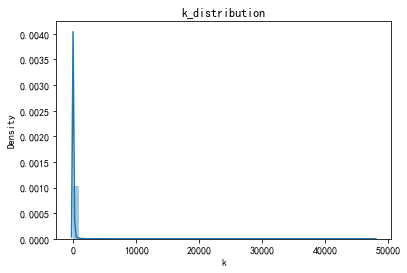

In [10]:
import seaborn as sns
sns.distplot(df_out['k'])
plt.title('k_distribution')
plt.show()

In [11]:
# zscore_removing outliers
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, minmax_scale,OneHotEncoder,StandardScaler
df_out['k_log1p'] = np.log(1+df_out['k'])
k_mean2 = df_out['k_log1p'].mean()
k_std2 = df_out['k_log1p'].std()
df_out['is_outlier'] = df_out['k_log1p'].apply(lambda x:1 if ((x>k_mean2+3*k_std2) or x<k_mean2-3*k_std2) else 0 )
df_out['is_outlier'].value_counts()

0    9904
1      96
Name: is_outlier, dtype: int64

C:\Users\86152\anaconda3\envs\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


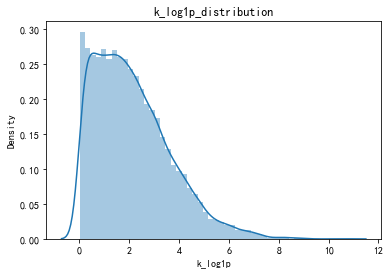

In [12]:
import seaborn as sns
sns.distplot(df_out['k_log1p'])
plt.title('k_log1p_distribution')
plt.show()

In [13]:
k_mean3 = df_out.loc[df_out['is_outlier']==0, 'k_log1p'].mean()
k_std3 = df_out.loc[df_out['is_outlier']==0, 'k_log1p'].std()
(k_mean3),k_std3

(2.0646967282188586, 1.4320933086181102)

In [14]:
k_mean_ = df_out.loc[df_out['is_outlier']==0, 'k'].mean()
k_std_ = df_out.loc[df_out['is_outlier']==0, 'k'].std()
k_mean_,k_std_

(26.49247043822694, 71.21439497807376)

In [15]:
print('k_mean at 95% confidence:')
print(k_mean_-1.96*k_std_/np.sqrt(9904),k_mean_+1.96*k_std_/np.sqrt(9904))

k_mean at 95% confidence:
25.089919818273856 27.89502105818002


C:\Users\86152\anaconda3\envs\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


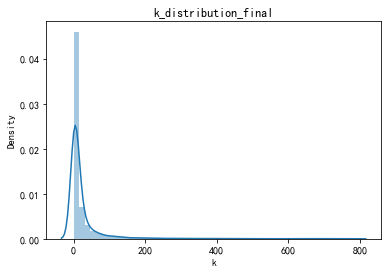

In [16]:
sns.distplot(df_out.loc[df_out['is_outlier']==0,'k'])
plt.title('k_distribution_final')
plt.show()

In [17]:
df_out.to_excel('../res/Results_realizations_{}.xlsx'.format(max_round,max_bin), index=False)

In [18]:
df_out

Num_bins    sd  NO.alkaline  Content_alkaline  NO.nonalkaline  \
0          1     0           15        838.000000            1444   
0          1     1          523        509.200658             967   
0          1     2          580       1547.935238            1406   
0          1     3          782       3000.000000            2752   
0          1     4          845       2320.000000            3345   
..       ...   ...          ...               ...             ...   
0          1  9995          530        798.745761            1299   
0          1  9996          421        317.371890            1771   
0          1  9997           51        760.000000            3005   
0          1  9998          421        317.371890            3166   
0          1  9999            9         44.000000            1158   

    Content_nonalkaline          k   k_log1p  is_outlier  
0            570.000000   1.470175  0.904289           0  
0             22.000000  23.145484  3.184097           0  
0             30.000000  51.597841  3.962675           0  
0             93.583600  32.056899  3.498230           0  
0            223.930000  10.360380  2.430132           0  
..                  ...        ...       ...         ...  
0            738.500000   1.081579  0.733127           0  
0            396.423149   0.800589  0.588114           0  
0            702.280000   1.082189  0.733420           0  
0             20.000000  15.868594  2.825454           0  
0            119.000000   0.369748  0.314627           0  

[10000 rows x 9 columns]